# ABCDEats Inc.
## Data Mining - 2024/2025 - Group 02
Bruna Duarte 20210669 <br>
Catarina Silva 20240558 <br>
Afonso Gião 20240495 <br>
Sarah Leuthner 20240581 <br>

### Import Libraries

In [1]:
#importing the necessary libraries
import warnings

warnings.filterwarnings('ignore')
import os, sys
#hide the warnings

sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set(rc={'figure.figsize':(11.7,8.27)})


# Metadata
- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

## Import Dataset

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

* Quick Data Overview:

In [3]:
df.head()

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

During our Exploratory Data Analysis (EDA), we must also account for:
* Coherence check
* Outliers
* Missing values
* Feature Engineering

Depending on the context, various steps must be considered when performing Data Preprocessing.
The most relevant steps are the following:
* Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
* Data editing (fix inconsistent values)
* Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
* Data wrangling (feature extraction/engineering and transformation)
* Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)

## Indexing by customer id

In [4]:
df.set_index('customer_id',inplace=True)

## Data overview

In [5]:
print(f'Dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

Dataframe has 31888 rows and 55 columns


In [6]:
print(f'Column names: \n{list(df.columns)}')

Column names: 
['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


## Treatment of anomalies

* Missing values

In [7]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Some columns like customer_age, first_order, and HR_0 contain missing values.

### Options for handling:
* For **customer_age**, imputation can be based on the mean or median age of customers.
* For **first_order**, imputing missing values with the median.
* For **HR_0** (midnight hour), we have a way to recover this data.

customer_age and first order:

In [8]:
'''
# Impute missing values for customer_age and first_order
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['first_order'].fillna(df['first_order'].median(), inplace=True)

df.info()
'''

"\n# Impute missing values for customer_age and first_order\ndf['customer_age'].fillna(df['customer_age'].median(), inplace=True)\ndf['first_order'].fillna(df['first_order'].median(), inplace=True)\n\ndf.info()\n"

HR_0:

We will substitute the missing values by the difference in total orders calculated with day of the week and hour of the day (we can do this because the DOW columns don't have any missing values). We also check if DOW total orders are always bigger or equal to HR total orders.

In [9]:
dow_columns = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
hr_columns = [f'HR_{i}' for i in range(24)]

# Check if DOW total orders are always bigger or equal to HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

Now lets substitute the missing values in HR_0

In [10]:
# Substitute missing values in HR_0
df['HR_0'] = df['HR_0'].fillna(df[dow_columns].sum(axis=1).astype(int) - df[hr_columns].sum(axis=1).astype(int))

Let's do a coherence check on the HR_0 column

In [11]:
# Check if both ways of calculating total orders are coherent
df[dow_columns].sum(axis=1).astype(int).equals(df[hr_columns].sum(axis=1).astype(int))

True

It seems that the HR_0 column is now coherent with the rest of the data.


* Duplicates:

In [12]:
df.duplicated().sum()

60

There are 60 duplicated rows in our dataset. We should drop them.

In [13]:
# Droping duplicates
df.drop_duplicates(inplace=True)

In [14]:
# Checking if duplicates were dropped
df.duplicated().sum()

0

* Irrelevant features:

In [15]:
# Maybe drop the Asian cuisine column and substitute it with main 4 Cuisines + other_asian_cuisines

* Nonsense values

We have people on our data base who haven't ordered anything yet. We need to exclude them

In [16]:
# Seeing if there are customers with 0 orders
df["product_count"].value_counts().sort_index(ascending=True)

0       156
1      4687
2      6270
3      4960
4      3397
       ... 
97        1
109       1
110       1
117       1
269       1
Name: product_count, Length: 93, dtype: int64

Customers with 0 products ordered are strange cases because they shouldn't be registered in our database to begin with.

In [17]:
# Seeing if there are customers with 0 vendors
df["vendor_count"].value_counts().sort_index(ascending=True)

0      138
1     9049
2     8531
3     5164
4     2979
5     1874
6     1165
7      816
8      593
9      394
10     285
11     217
12     146
13     108
14     101
15      62
16      41
17      34
18      26
19      20
20      22
21       9
22       7
23      12
24       6
25       6
26       2
27       5
28       3
29       2
30       3
31       1
32       2
34       2
35       1
40       1
41       1
Name: vendor_count, dtype: int64

There are cases where customers have ordered from 0 vendors. This is also strange.

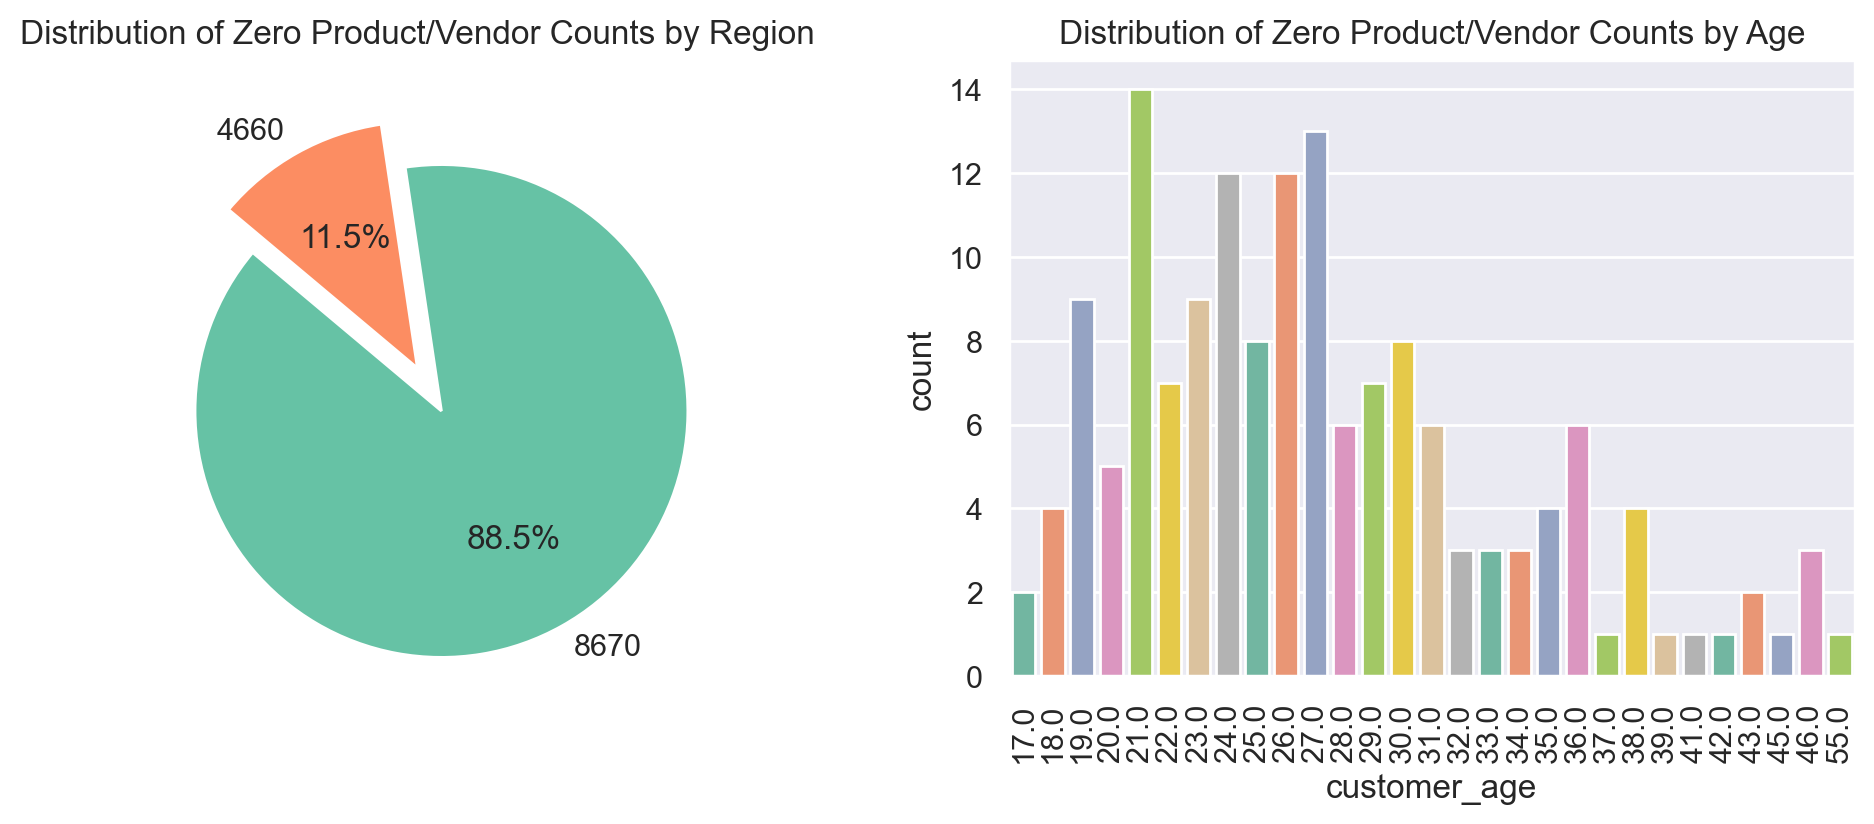

In [18]:
df_zero_prod_or_vend = df[(df['product_count'] == 0) | (df['vendor_count'] == 0)]
region_counts = df_zero_prod_or_vend['customer_region'].value_counts()
age_counts = df_zero_prod_or_vend['customer_age'].value_counts()
palete_color = sns.color_palette('Set2')

# Plot 2 piecharts, 1 grouped by age and 1 by region
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# By region
axs[0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=palete_color, explode=(0.2, 0))
axs[0].set_title('Distribution of Zero Product/Vendor Counts by Region')

# By age
sns.countplot(data=df_zero_prod_or_vend, x='customer_age', ax=axs[1], palette='Set2')
plt.xticks(rotation=90)
axs[1].set_title('Distribution of Zero Product/Vendor Counts by Age')

plt.show()

The 1st graph is (kind of) interesting, but the 2nd one isn't really

* New df

In [19]:
#df = df[~((df['product_count'] == 0) & (df['vendor_count'] == 0))]

There are some costumers that haven't spent any money in any cuisine:

In [20]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df[df[cuisine_columns].sum(axis=1) == 0]

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4903041977             8670          22.0             0              0   
c94b288475             8670          26.0             0              0   
f687717dc1             8670          21.0             0              0   
c6cf0b76fb             8670          38.0             0              0   
1b7c34738e             8670          24.0             0              0   
...                     ...           ...           ...            ...   
177ede2420             8670          30.0             0              0   
0039059c9c             8670          22.0             0              0   
0e60632fe2             8670          23.0             0              0   
28ed1f1e3f             8670          20.0             0              0   
4c06e104de             8670          25.0             0              0   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4903041977          1          1.0           1   DELIVERY           DIGI   
c94b288475          0          1.0           1   DELIVERY           CASH   
f687717dc1          1          1.0           1   DELIVERY           DIGI   
c6cf0b76fb          0          2.0           2   DELIVERY           CASH   
1b7c34738e          0          3.0           3          -           CASH   
...               ...          ...         ...        ...            ...   
177ede2420          1         86.0          86          -           DIGI   
0039059c9c          1         88.0          88   DISCOUNT           CARD   
0e60632fe2          0         89.0          89   DISCOUNT           CARD   
28ed1f1e3f          0         89.0          89   DELIVERY           DIGI   
4c06e104de          1         89.0          89          -           CASH   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
4903041977            0.0  ...      0      0      0      0      0      0   
c94b288475            0.0  ...      0      0      0      0      0      0   
f687717dc1            0.0  ...      0      0      0      0      0      0   
c6cf0b76fb            0.0  ...      0      0      0      0      0      0   
1b7c34738e            0.0  ...      0      0      0      0      0      0   
...                   ...  ...    ...    ...    ...    ...    ...    ...   
177ede2420            0.0  ...      0      0      0      0      0      0   
0039059c9c            0.0  ...      0      0      0      0      0      0   
0e60632fe2            0.0  ...      0      0      0      0      0      0   
28ed1f1e3f            0.0  ...      0      0      0      0      0      0   
4c06e104de            0.0  ...      0      0      0      0      0      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
4903041977       0      0      0      0  
c94b288475       0      0      0      0  
f687717dc1       0      0      0      0  
c6cf0b76fb       0      0      0      0  
1b7c34738e       0      0      0      0  
...            ...    ...    ...    ...  
177ede2420       0      0      0      0  
0039059c9c       0      0      0      0  
0e60632fe2       0      0      0      0  
28ed1f1e3f       0      0      0      0  
4c06e104de       0      0      0      0  

[138 rows x 55 columns]

In [21]:
df[df[cuisine_columns].sum(axis=1) == 0]['customer_region'].value_counts()

8670    138
Name: customer_region, dtype: int64

They are all from the same region. Should we drop them or explore them further?

In [22]:
len(df[df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)])

18

Also, there are 18 customers that have a product count lower than their order count which is strange because "n" orders should have associated "n" products or more (assuming each order is composed by at least 1 product).

In [23]:
df[df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)]['customer_region'].value_counts()

4660    18
Name: customer_region, dtype: int64

All of these customers are from the same region. Should we drop them or explore them further?

## Data Exploration

### Descriptive statistics
* Numerical Columns, can be studied using descriptive stats:

In [24]:
df[['customer_age', 'vendor_count', 'product_count', "is_chain", 'first_order', 'last_order']].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count      31101.00      31828.00       31828.00  31828.00     31722.00   
mean          27.51          3.10           5.67      2.82        28.46   
std            7.16          2.77           6.96      3.98        24.10   
min           15.00          0.00           0.00      0.00         0.00   
25%           23.00          1.00           2.00      1.00         7.00   
50%           26.00          2.00           3.00      2.00        22.00   
75%           31.00          4.00           7.00      3.00        45.00   
max           80.00         41.00         269.00     83.00        90.00   

       last_order  
count    31828.00  
mean        63.67  
std         23.23  
min          0.00  
25%         49.00  
50%         70.00  
75%         83.00  
max         90.00

In [25]:
df.describe(include = "object")

customer_region last_promo payment_method
count            31828      31828          31828
unique               9          4              3
top               8670          -           CARD
freq              9748      16722          20119

* Categorical columns, can be analyzed using frequency counts:

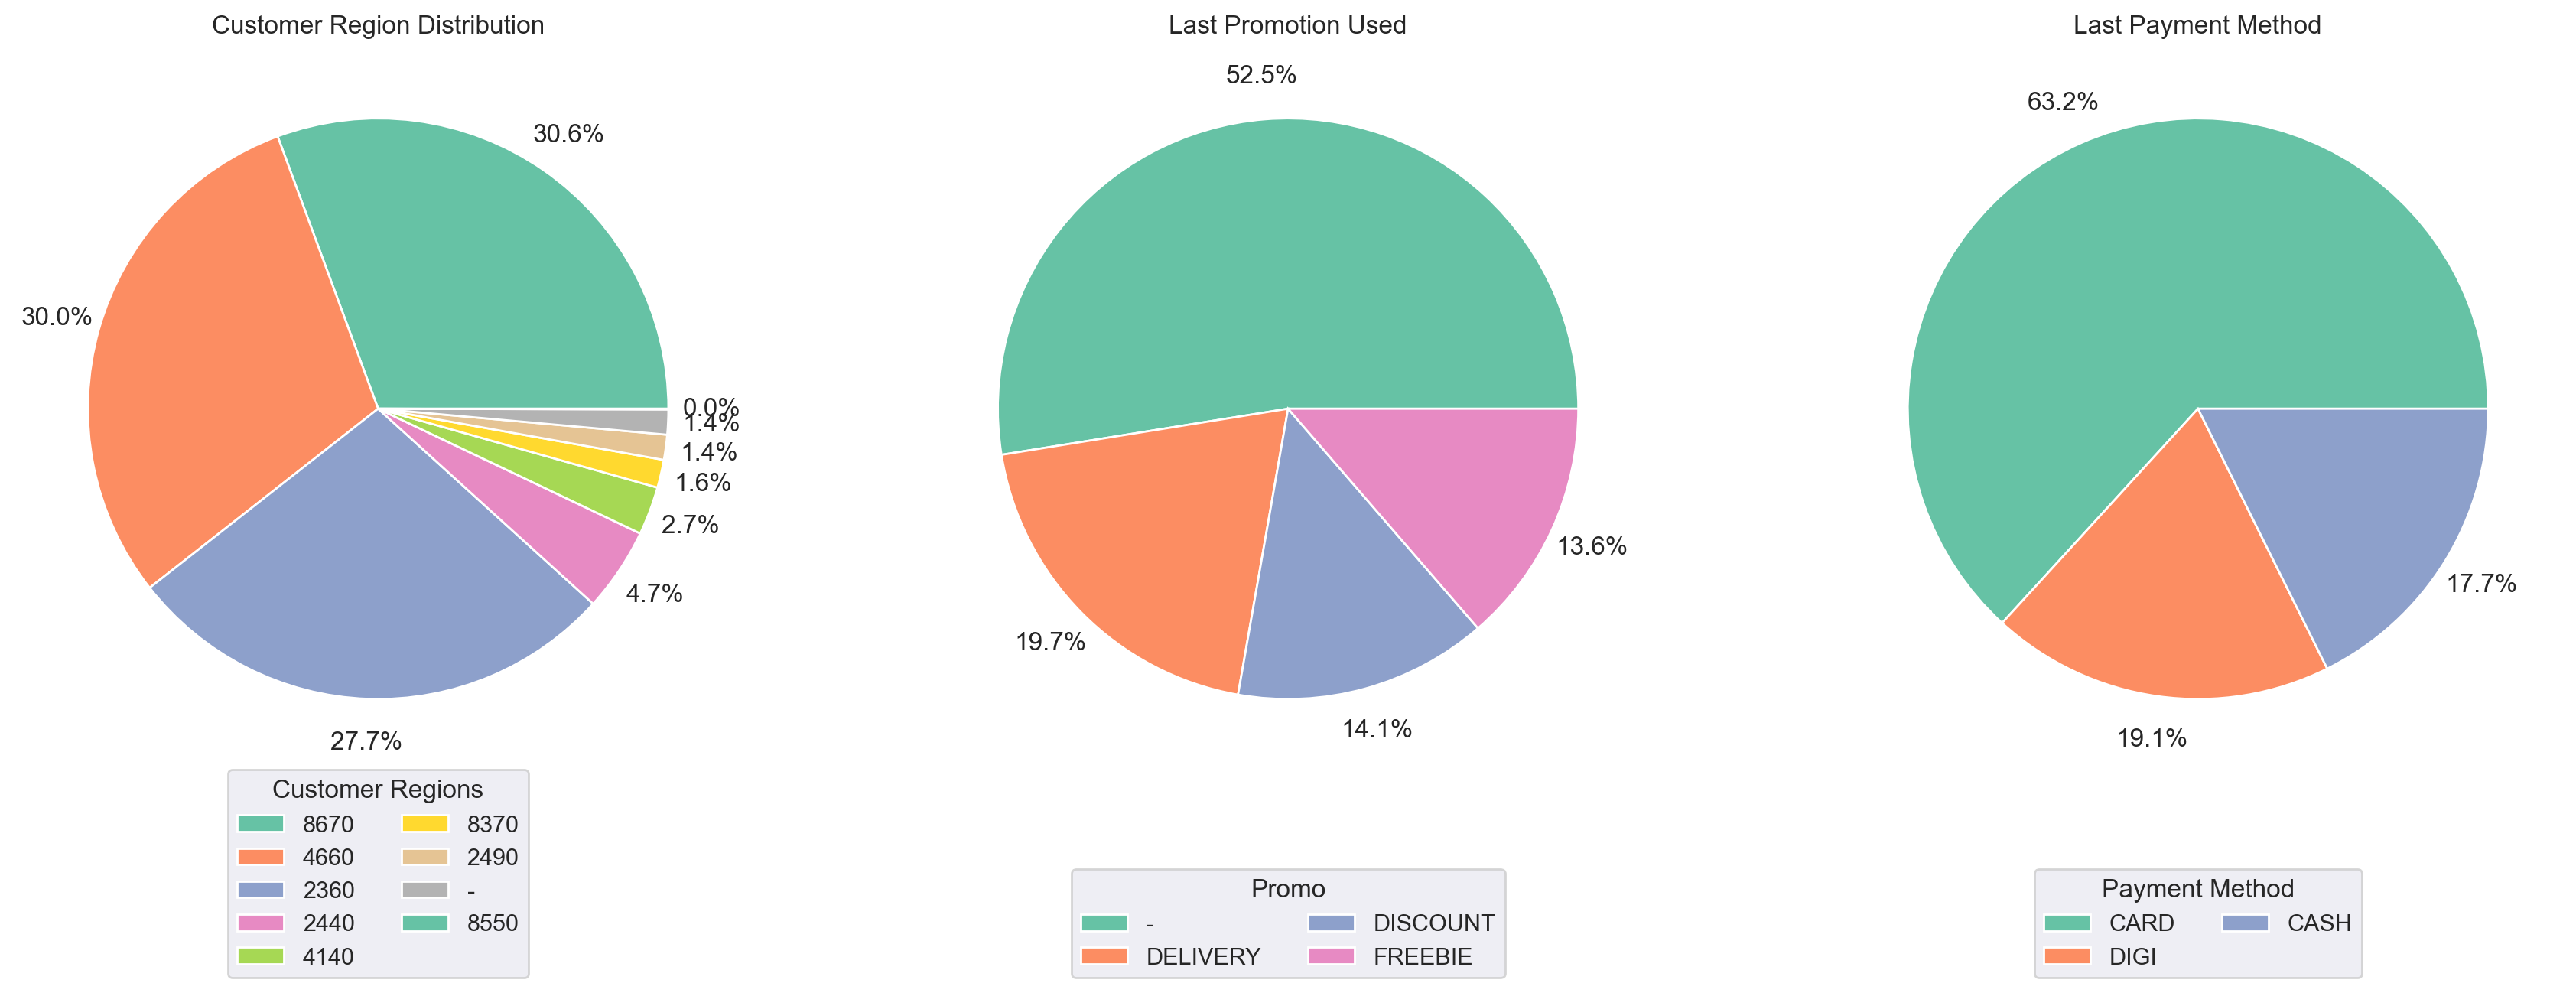

In [26]:
# Define the color palette (inverted)
colors = sns.color_palette("Set2")

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize as needed

# First pie chart: Customer Region
value_counts1 = df["customer_region"].value_counts()
wedges1, texts1, autotexts1 = axes[0].pie(value_counts1, autopct='%1.1f%%', pctdistance=1.15, colors=colors)
axes[0].legend(wedges1, value_counts1.index, title="Customer Regions", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
axes[0].set_title('Customer Region Distribution')

# Second pie chart: Last Promo
value_counts2 = df["last_promo"].value_counts()
wedges2, texts2, autotexts2 = axes[1].pie(value_counts2, autopct='%1.1f%%', pctdistance=1.15, colors=colors)
axes[1].legend(wedges2, value_counts2.index, title="Promo", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
axes[1].set_title('Last Promotion Used')

# Third pie chart: Payment Method
value_counts3 = df["payment_method"].value_counts()
wedges3, texts3, autotexts3 = axes[2].pie(value_counts3, autopct='%1.1f%%', pctdistance=1.15, colors=colors)
axes[2].legend(wedges3, value_counts3.index, title="Payment Method", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)
axes[2].set_title('Last Payment Method')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()

In [27]:
df['customer_region'].value_counts().loc[lambda x: x < 2000]

2440    1482
4140     856
8370     495
2490     444
-        442
8550      13
Name: customer_region, dtype: int64

#### Cuisine Analysis

* Statistic summary of the cuisines

In [28]:
df[cuisine_columns].describe().round(2).T

count  mean    std  min  25%  50%    75%     max
CUI_American              31828.0  4.88  11.65  0.0  0.0  0.0   5.66  280.21
CUI_Asian                 31828.0  9.96  23.57  0.0  0.0  0.0  11.83  896.71
CUI_Beverages             31828.0  2.30   8.47  0.0  0.0  0.0   0.00  229.22
CUI_Cafe                  31828.0  0.80   6.43  0.0  0.0  0.0   0.00  326.10
CUI_Chicken Dishes        31828.0  0.77   3.66  0.0  0.0  0.0   0.00  219.66
CUI_Chinese               31828.0  1.43   8.20  0.0  0.0  0.0   0.00  739.73
CUI_Desserts              31828.0  0.88   5.26  0.0  0.0  0.0   0.00  230.07
CUI_Healthy               31828.0  0.95   5.84  0.0  0.0  0.0   0.00  255.81
CUI_Indian                31828.0  1.63   7.44  0.0  0.0  0.0   0.00  309.07
CUI_Italian               31828.0  3.23  11.25  0.0  0.0  0.0   0.00  468.33
CUI_Japanese              31828.0  2.99  10.18  0.0  0.0  0.0   0.00  706.14
CUI_Noodle Dishes         31828.0  0.71   4.54  0.0  0.0  0.0   0.00  275.11
CUI_OTHER                 31828.0  3.00   9.78  0.0  0.0  0.0   0.00  366.08
CUI_Street Food / Snacks  31828.0  3.91  15.52  0.0  0.0  0.0   0.00  454.45
CUI_Thai                  31828.0  0.84   4.44  0.0  0.0  0.0   0.00  136.38

* The 4 main Asian cuisines

Let's compare the popularity of the most well known cuisines in the asian continent: The Japanese, Indian, Chinese and Thai cuisines.

<Axes: title={'center': 'Asian cuisines barplot'}>

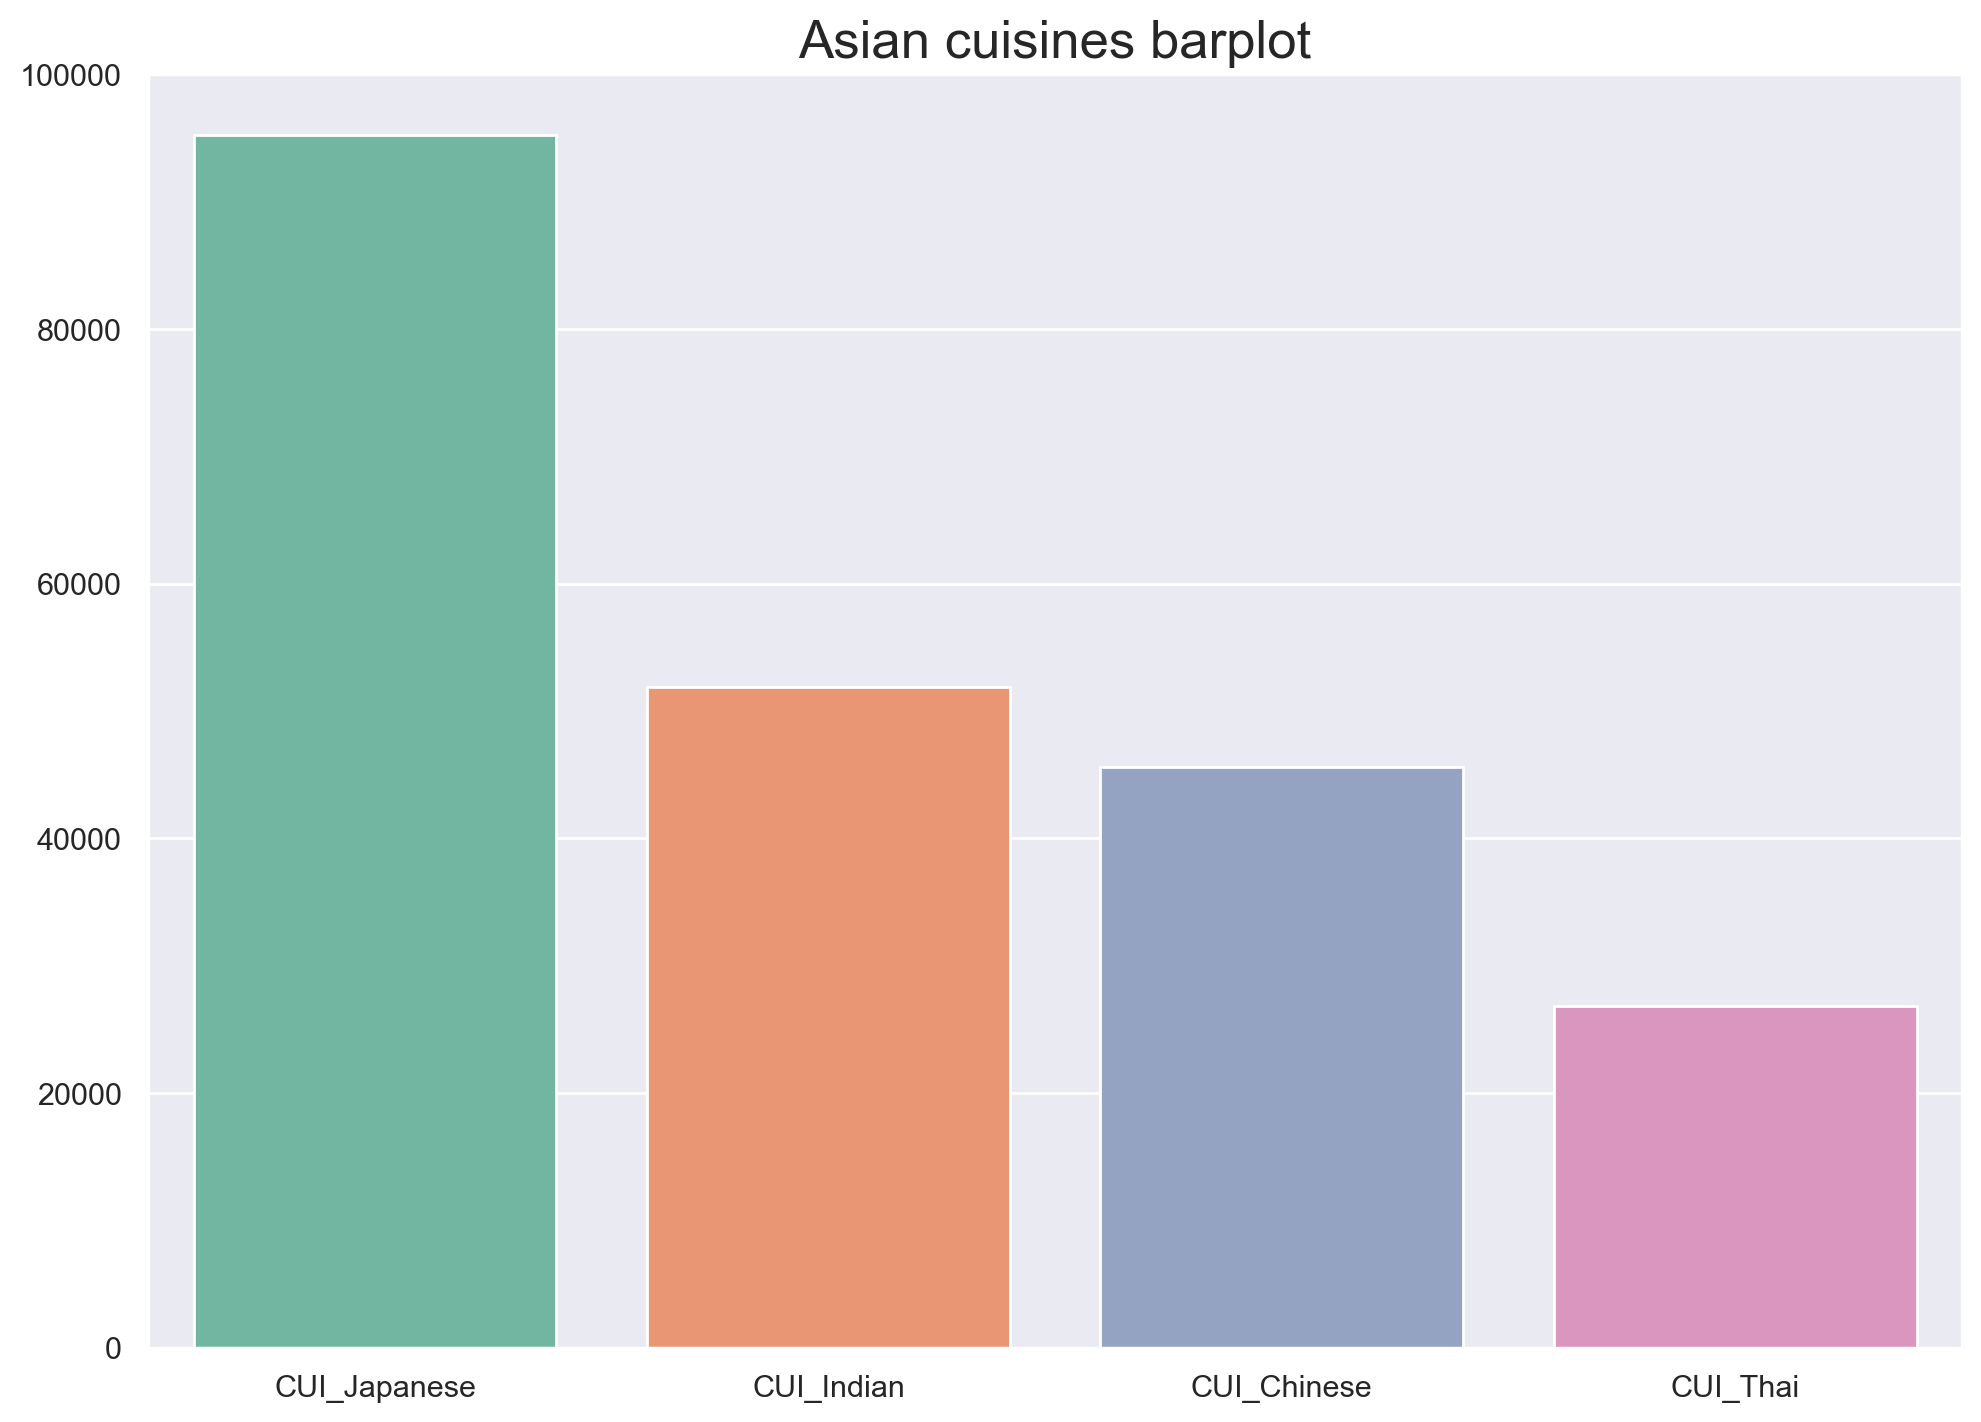

In [29]:
asian_cuisine_sums = df[['CUI_Japanese', 'CUI_Indian', 'CUI_Chinese', 'CUI_Thai']].sum()
plt.title("Asian cuisines barplot", size = 19)
sns.barplot(x=asian_cuisine_sums.index, y=asian_cuisine_sums.values, palette='Set2')

Japanese cuisine has the highest amount of money spent by a huge margin, among the 4 main asian cuisines. It is almost double the money spent in each of the other 3 cuisines. This makes sense given the popularity of japanese food and the higher average cost compared to other asian cuisines.

* Asian cuisine vs the 4 main asian cuisines

Let's compare the total spending in Asian cuisine with the total spending in the 4 main asian cuisines we saw before.

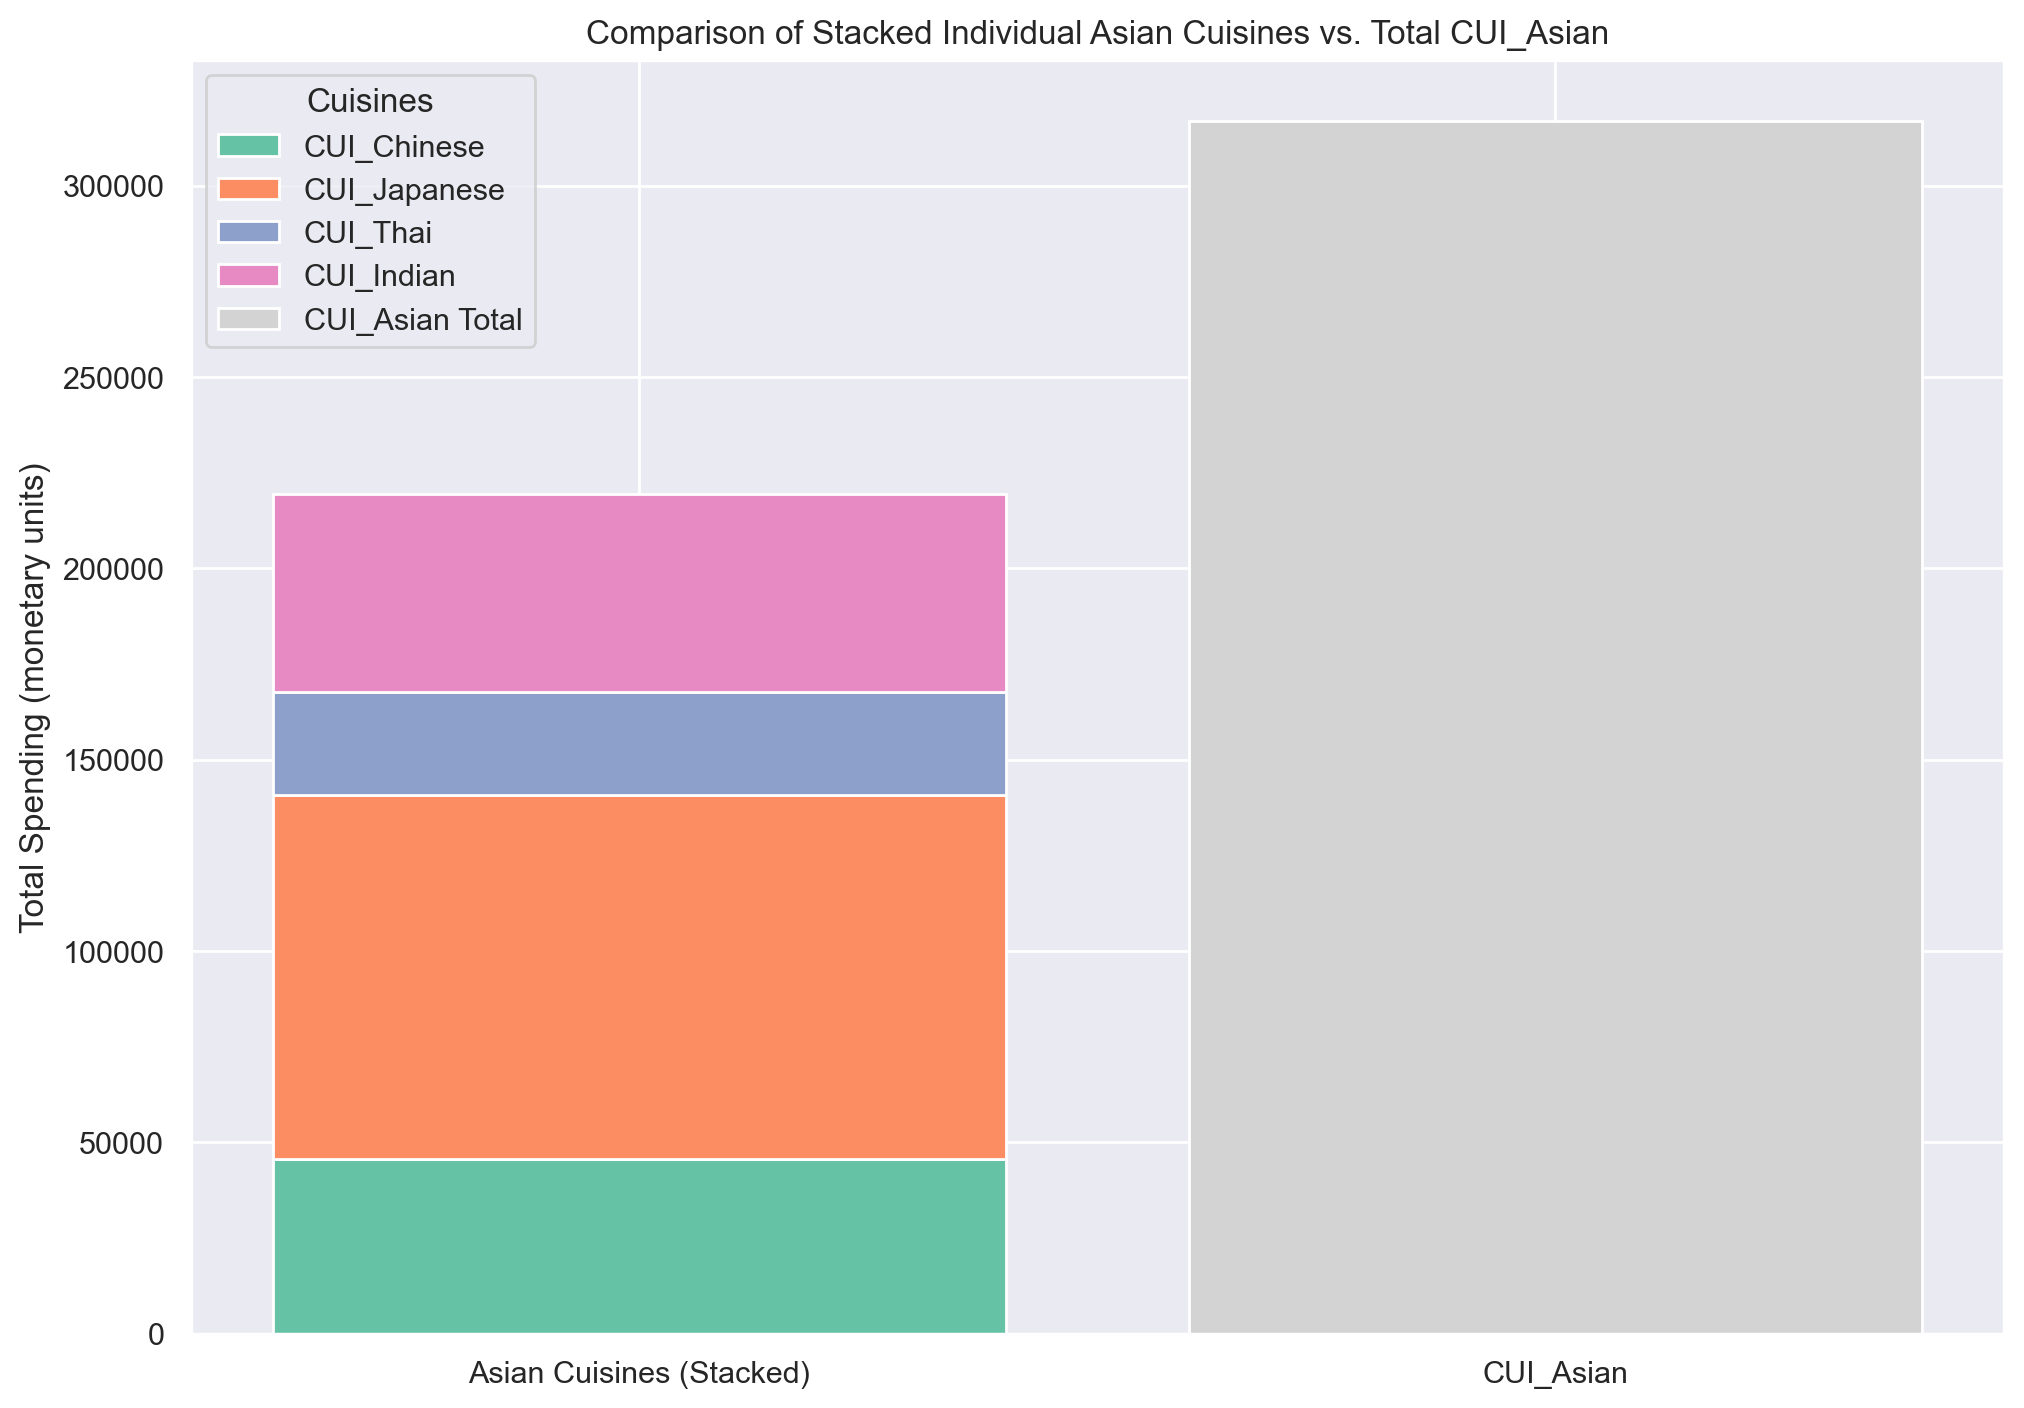

In [30]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ["CUI_Chinese", "CUI_Japanese", "CUI_Thai", "CUI_Indian"]
cuisine_sums = [df[col].sum() for col in cuisines]

# Sum total for CUI_Asian
sum_asian = df["CUI_Asian"].sum()

# Plotting
fig, ax = plt.subplots()

# Plot each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("Asian Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plot the total CUI_Asian as a single bar
ax.bar("CUI_Asian", sum_asian, color='lightgrey', label="CUI_Asian Total")

# Label and format the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked Individual Asian Cuisines vs. Total CUI_Asian")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

In [31]:
print(f'Difference in money spent between generic and popular asian cuisines: {round(df["CUI_Asian"].sum() - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum().sum(), 2)}')

Difference in money spent between generic and popular asian cuisines: 97473.32


If we assume that "CUI_Asian" contains other asian countries cuisines, we can say that around 2/3 of the money spent in Asian cuisines comes from only japanese, indian, chinese and thai cuisines. We can speculate there is only 97473.32 money units spent in the rest of the asian cuisines excluding those 4 main asian cuisines.

([<matplotlib.patches.Wedge at 0x251f0e92a90>,
 [Text(-0.8350100738315046, 0.861834193218107, 'CUI_Japanese'),
  Text(-0.8709036270369355, -0.6719574930112103, 'CUI_Indian'),
  Text(0.05748257860238413, -1.098497042853198, 'CUI_Chinese'),
  Text(0.7653372103412648, -0.7901005976880735, 'CUI_Thai'),
  Text(0.9997551490165237, 0.45879150168126326, 'Other')],
 [Text(-0.4870892097350443, 0.5027366127105624, '30.1%'),
  Text(-0.47503834202014655, -0.36652226891520556, '16.4%'),
  Text(0.03135413378311861, -0.5991802051926534, '14.4%'),
  Text(0.41745666018614436, -0.43096396237531276, '8.5%'),
  Text(0.5453209903726493, 0.25024991000796176, '30.7%')])

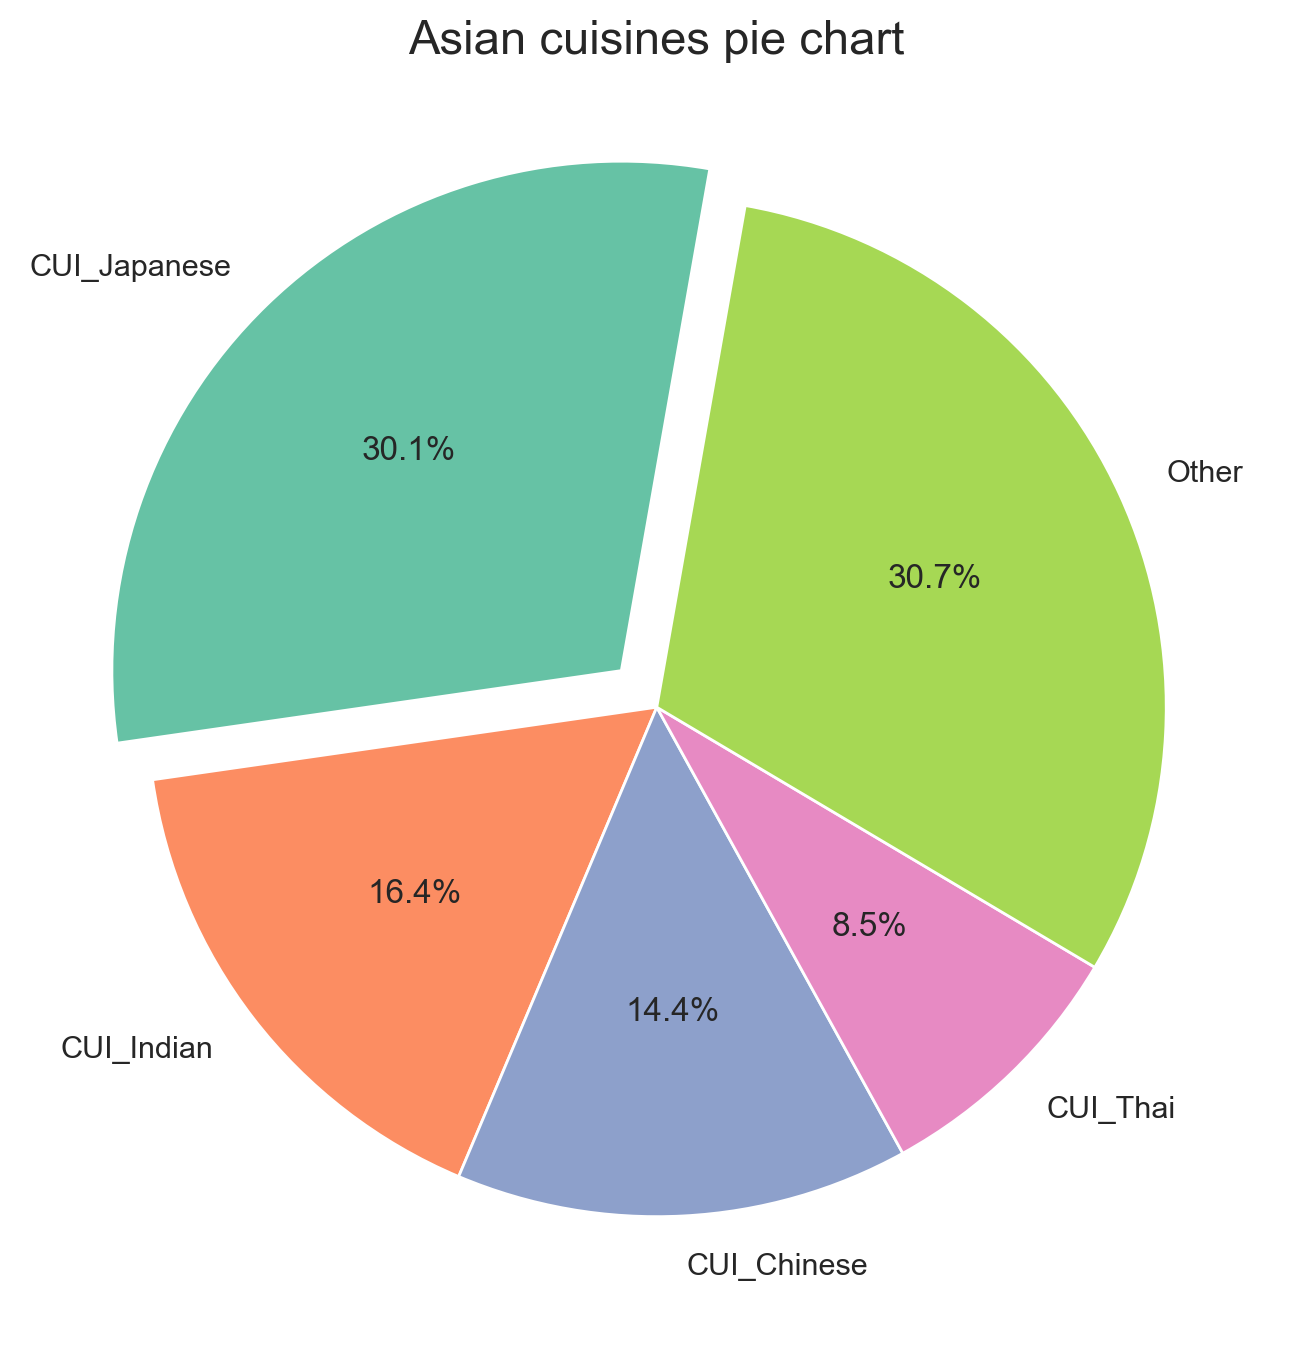

In [32]:
# (Afonso)
# Asian cuisines pie chart
asian_cuisine_sums['Other'] = df['CUI_Asian'].sum() - asian_cuisine_sums.sum()

# declaring exploding pie 
explode = [0.1, 0, 0, 0, 0]

# defining Seaborn color palette to use 
palette_color = sns.color_palette('Set2')
plt.title("Asian cuisines pie chart", size = 17)
plt.pie(asian_cuisine_sums, labels=asian_cuisine_sums.index, autopct='%1.1f%%', startangle=80, colors= palette_color,
        explode=explode)

Japanese cuisine could represent over 30% of the total spending in Asian cuisine.

* European, Asian, American and Other cuisines vs the rest

In [33]:
total_spend = df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().sum()

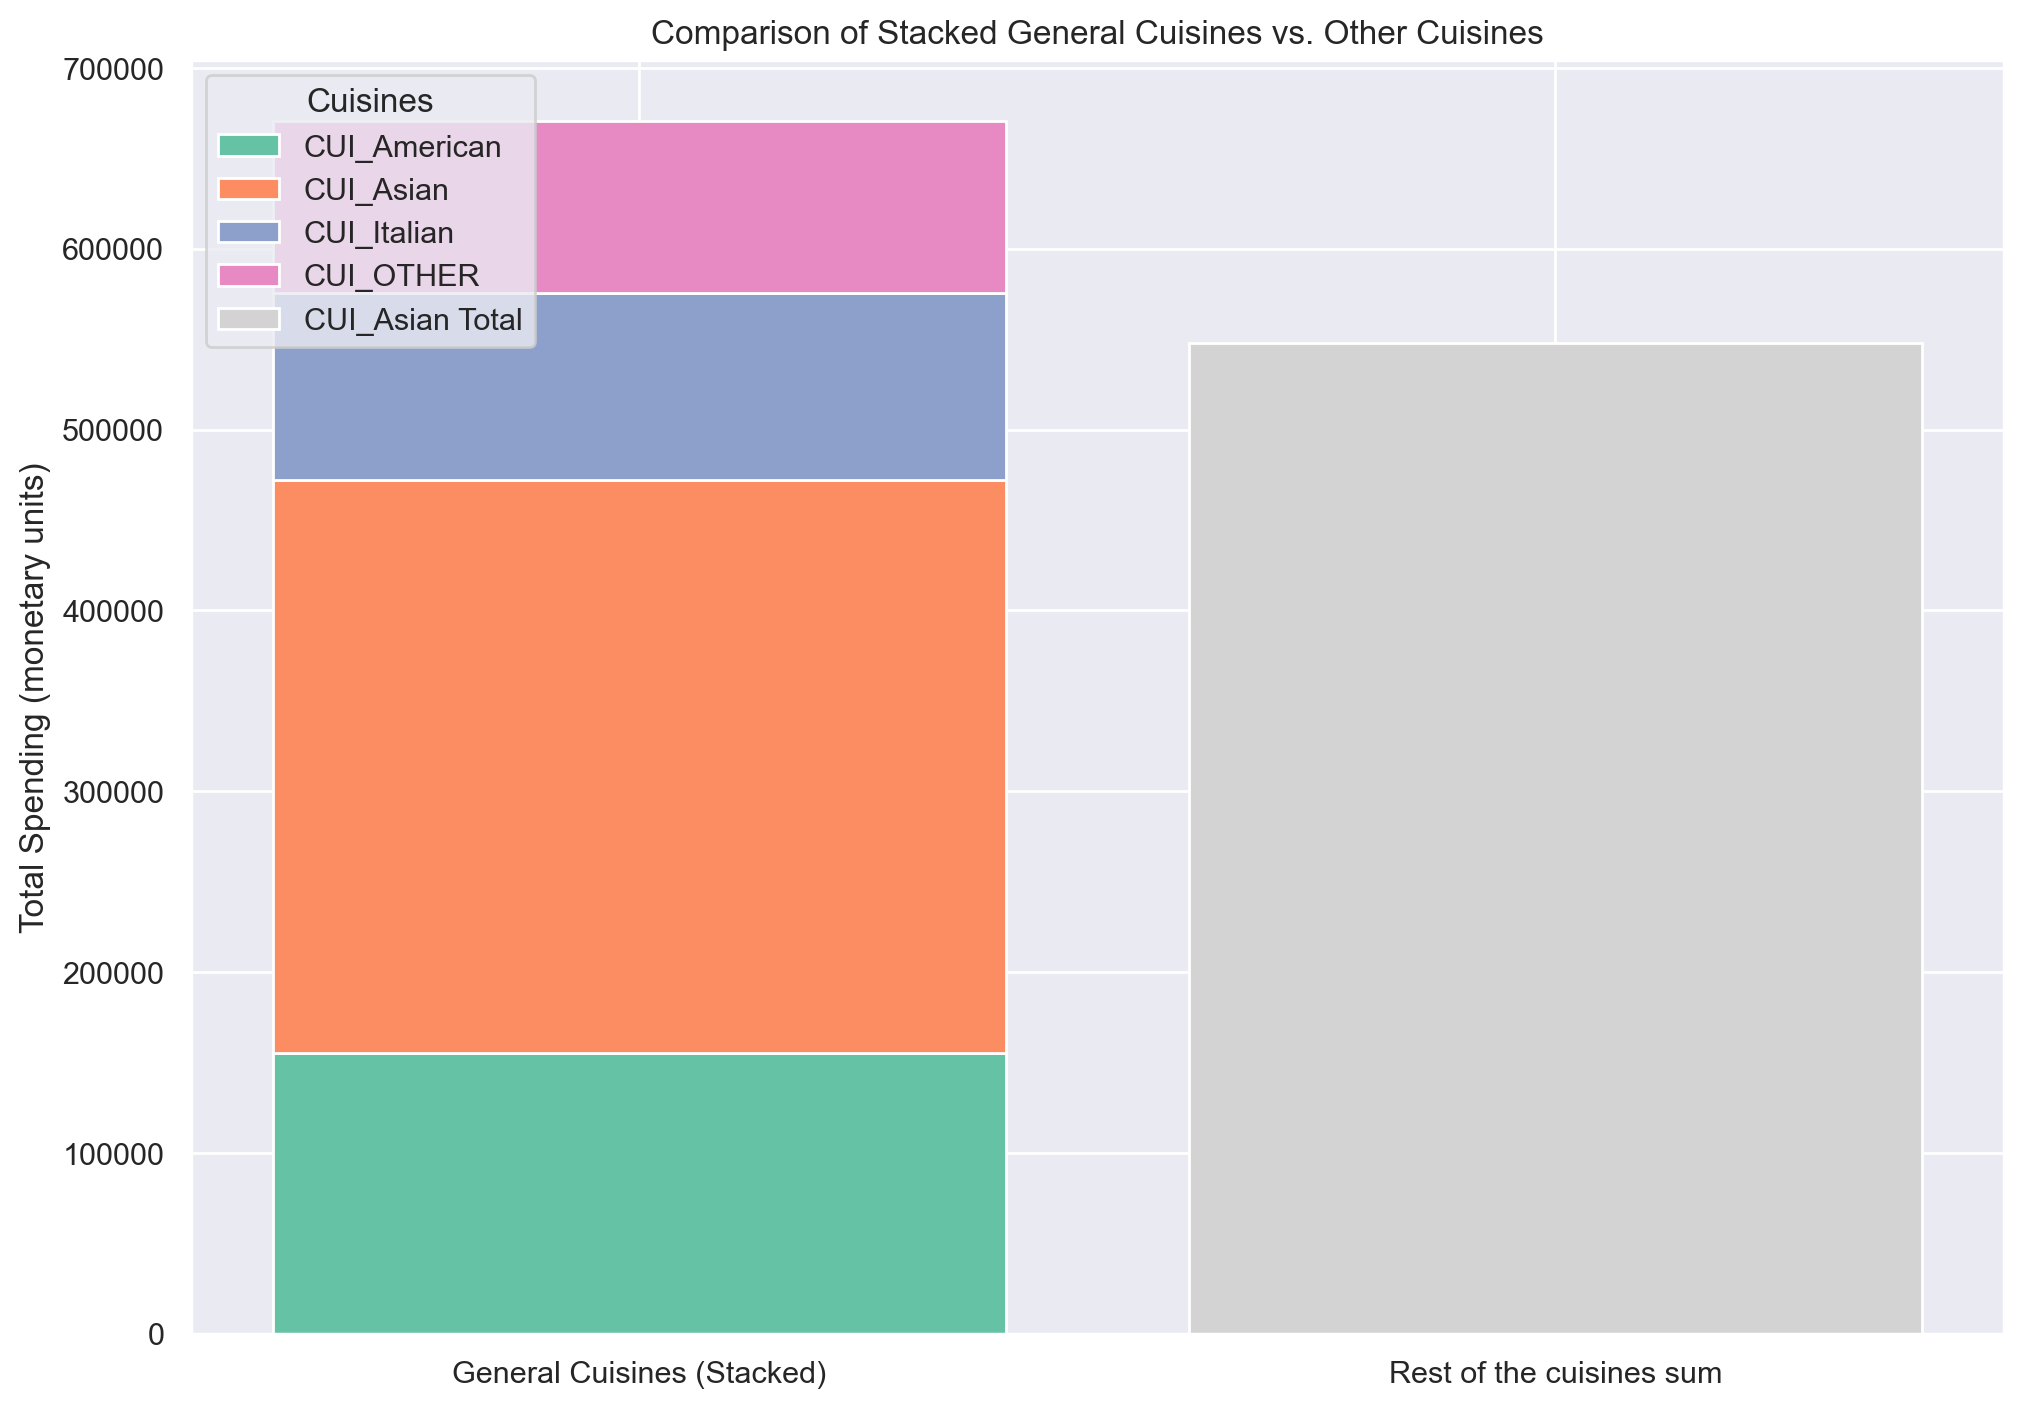

In [34]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']
cuisine_sums = [df[col].sum() for col in cuisines]

rest_cui_sum = df[cuisine_columns].sum().sum() - sum(cuisine_sums)

# Plotting
fig, ax = plt.subplots()

# Plot each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("General Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plot the total CUI_Asian as a single bar
ax.bar("Rest of the cuisines sum", rest_cui_sum, color='lightgrey', label="CUI_Asian Total")

# Label and format the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked General Cuisines vs. Other Cuisines")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

It looks reasonable to think that these 4 cuisines contain the other types of cuisines in the data set because the total spending in these 4 cuisines is greater than the total spending in the other cuisines.

* European vs Asian vs American vs Other cuisines

<Axes: >

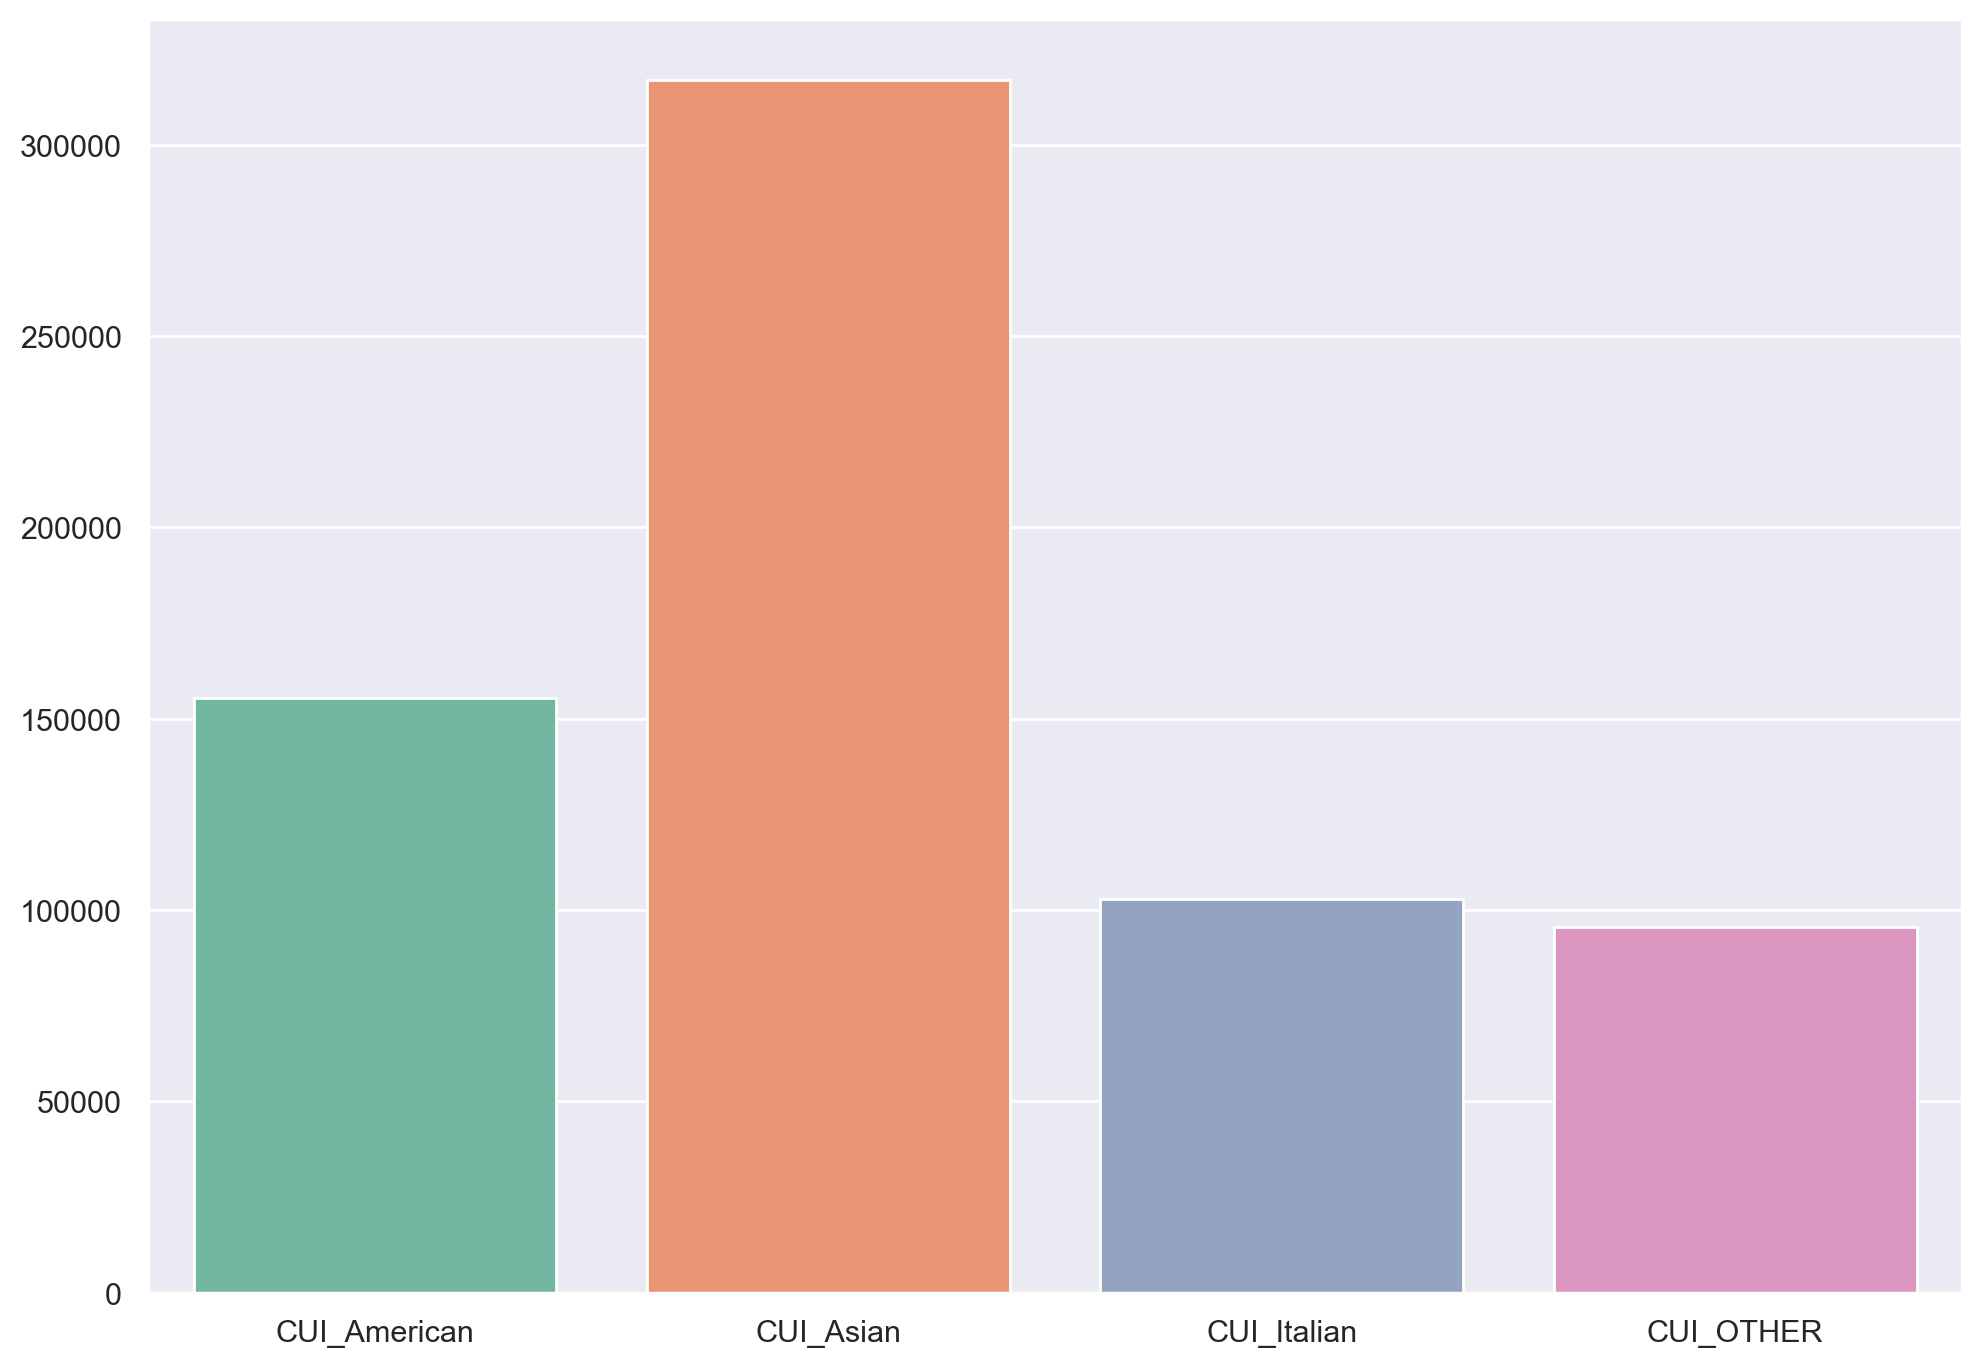

In [35]:
# bar chart for the total spending in each cuisine

sns.barplot(x=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().index, y=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().values, palette='Set2')

Asian cuisine is leading in total spending by a huge margin, followed by the American and Italian cuisines.

* Other interesting insights

In [36]:
# Healthy food on total spending
print(f"{round(df['CUI_Healthy'].sum()/total_spend*100, 2)}%")

4.52%


In [37]:
# Unhealthy food on total spending
print(f"{round(df[['CUI_Desserts', 'CUI_Street Food / Snacks']].sum().sum()/total_spend*100, 2)}%")

22.73%


In [38]:
# Cafe orders on total spending
print(f"{round(df['CUI_Cafe'].sum()/total_spend*100, 2)}%")

3.81%


In [39]:
# Japanese cuisine significance in total spending
print(f"{round(df['CUI_Japanese'].sum()/total_spend*100, 2)}%")

14.2%


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CUI_Street Food / Snacks'),
  Text(1, 0, 'CUI_Beverages'),
  Text(2, 0, 'CUI_Healthy'),
  Text(3, 0, 'CUI_Desserts'),
  Text(4, 0, 'CUI_Cafe'),
  Text(5, 0, 'CUI_Chicken Dishes'),
  Text(6, 0, 'CUI_Noodle Dishes')])

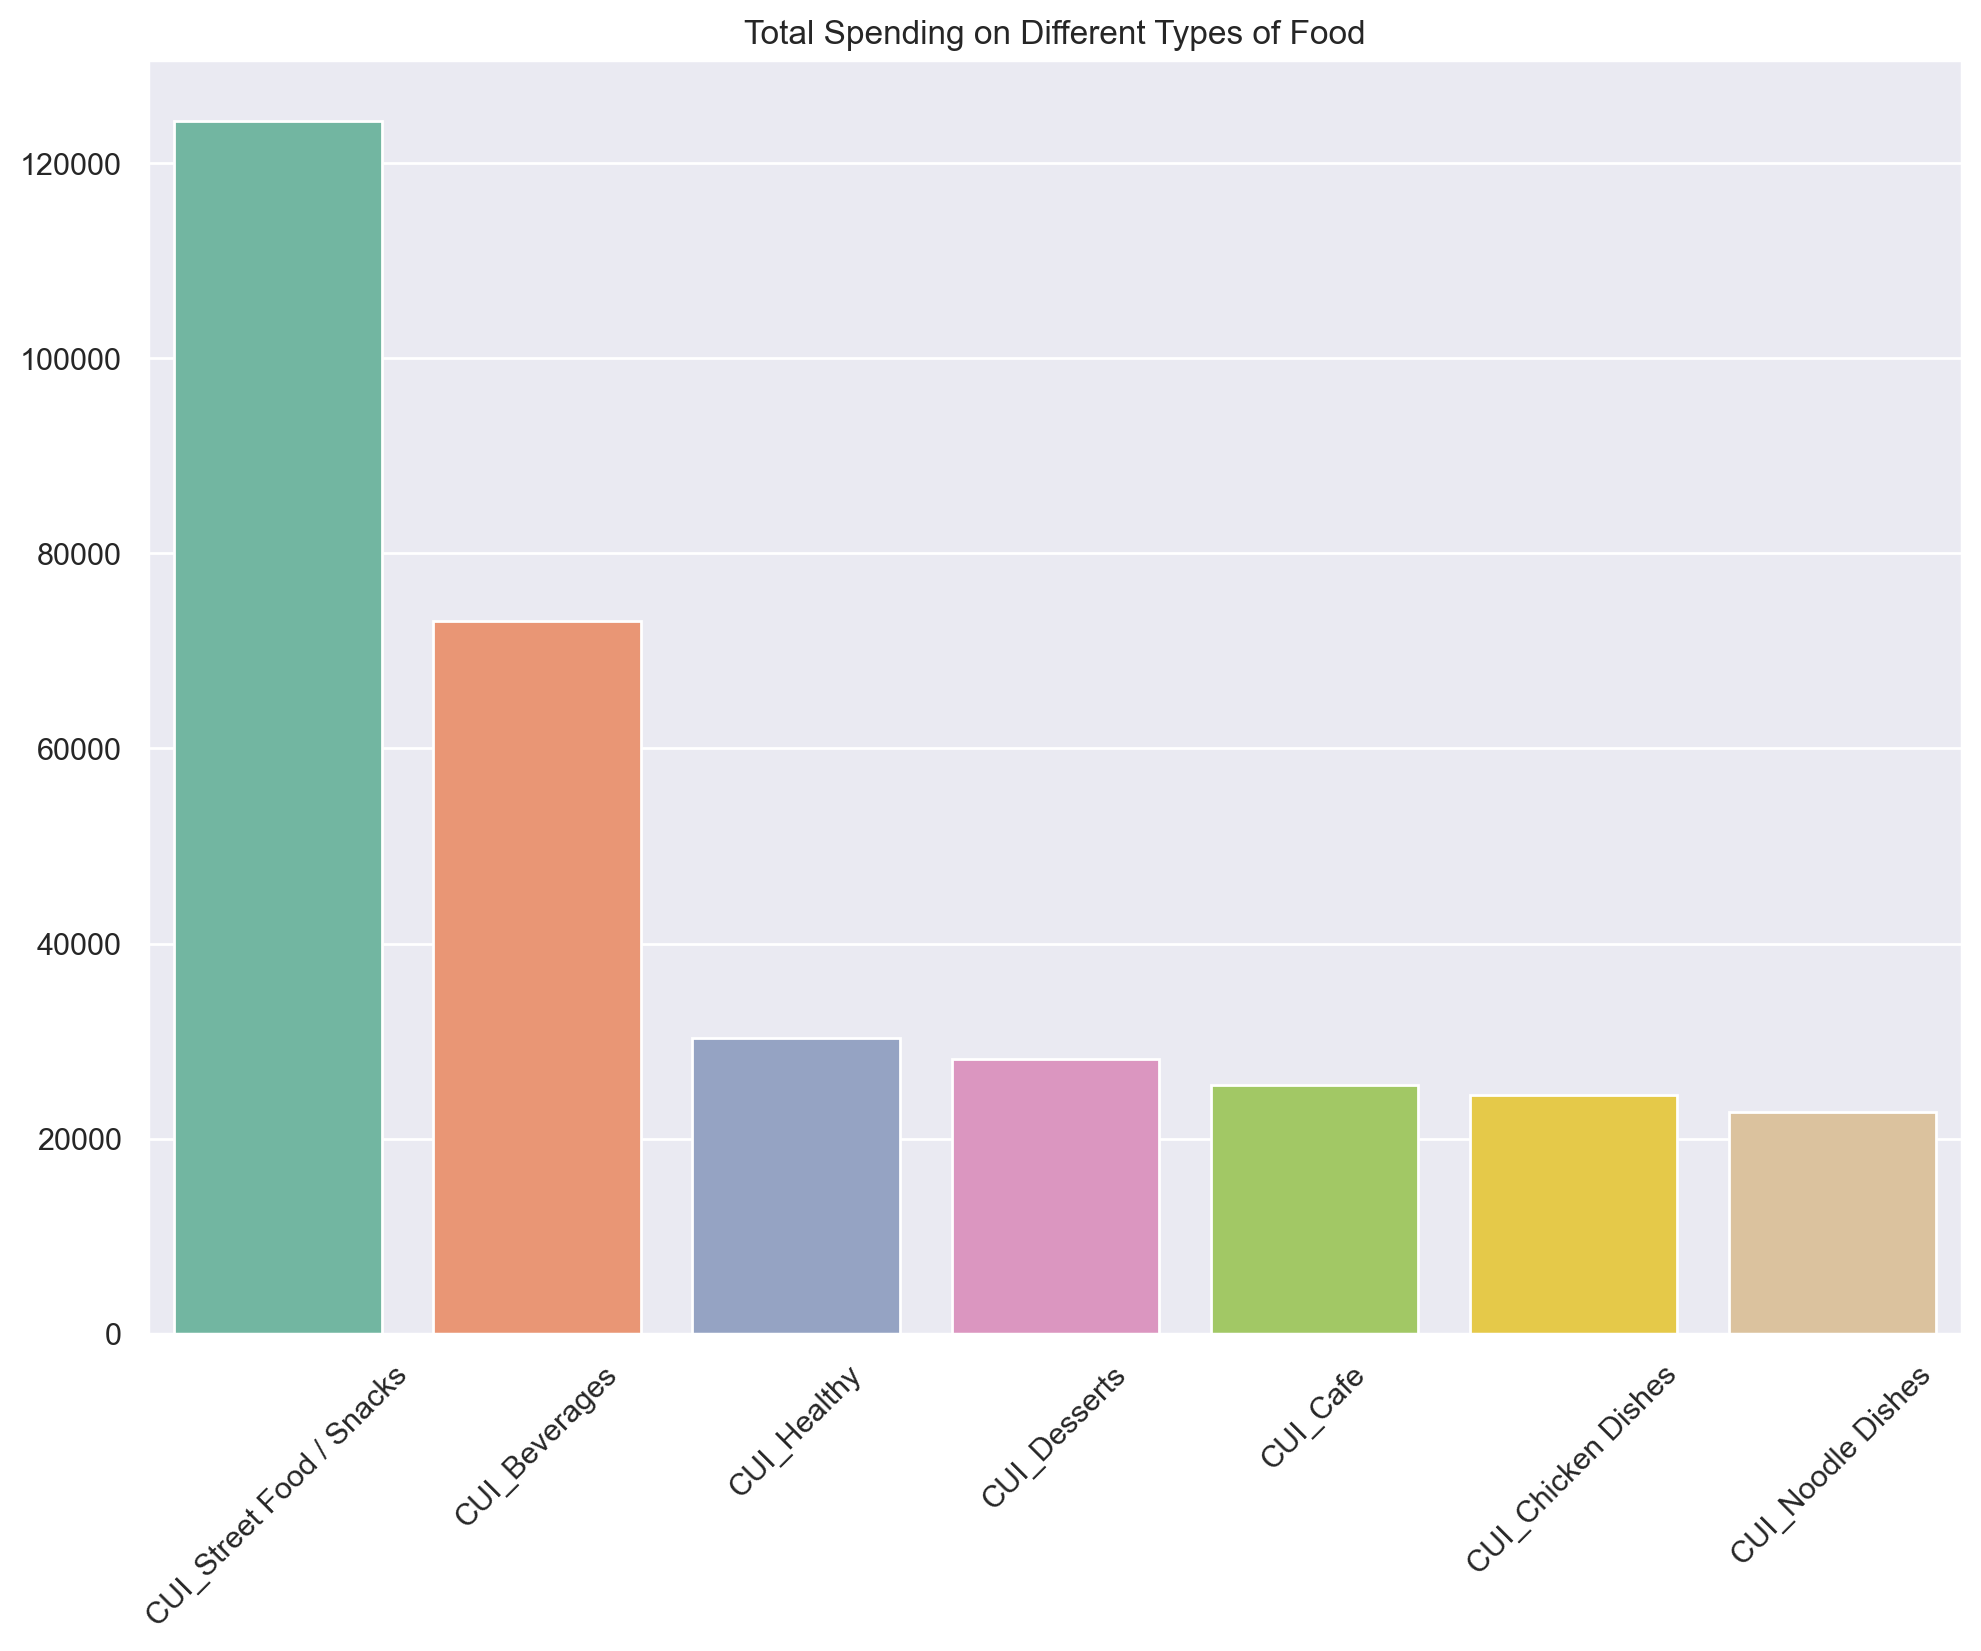

In [40]:
# Types of food barplot

tf = df[['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Noodle Dishes', 'CUI_Street Food / Snacks']].sum().sort_values(ascending=False)

sns.barplot(x=tf.index, y=tf.values, palette='Set2')


plt.title('Total Spending on Different Types of Food')
plt.xticks(rotation = 45)

## New Features

In [41]:
#(CATARINA) + (SARAH)

# 1. Week_days (Dow_0 to Dow_3) and Weekend_days (Dow_4 to Dow_6)
df['Week_days'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].sum(axis=1)
df['Weekend_days'] = df[['DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)
df['Week_days_mean'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].mean(axis=1)
df['Weekend_days_mean'] = df[['DOW_4', 'DOW_5', 'DOW_6']].mean(axis=1)

# 2. Lunch HR (HR_11 to HR_13) and Dinner HR (HR_18 to HR_20)
df["Morning_HR"] = df[["HR_1", 'HR_2', 'HR_3', "HR_4", "HR_5", 'HR_6', 'HR_7', "HR_8", "HR_9", "HR_10"]].mean(axis=1)
df['Lunch_HR'] = df[['HR_11', 'HR_12', 'HR_13']].mean(axis=1)
df["Afternoon"] = df[['HR_13', "HR_14", "HR_15", 'HR_16', "HR_17"]].mean(axis=1) #should we include 17 at dinner time?
df['Dinner_HR'] = df[['HR_18', 'HR_19', 'HR_20']].mean(axis=1)
df['Night_HR'] = df[["HR_21", 'HR_22', 'HR_23', "HR_0"]].mean(axis=1)
df["Afternoon_HR"] = df[['HR_13', "HR_14", "HR_15", 'HR_16', "HR_17"]].mean(axis=1)

# 3. Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_Spend'] = df[cuisine_columns].sum(axis=1)
# TODO: Could also be the sum of CUI_American, CUI_Asian, CUI_Italian, CUI_OTHER

# 4. Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = df['Total_Spend'] / df['vendor_count']

# 5. Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = df['Total_Spend'] / df['product_count']

# 6. Cuisine Diversity = Number of non-zero CUI_* columns
df['Cuisine_Diversity'] = df[cuisine_columns].gt(0).sum(axis=1)

In [42]:
#(SARAH)

#Peak HR column for every customer
HR_all = df.loc[:, 'HR_0':'HR_23']
df['HR_peak'] = df.loc[:, 'HR_0':'HR_23'].idxmax(axis=1)
df['HR_peak_orders'] = df.loc[:, 'HR_0':'HR_23'].max(axis=1)
#all columns
HR_sum = HR_all.sum()
#peak number
HR_peak_sum = HR_sum.max()
#peak HR 
HR_peak = HR_sum.idxmax()
print("Peak HR is:", HR_peak)
print("With a peak orders of:", HR_peak_sum)

#Customer Duration
df["Customer_Duration"] = df["last_order"] - df["first_order"]

#Frequency
df["Product_Frequency"] = df["Customer_Duration"] / df["product_count"]

Peak HR is: HR_17
With a peak orders of: 12448.0


In [43]:
# (Afonso)

#Favourite Cuisine
df['Fav_Cuisine'] = df[cuisine_columns].idxmax(axis=1)
# TODO: Could separate this into fav continent cui, fav type of cui and fav country cui

#Favourite Cuisine Concentration
df['Fav_Cuisine_Concentration'] = df[cuisine_columns].max(axis=1) / df['Total_Spend']

# Total Orders
df['Total_Orders'] = df[dow_columns].sum(axis=1).astype(int)

In [44]:
#(Afonso)

# Creating a column for the rest of the asian cuisines
df["CUI_OTHER_Asian"] = df["CUI_Asian"] - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum(axis=1)

# Chain preference
df['Chain_Preference'] = df['is_chain'] / df['Total_Orders']

# Average money spent per order
df['Avg_Spend_per_Order'] = df['Total_Spend'] / df['Total_Orders']

# Order Frequency
df['Order_Frequency'] = df['Total_Orders'] / df['Customer_Duration']

In [45]:
#(Bruna)
# Peak Order Day: Find the column with the max value among DOW_0 to DOW_6
df['Peak_Order_Day'] = df[dow_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

In [46]:
# Order Intensity: product_count / (last_order - first_order)
# Ensure there are no zero or negative values in the order range

df['Product_Intensity'] = df['product_count'] / df['Customer_Duration']
df['Product_Intensity'].fillna(0, inplace=True)  # Handling potential division by zero

In [47]:
df['last_order'].max()

90

In [48]:
# Repeat Customer: 1 if (last_order - first_order) > X, else 0
X = 1  # If more than 1 day then it's considered a repeat customer
df['Repeat_Customer'] = df['Customer_Duration'].apply(lambda x: 1 if x > X else 0)

# Visual Exploration

Separating metric and non-metric features:

In [49]:
# Churn Risk: 1 if days since last order > Threshold, else 0
threshold_days = 30 # Considering the max days is 90 then we decided 30 days would make sense as a threshold
df['Days_Since_Last_Order'] = df['last_order'].max() - df['last_order']
df['Churn_Risk'] = df['Days_Since_Last_Order'].apply(lambda x: 1 if x > threshold_days else 0)

In [50]:
non_metric_features = ["customer_region", "last_promo", "payment_method", "Fav_Cuisine"] #nominal
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

## Numerical Variables Histogram

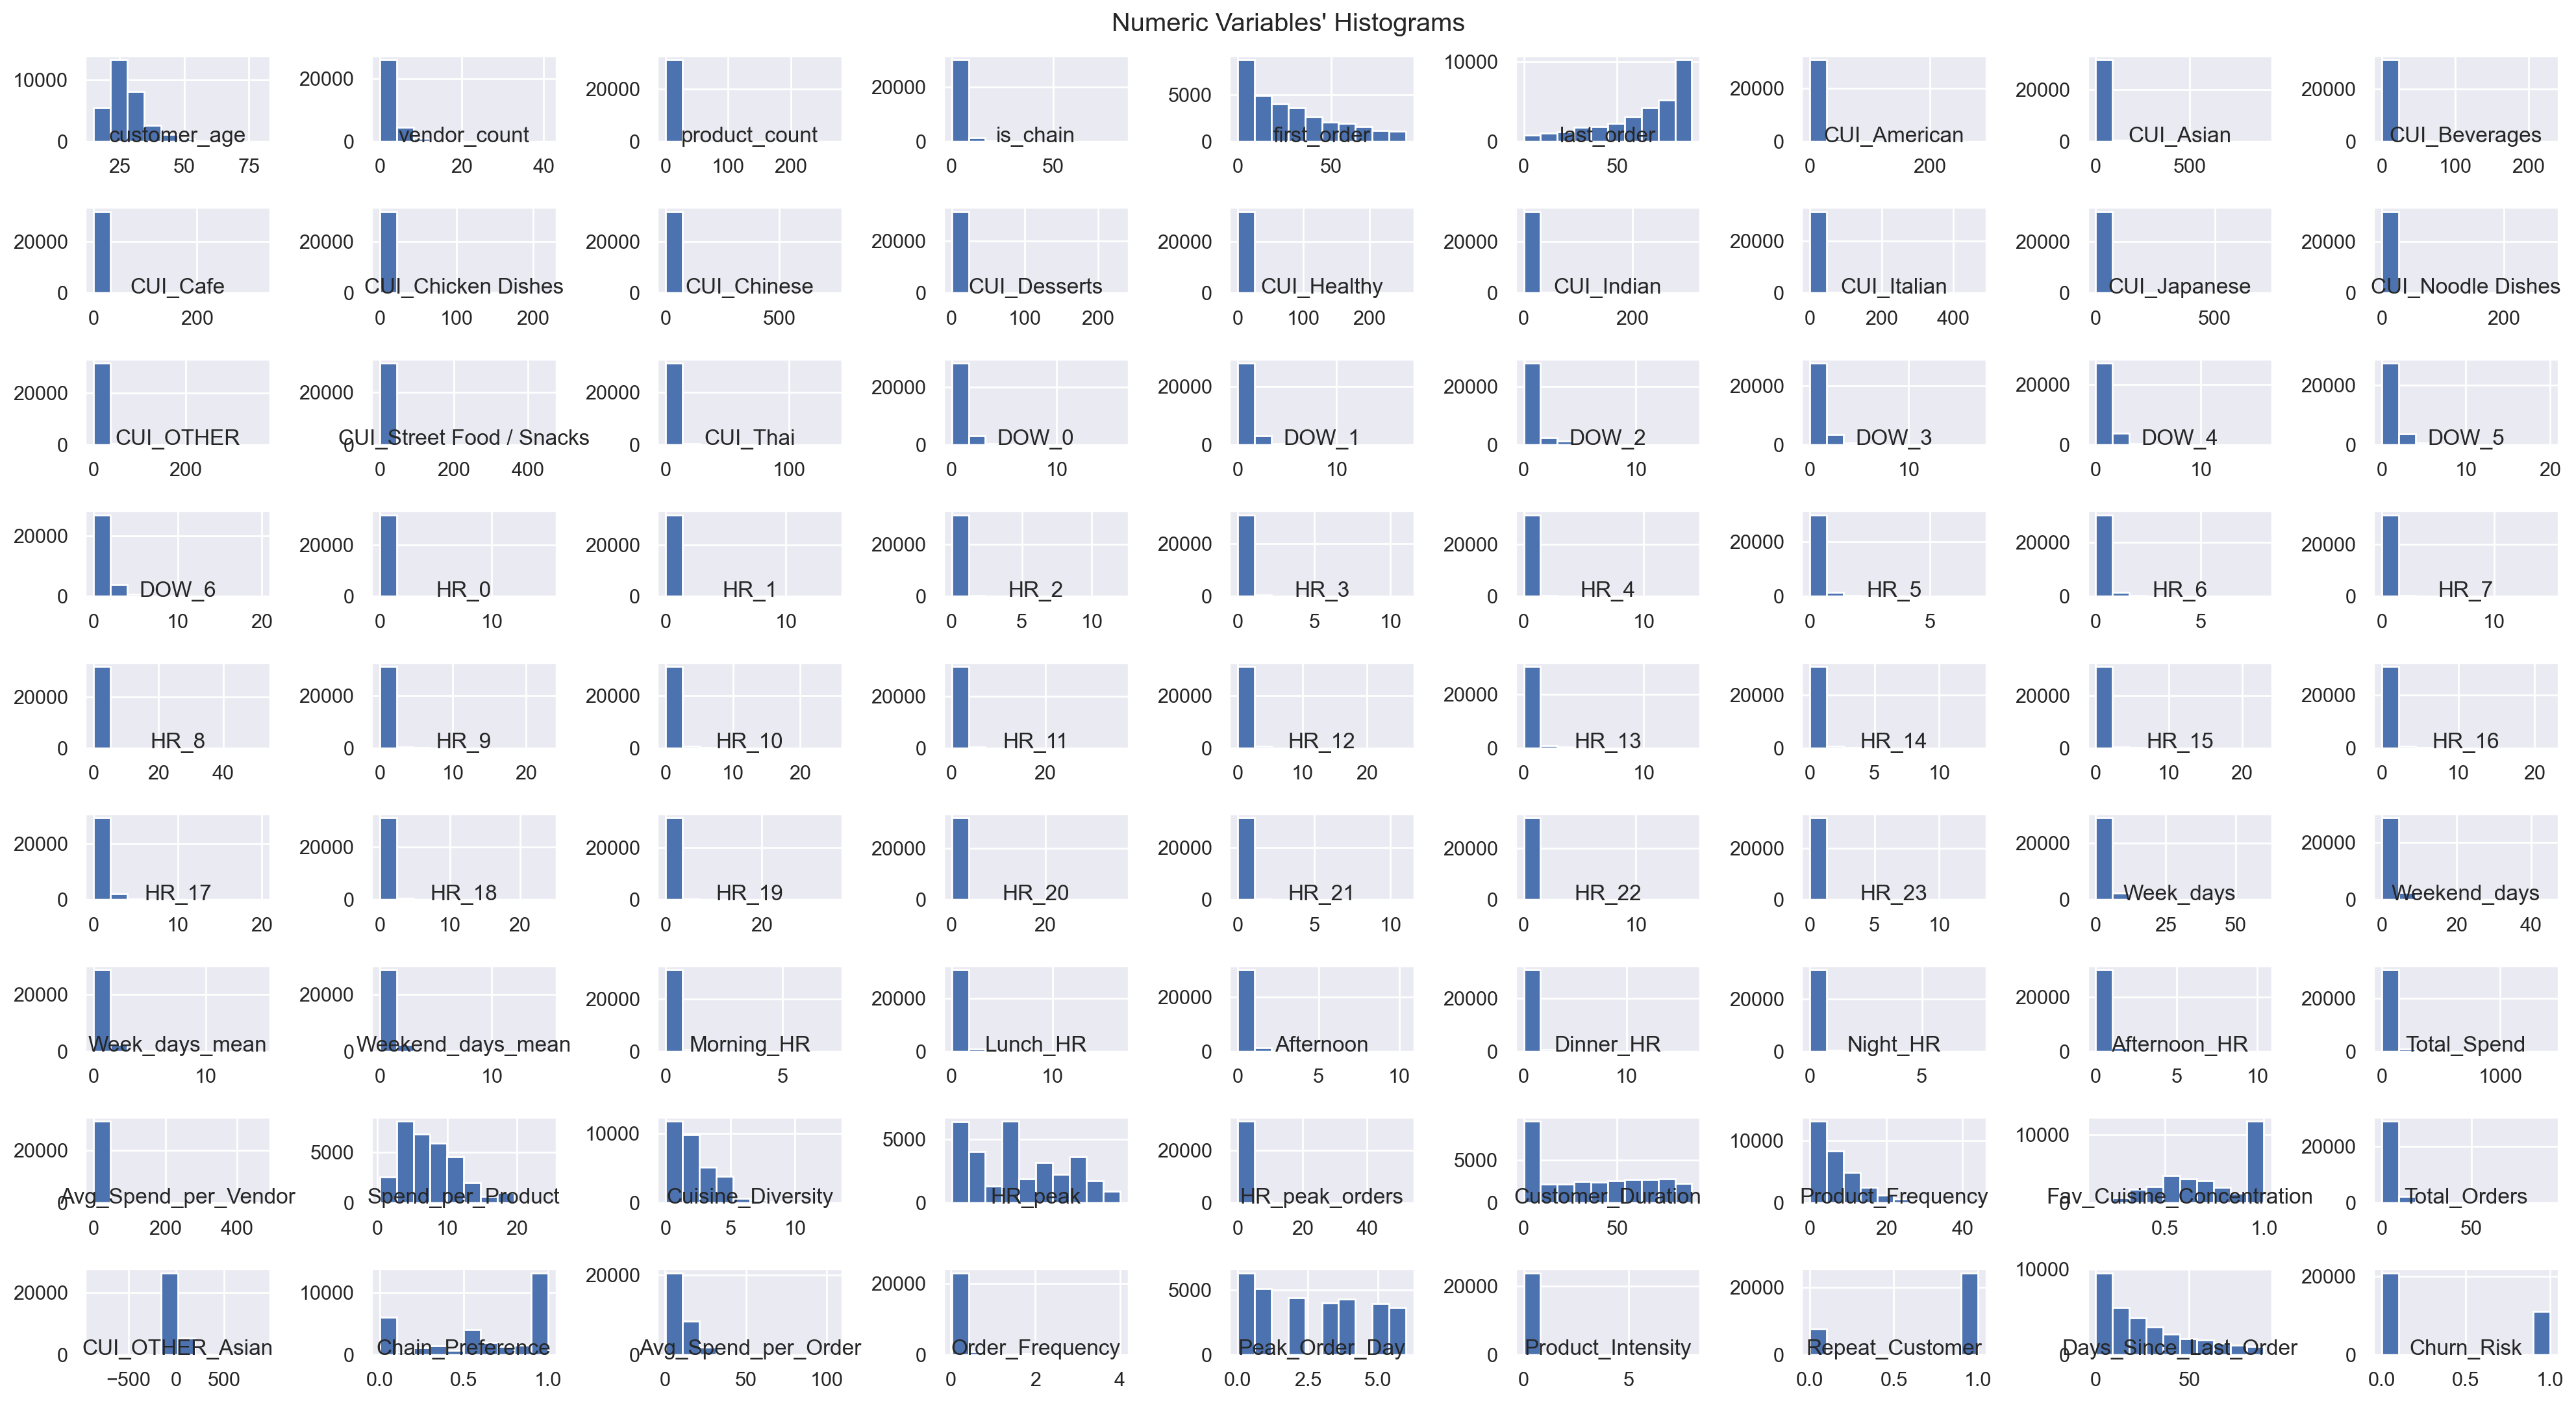

In [51]:
# figure
fig, axes = plt.subplots(9, 9, figsize=(20, 11), tight_layout=True)

# Iterate through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Clean the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plot the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plot the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Set the title for the subplot, slightly below the axis
        
        # Remove x-axis for HR_peak ---> the x-axis was composed of HR_'s, so it was unlegiable
        if feat == 'HR_peak':
            ax.set_xticks([])  # Hide x-axis ticks
            # Alternatively, you can use ax.xaxis.set_visible(False) to hide the entire x-axis

    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicate no data available
        ax.axis('off')  # Turn off the axis if there's no data

# Add a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Check if the output directory exists; if not, create it
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure as a PNG file with 200 DPI resolution
plt.savefig(os.path.join(output_dir, 'numeric_variables_histograms.png'), dpi=200)

# Display the figure
plt.show()

## Numerical Variables Box Plots

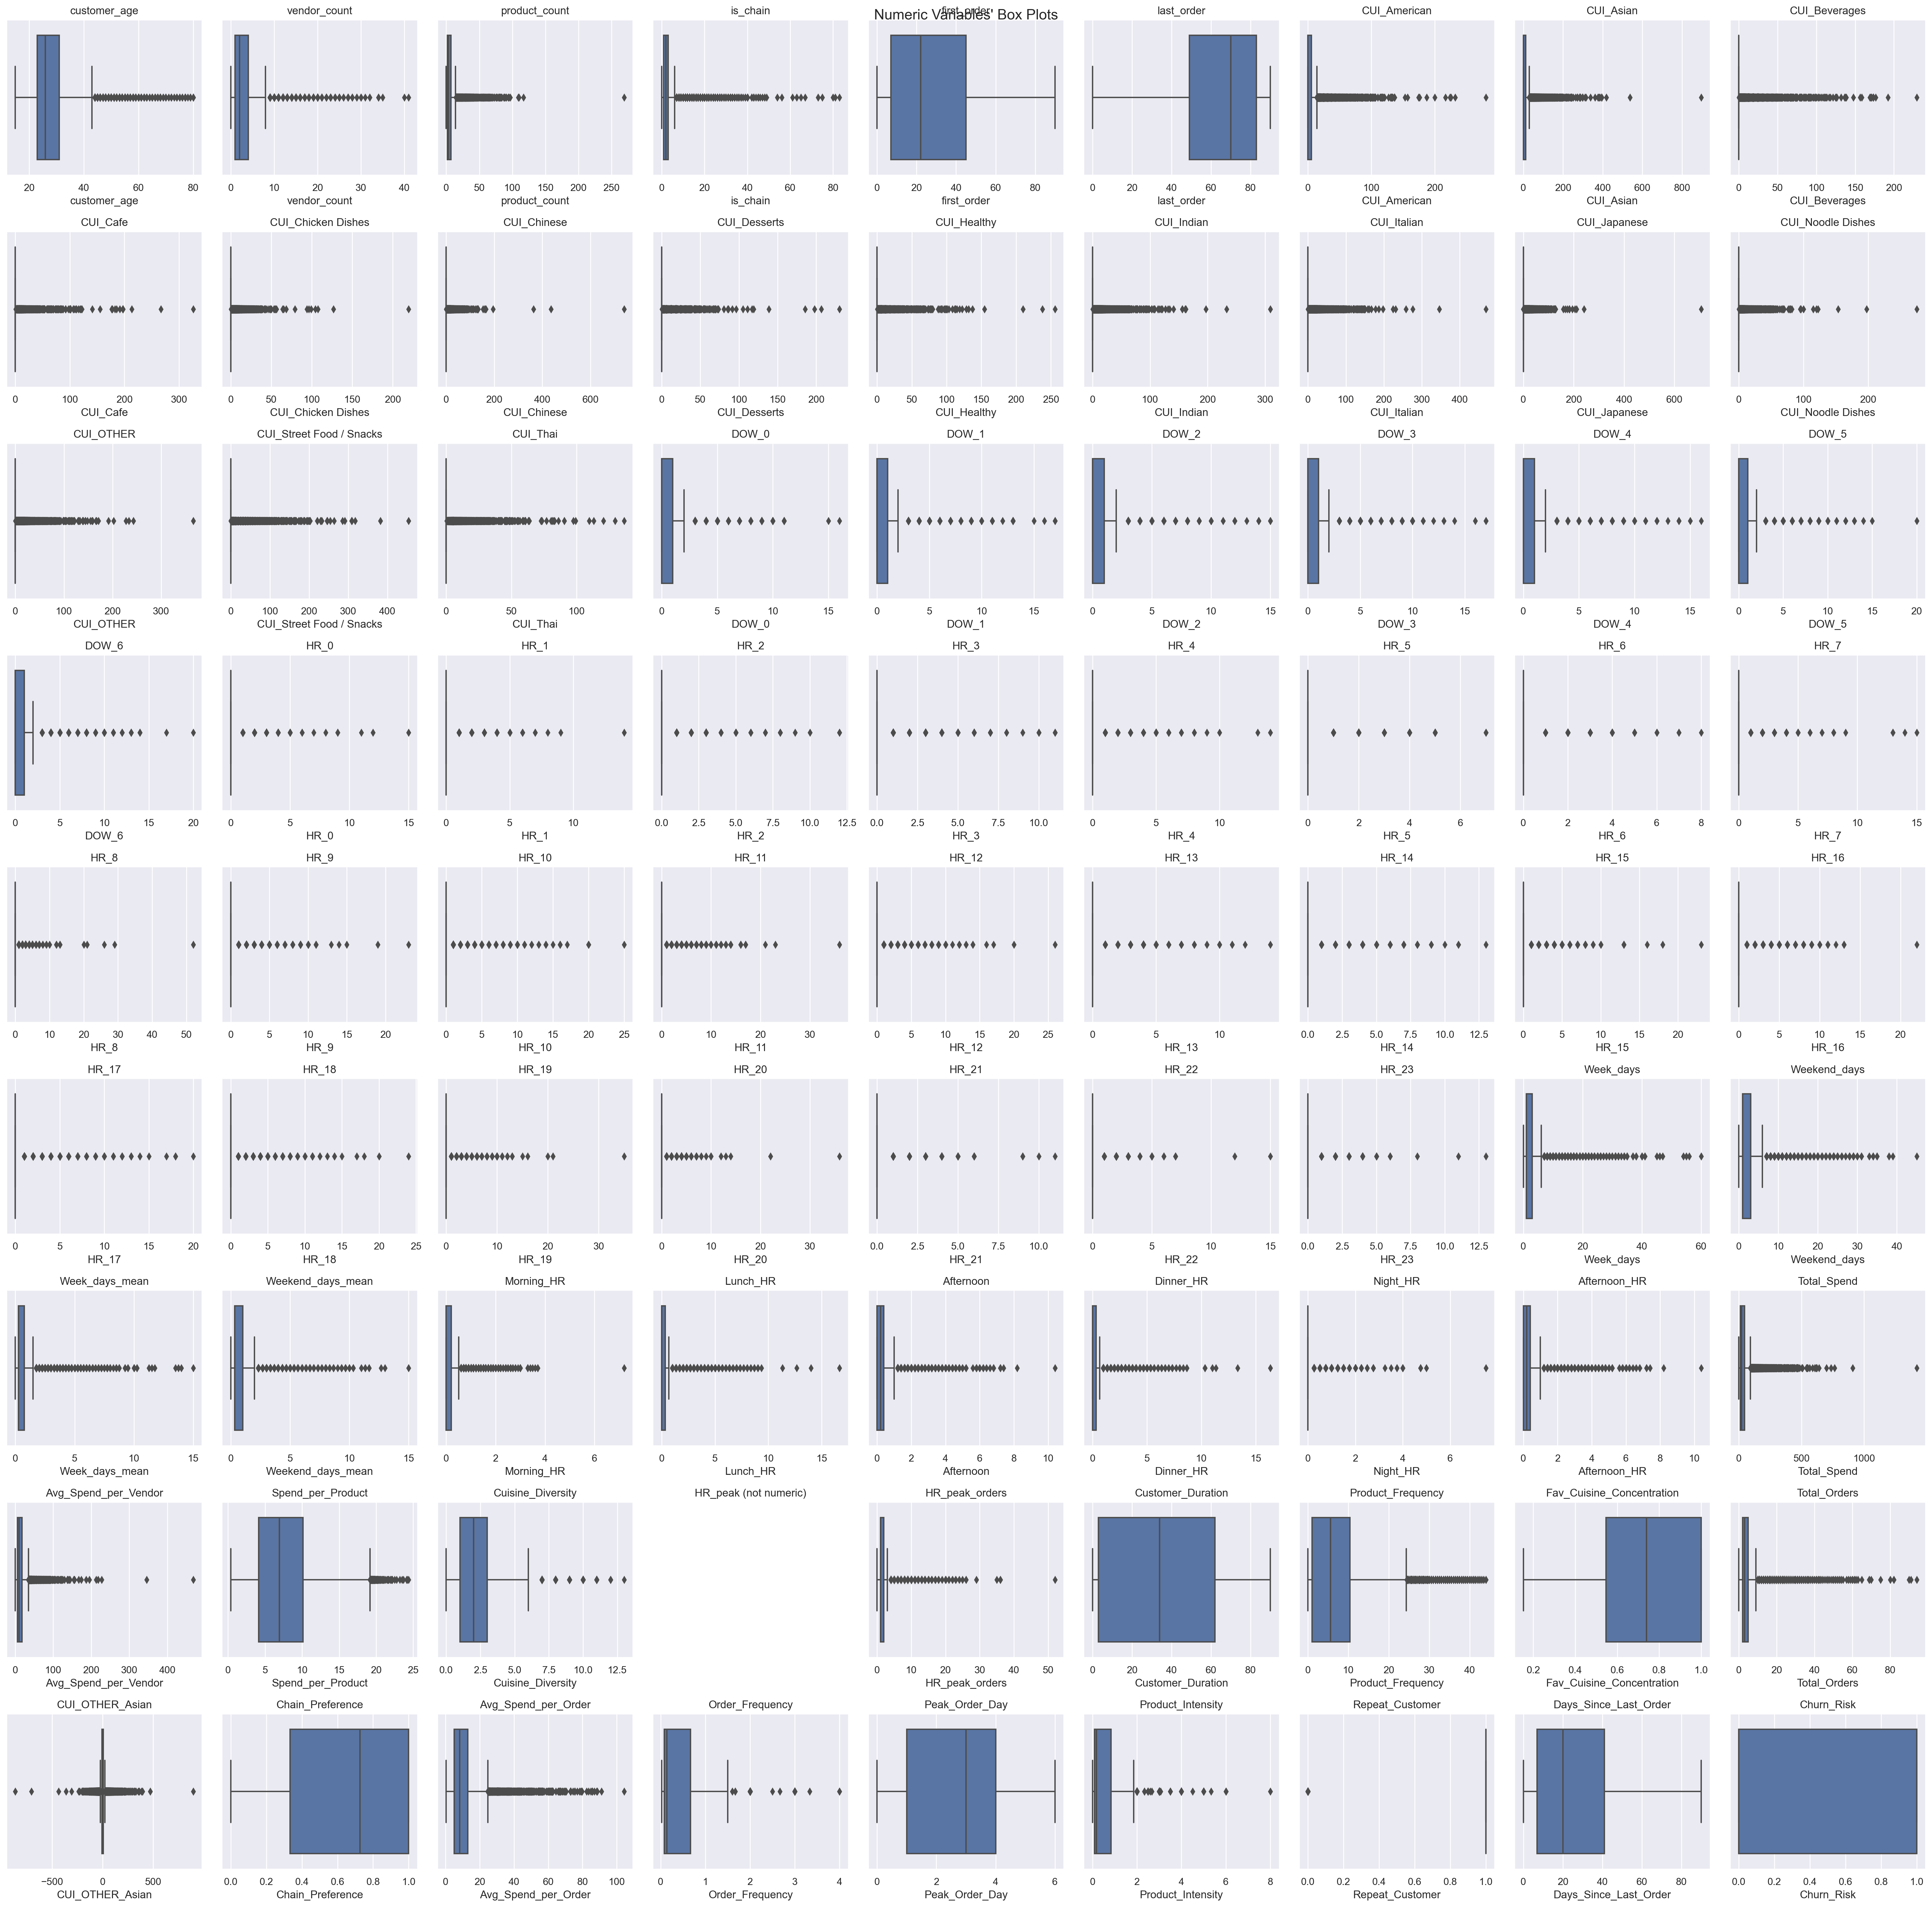

In [52]:
# Prepare figure
fig, axes = plt.subplots(9, 9, figsize=(30, 30), tight_layout=True)

# Iterate across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    # Ensure the column exists and is numeric
    if feat in df.columns and pd.api.types.is_numeric_dtype(df[feat]):
        sns.boxplot(x=df[feat], ax=ax)
        ax.set_title(feat)  #title of each subplot
    else:
        ax.set_title(f"{feat} (not numeric)")  
        ax.axis('off')  # Turn off the axis if it's not numeric

# Add a centered title to the figure
title = "Numeric Variables' Box Plots"
plt.suptitle(title, fontsize=16)

# Create directory if it doesn't exist
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the figure with a higher dpi for clarity
plt.savefig(os.path.join(output_dir, 'numeric_variables_boxplots.png'), dpi=200)

# Show the plot
plt.show()

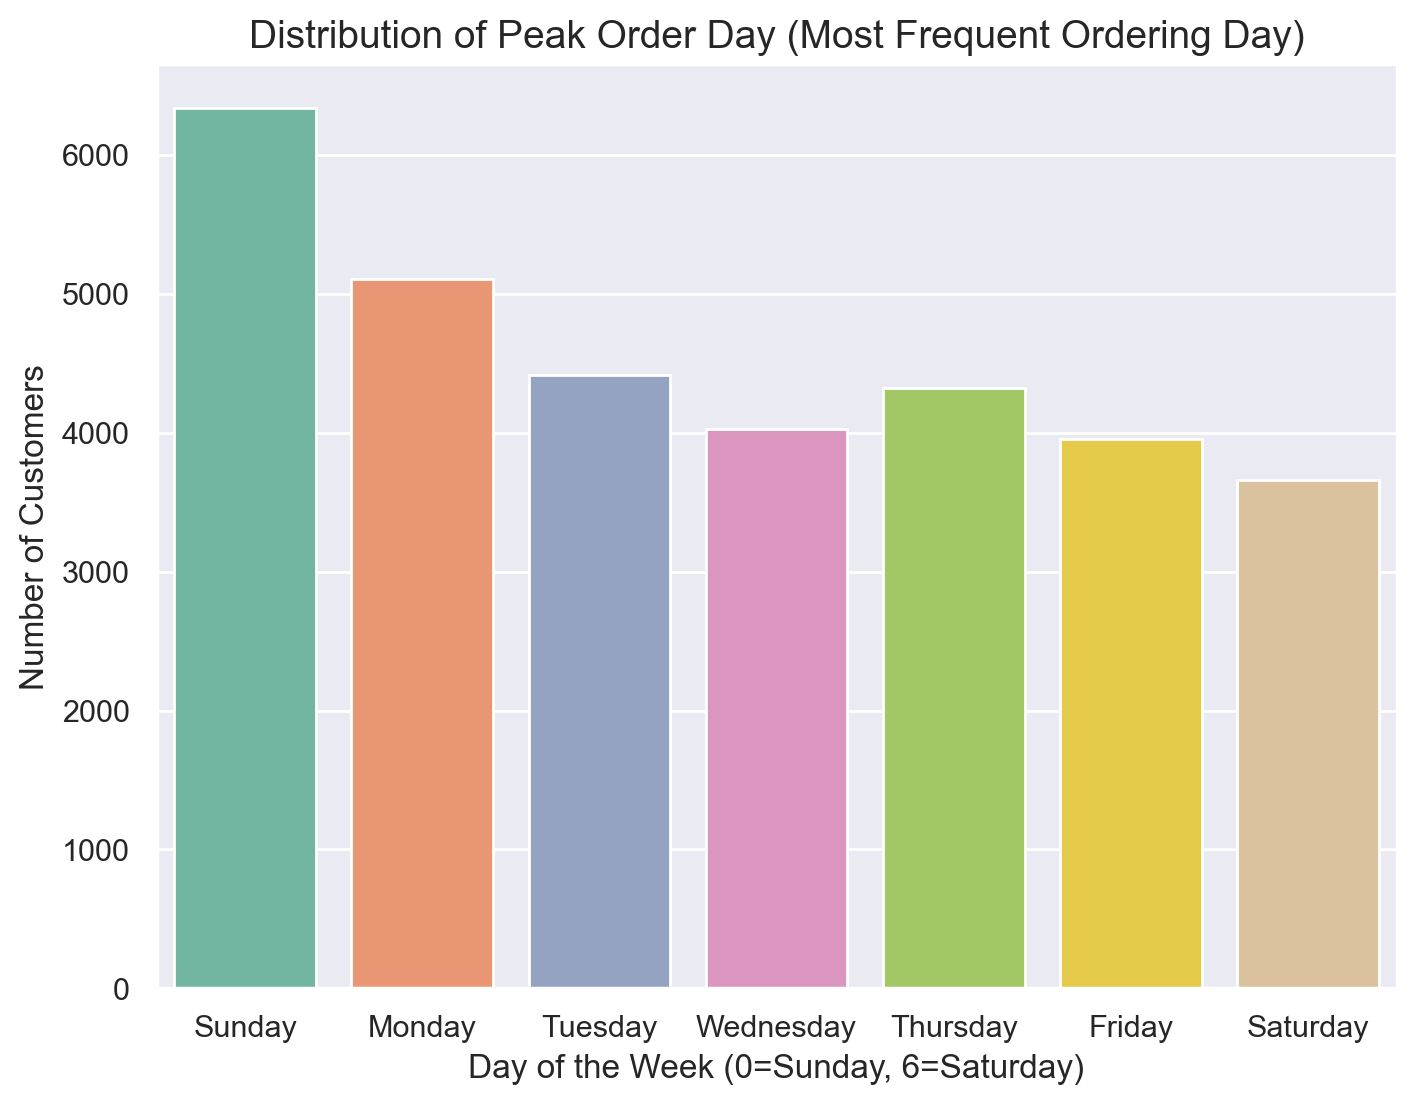

In [53]:
# (Bruna)
# Bar chart for Peak Order Day distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Peak_Order_Day', data=df, palette='Set2')
plt.title('Distribution of Peak Order Day (Most Frequent Ordering Day)', fontsize=14)
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

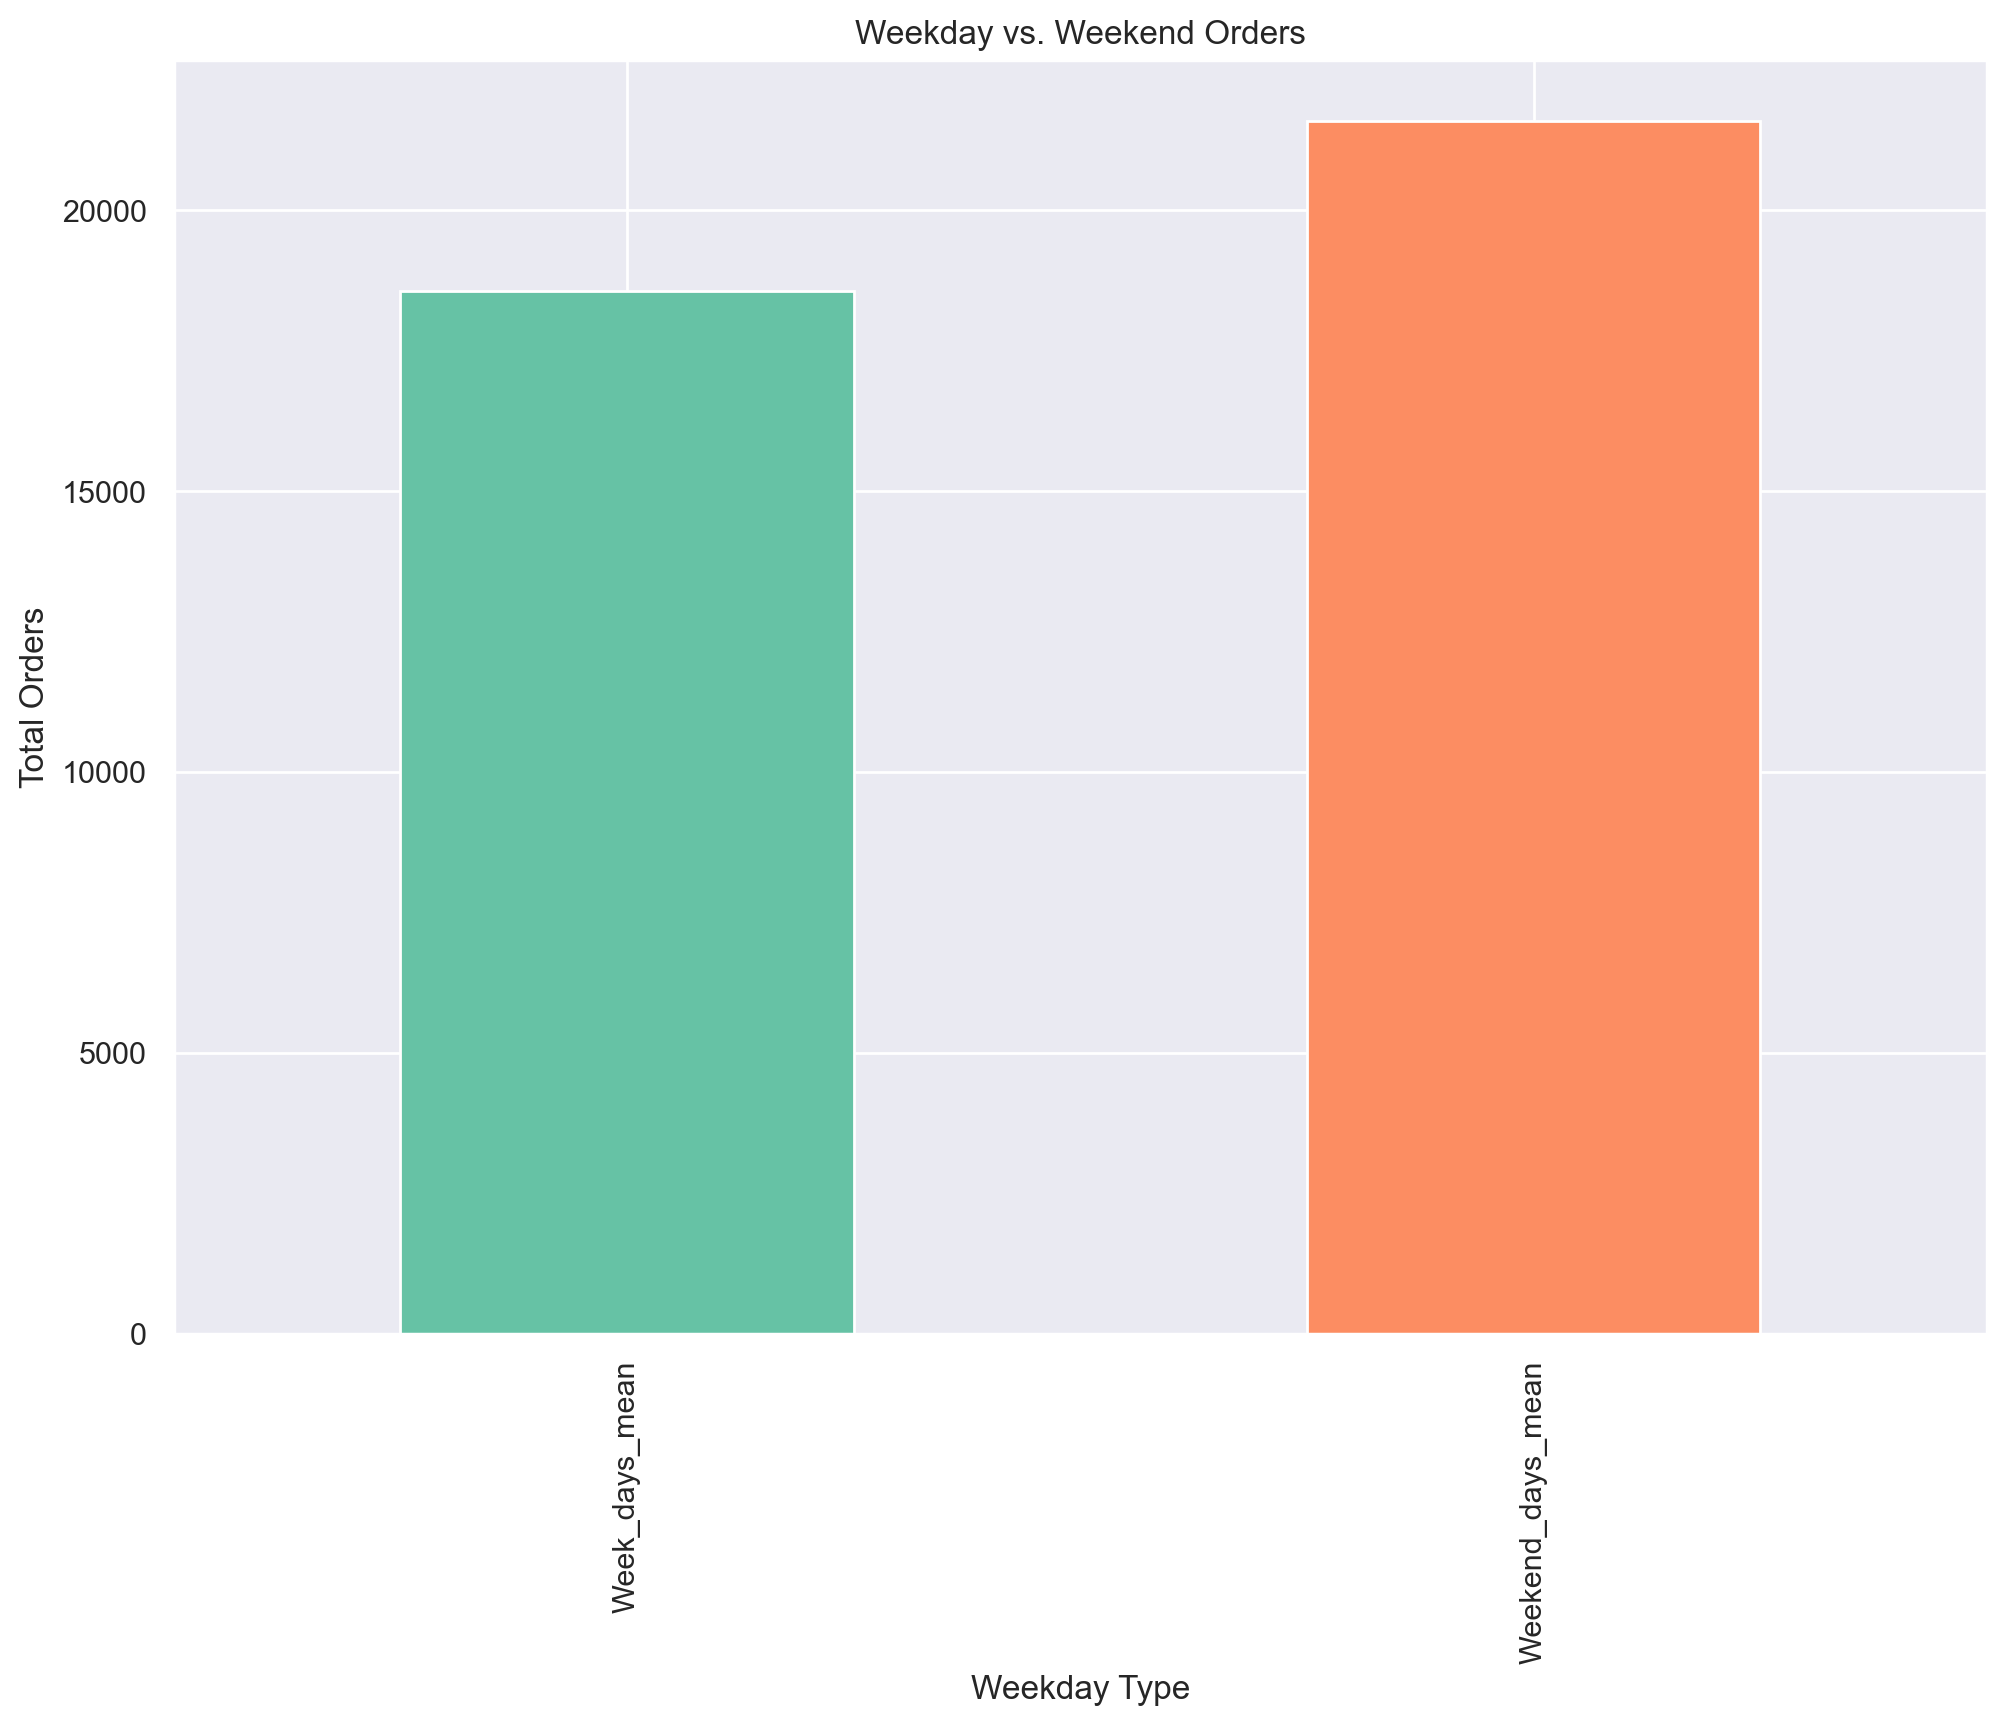

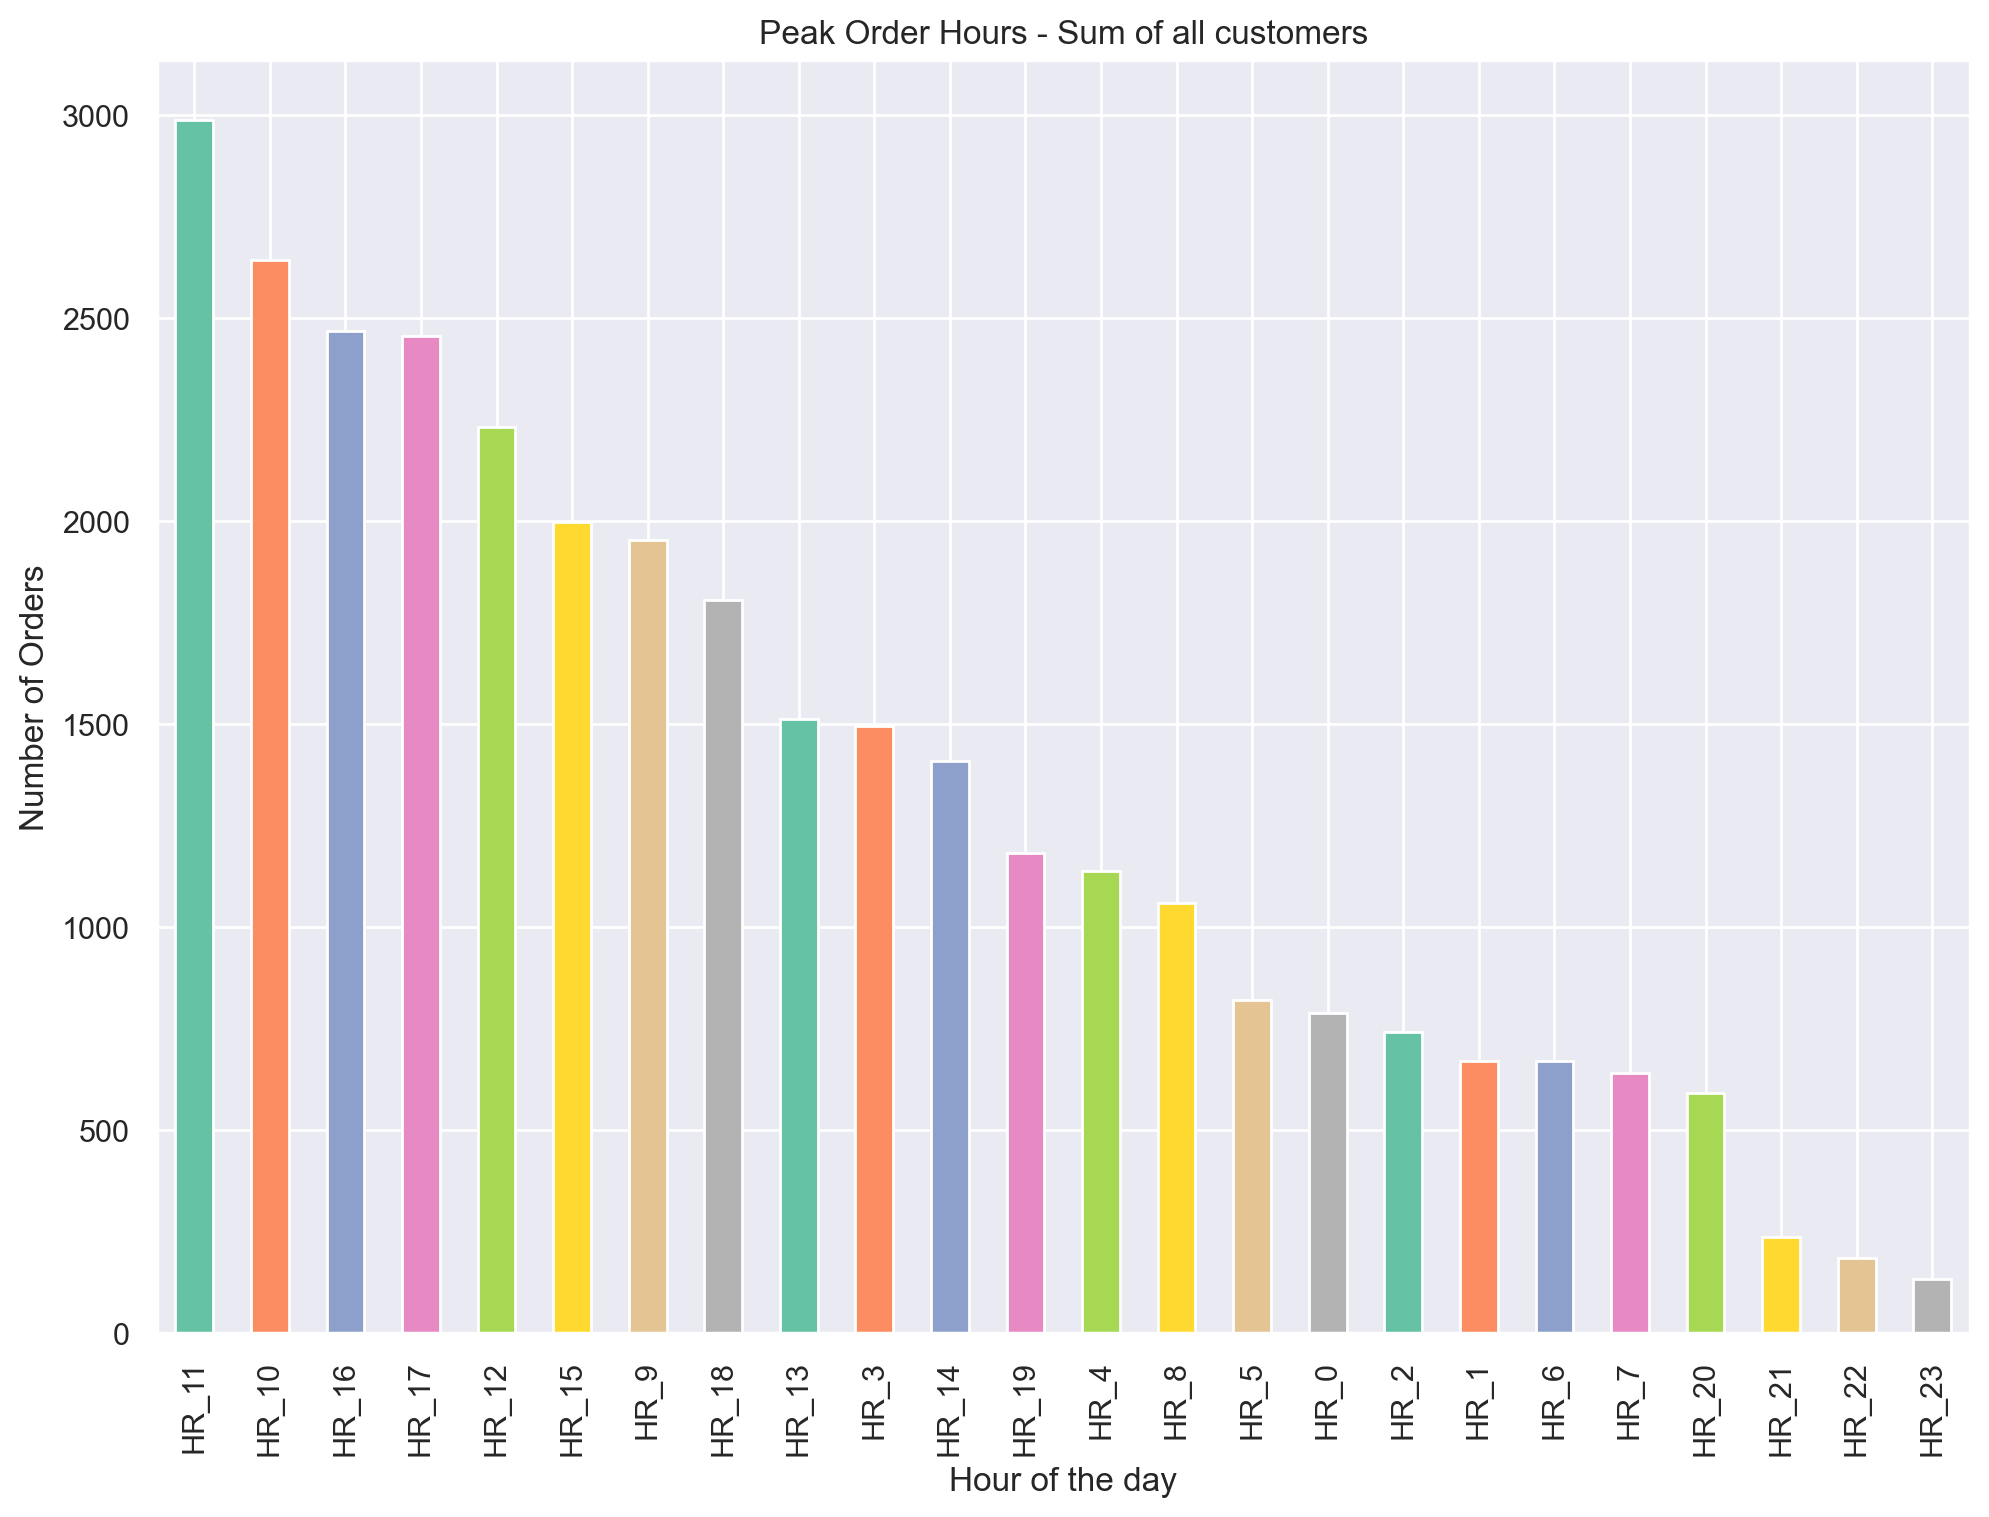

In [54]:
#colors
sns.set_palette("Set2") 

# Weekend / Weekday orders
sum_dow = ["Week_days_mean", "Weekend_days_mean"]
df[sum_dow].sum().plot(kind='bar',color=colors[:len(sum_dow)], title='Weekday vs. Weekend Orders')
plt.xlabel('Weekday Type')  
plt.ylabel('Total Orders')  
plt.show()

# Peak Order Hours - Sum of all customers
hr_peak_counts = df["HR_peak"].value_counts()
df["HR_peak"].value_counts().plot(kind="bar",color=colors[:len(hr_peak_counts)], title="Peak Order Hours - Sum of all customers")
plt.xlabel('Hour of the day') 
plt.ylabel('Number of Orders')  
plt.show()

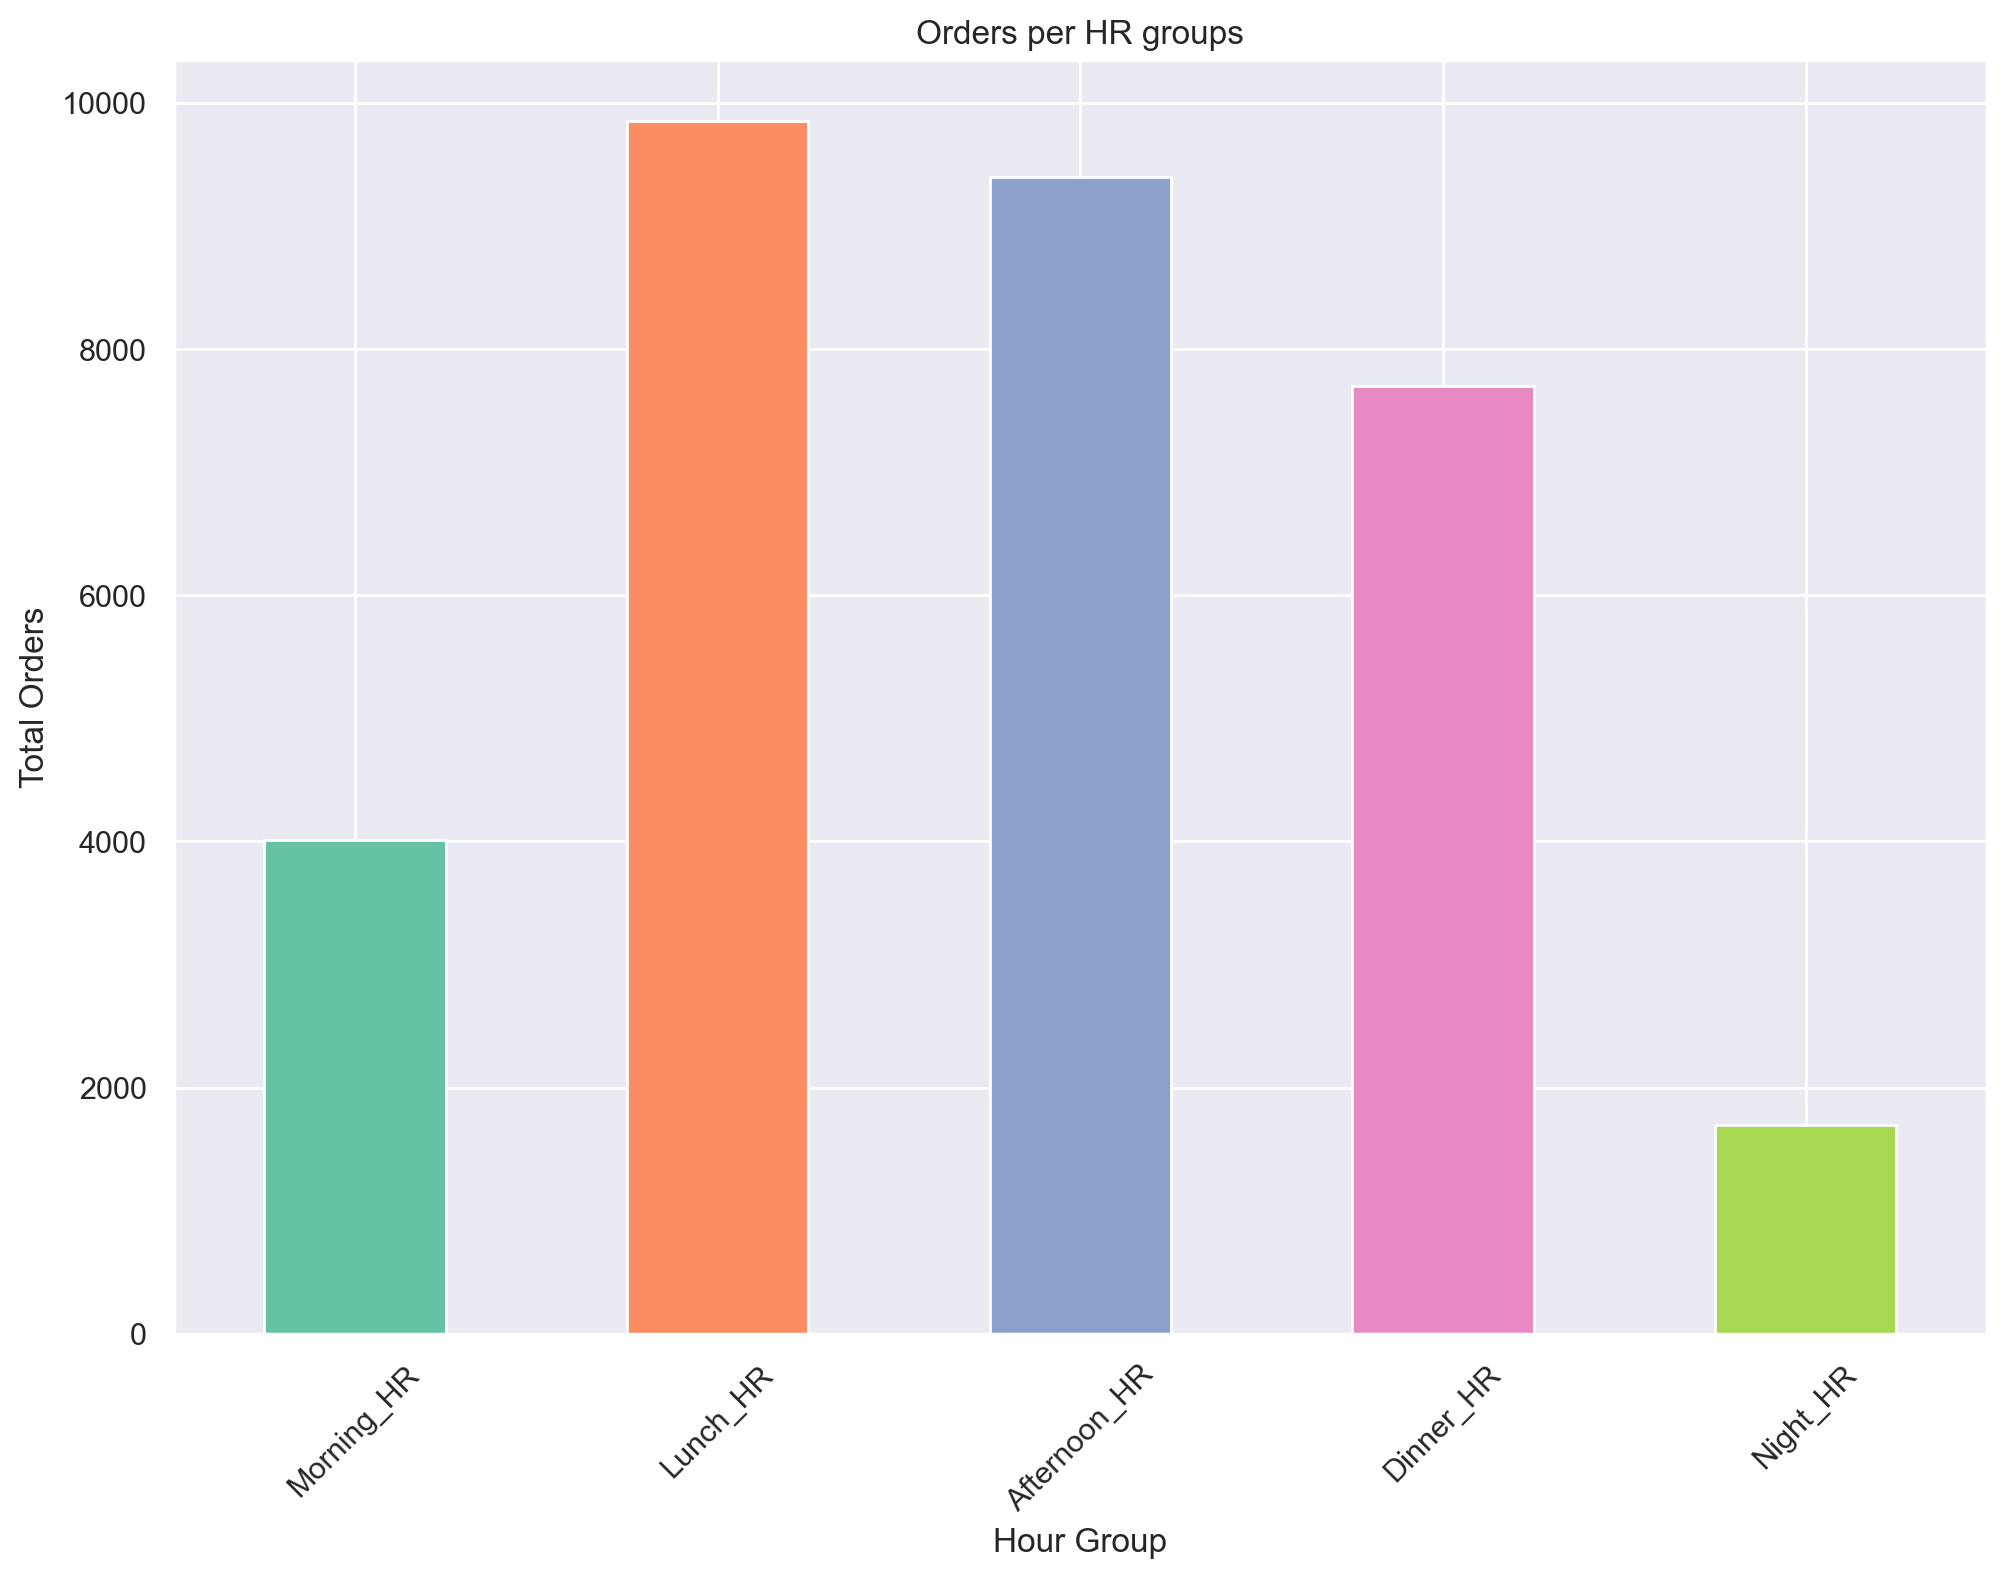

In [55]:
colors = sns.color_palette("Set2")
HR_groups = ["Morning_HR", "Lunch_HR", "Afternoon_HR", "Dinner_HR", "Night_HR"]

# Plot
df[HR_groups].sum().plot(kind="bar", color=colors[:len(HR_groups)], title="Orders per HR groups")

plt.xlabel('Hour Group')  
plt.ylabel('Total Orders')  
plt.xticks(rotation=45) 
plt.show()

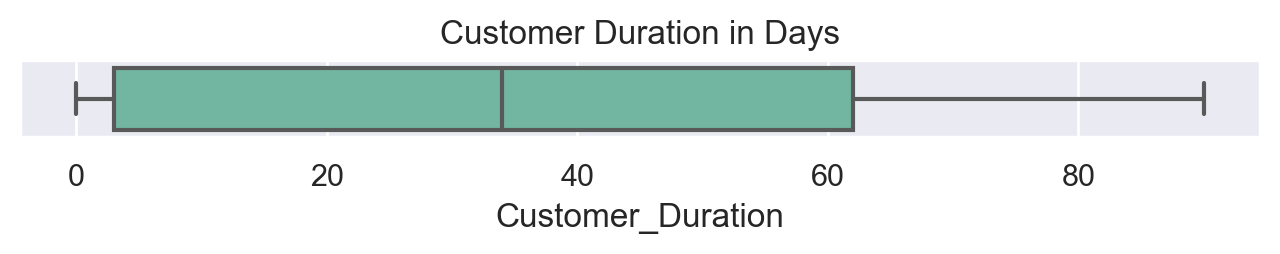

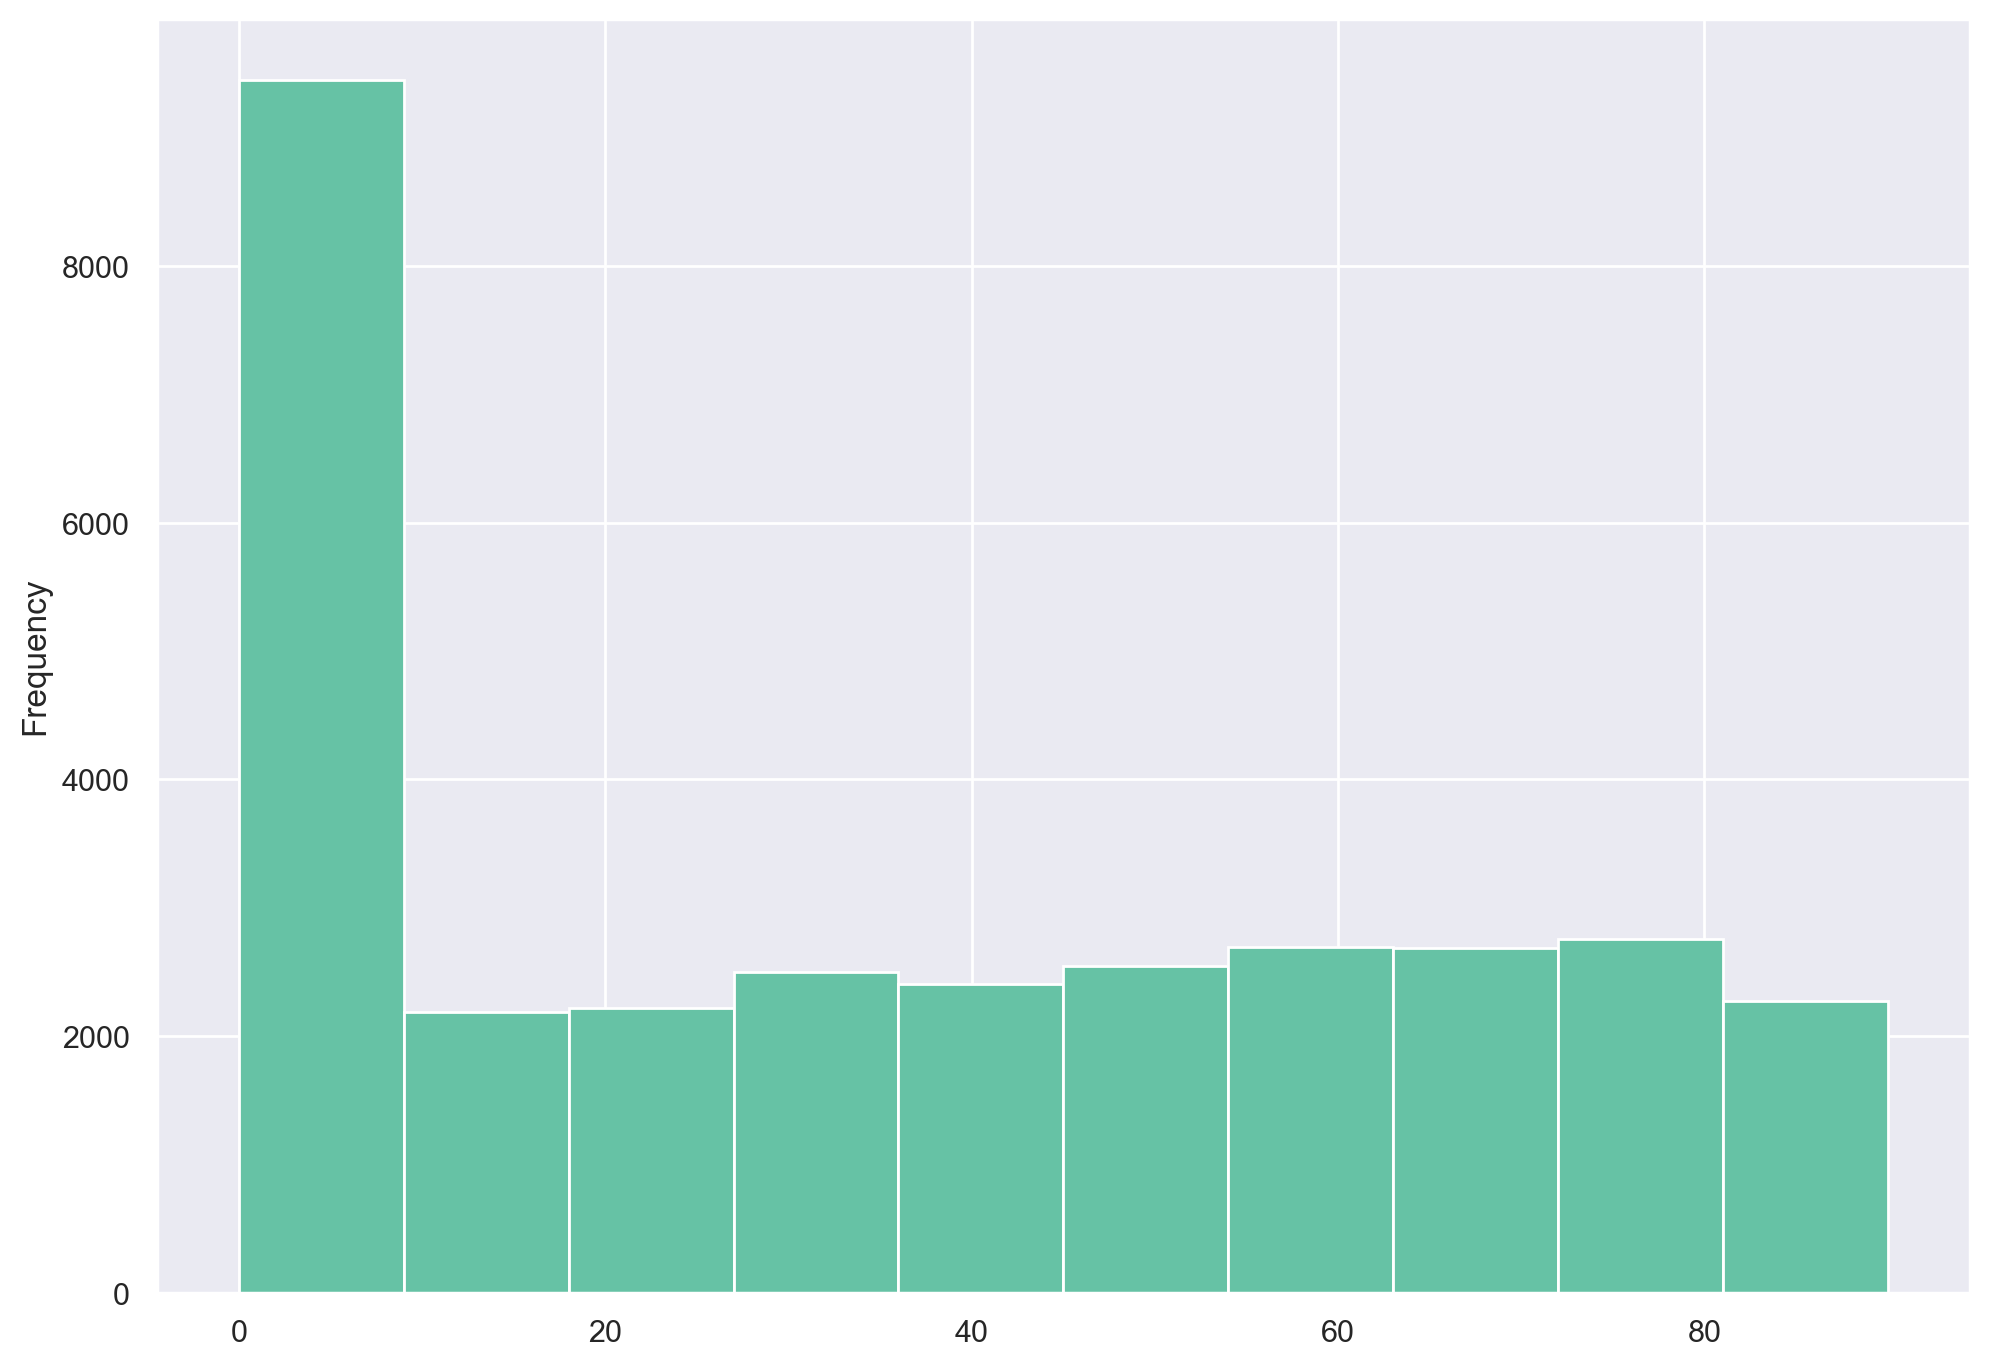

In [56]:
plt.figure(figsize=(8, 0.5))
sns.boxplot(x="Customer_Duration", data=df).set(title="Customer Duration in Days")
plt.show()


df['Customer_Duration'].plot(kind='hist', bins=10)
plt.show()

In [57]:
df['product_count'].value_counts()

2      6270
3      4960
1      4687
4      3397
5      2378
       ... 
117       1
110       1
83        1
84        1
68        1
Name: product_count, Length: 93, dtype: int64

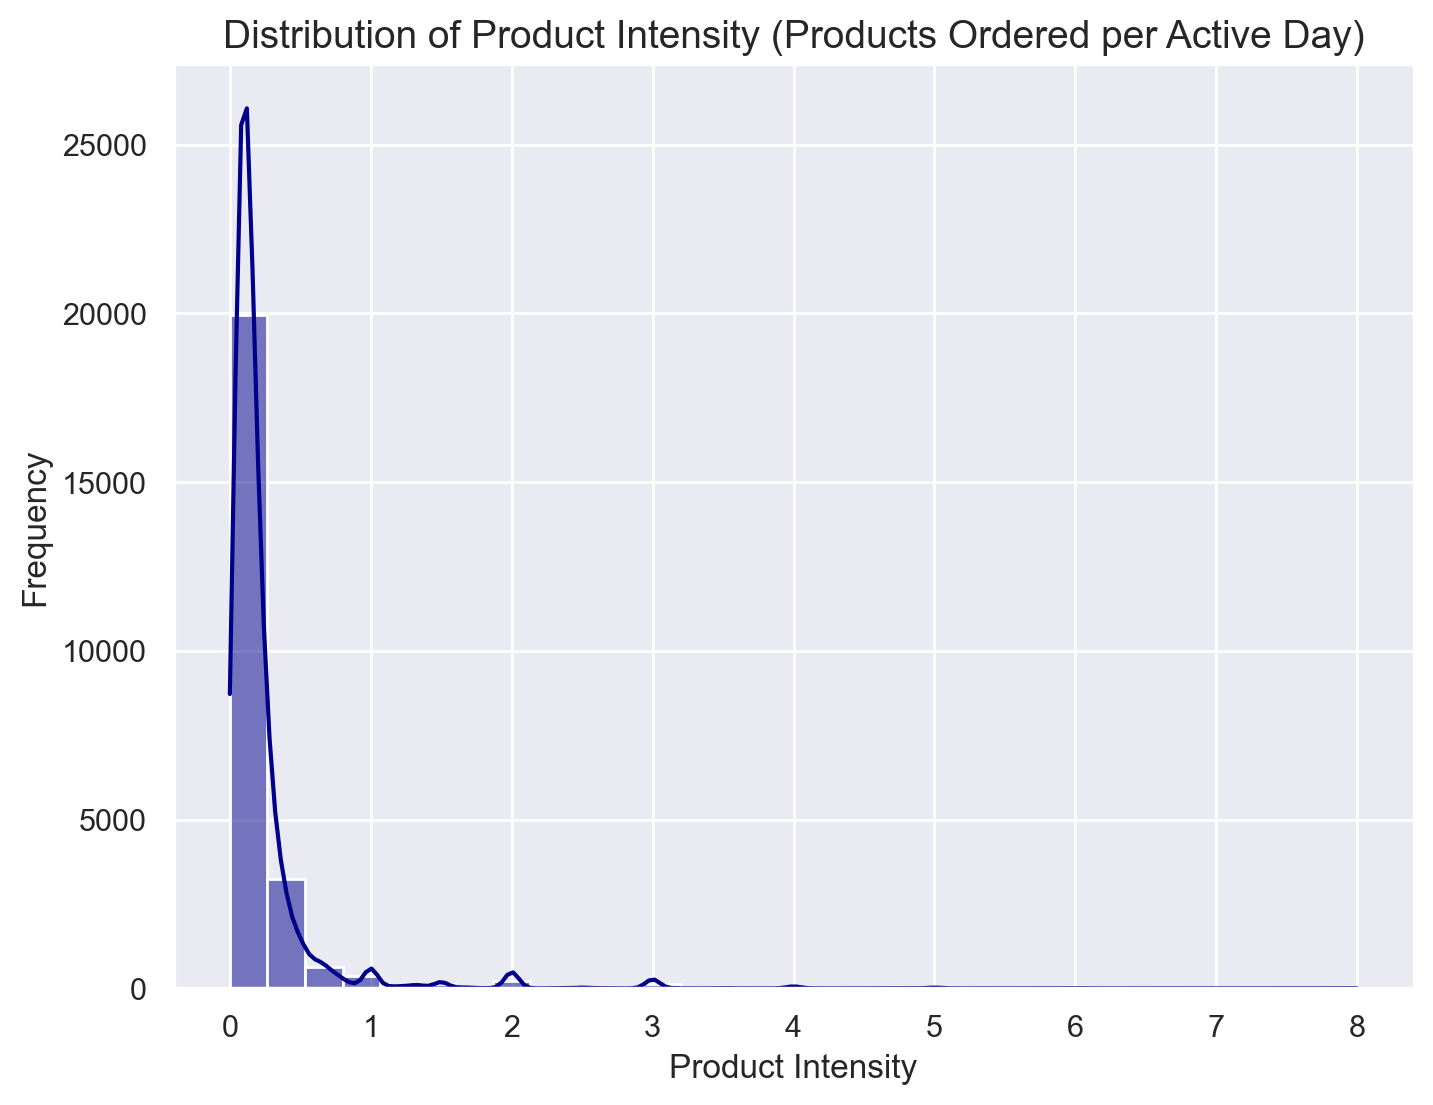

In [58]:
# Histogram for Product Intensity distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Product_Intensity'], kde=True, color='darkblue', bins=30)
plt.title('Distribution of Product Intensity (Products Ordered per Active Day)', fontsize=14)
plt.xlabel('Product Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

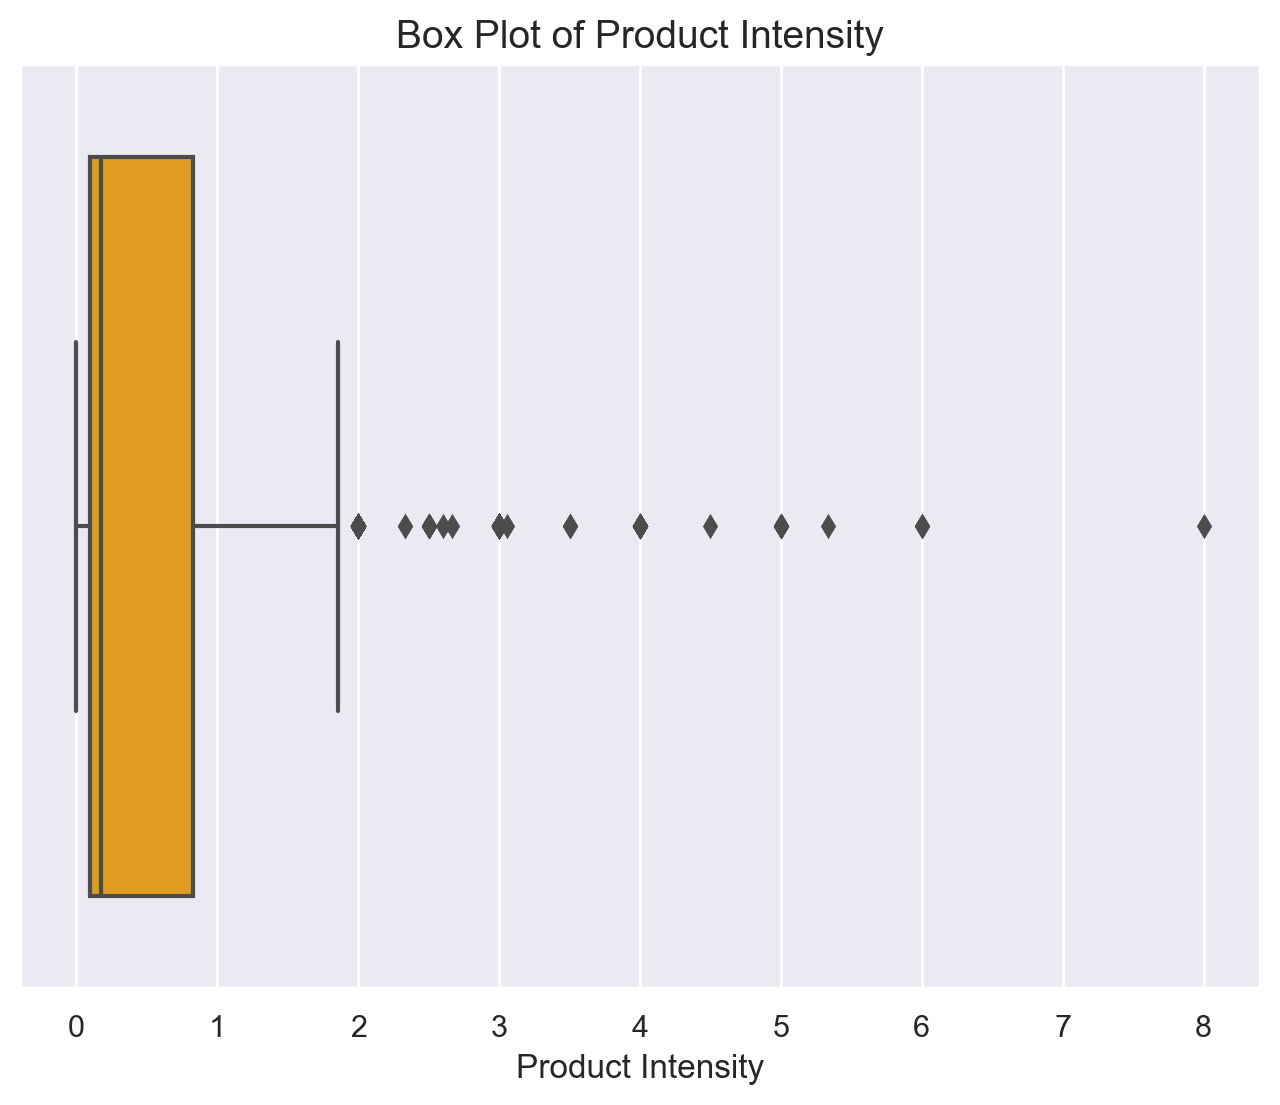

In [59]:
# Box plot for Product_Intensity
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Product_Intensity'], color='orange')
plt.title('Box Plot of Product Intensity', fontsize=14)
plt.xlabel('Product Intensity', fontsize=12)
plt.show()

Key Observations:
* **Concentration of Low Values**: The majority of the data points are concentrated near the lower end (close to zero), indicating that most customers have a very low order intensity (i.e., they order a small number of products per active day). The frequency of customers with low order intensity is significantly high.
* There is a long tail extending to the right, showing that a small number of customers have much higher order intensities. These customers order significantly more products per day, but they are rare compared to those with low order intensity.
* **Outliers**: The long tail suggests the presence of outliers — customers who order more than 2 or 3 products per active day are not common. These outliers might warrant further investigation to see if they represent a specific customer segment or behavior that differs from the norm.

Interpretation:
* **Behavioral Implications**: This distribution implies that most customers do not make frequent or large orders on a daily basis. The few customers who do have higher order intensity might represent more valuable or high-frequency shoppers.
* **Business Strategy**: Understanding this skewed distribution could help in segmenting customers based on their order intensity. Businesses could target high-intensity customers with loyalty programs or promotions, while encouraging low-intensity customers to increase their order frequency through personalized offers.

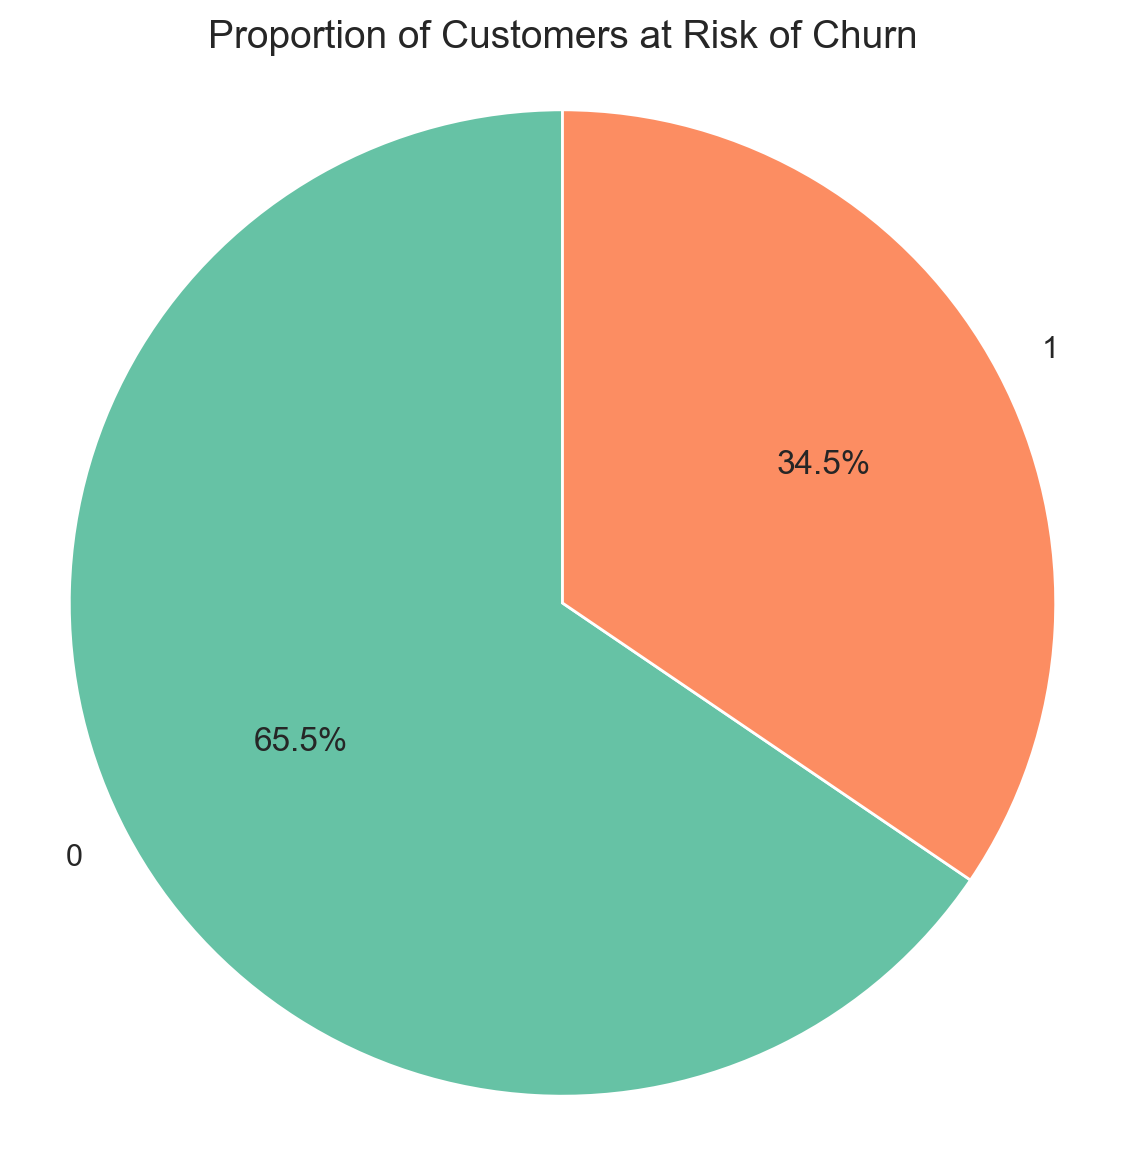

In [60]:
# Pie chart for Churn Risk Proportion
plt.figure(figsize=(7, 7))
churn_counts = df['Churn_Risk'].value_counts()
colors = sns.color_palette("Set2", n_colors=len(churn_counts)) 

# pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Customers at Risk of Churn', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

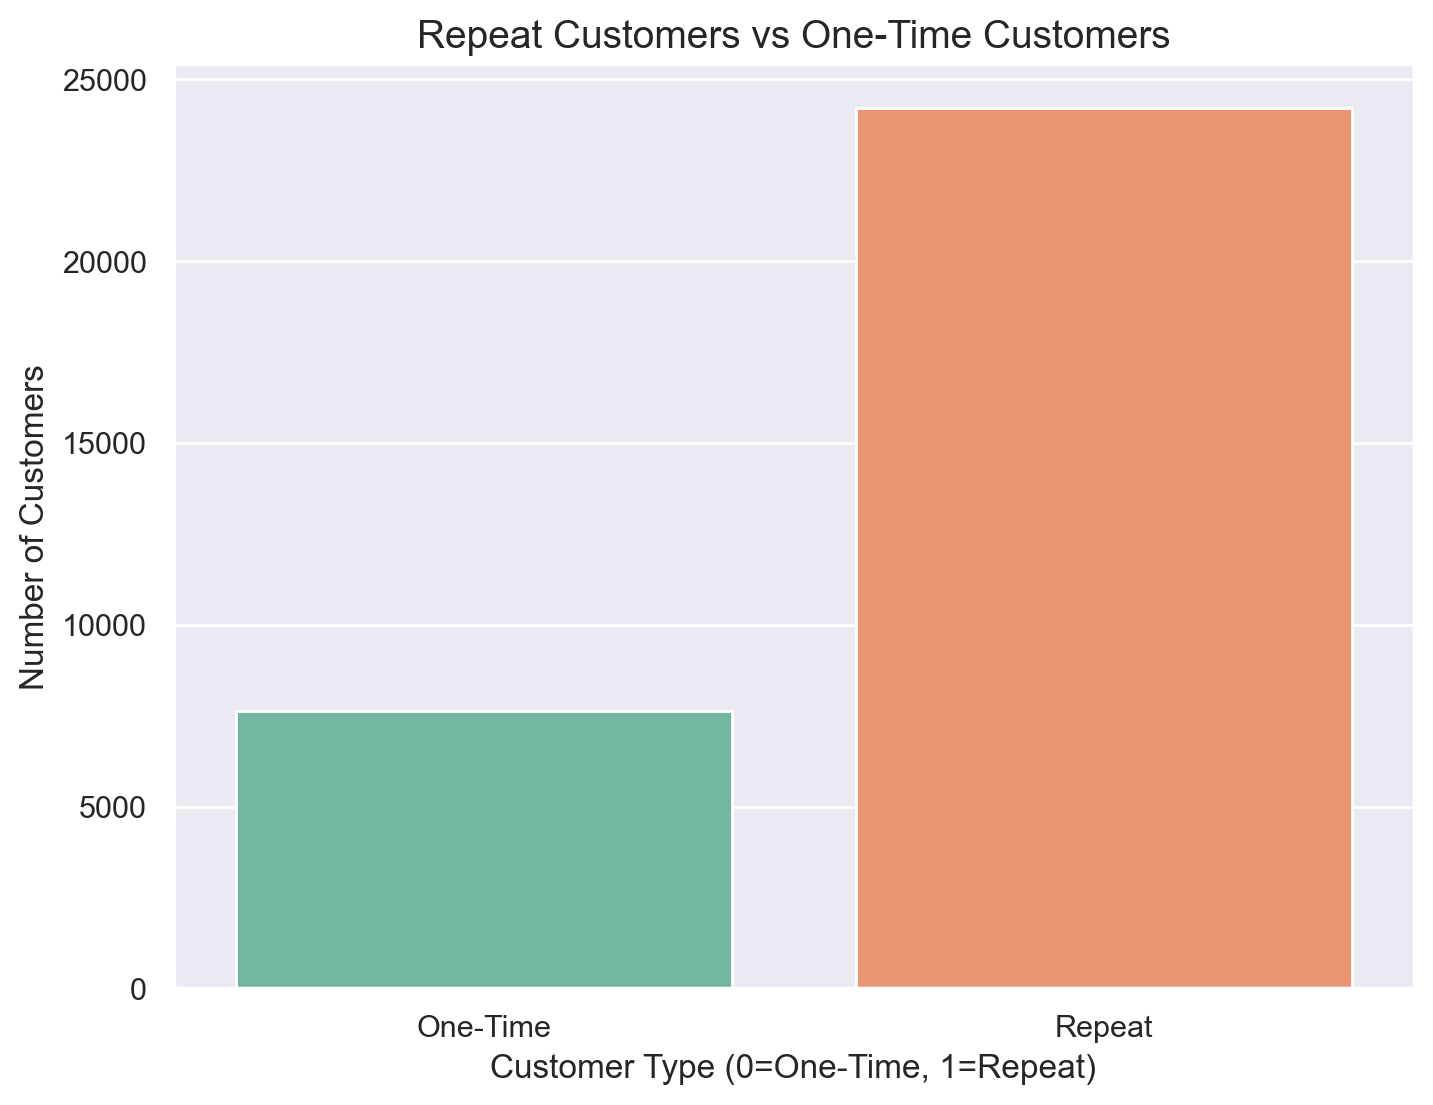

In [61]:
# Bar chart for Repeat Customers
plt.figure(figsize=(8,6))
sns.countplot(x='Repeat_Customer', data=df, palette='Set2')
plt.title('Repeat Customers vs One-Time Customers', fontsize=14)
plt.xlabel('Customer Type (0=One-Time, 1=Repeat)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['One-Time', 'Repeat'])
plt.show()

# Bivariate Analysis

## Pairwise Relationship of Numerical Variables

### Scatter Plots

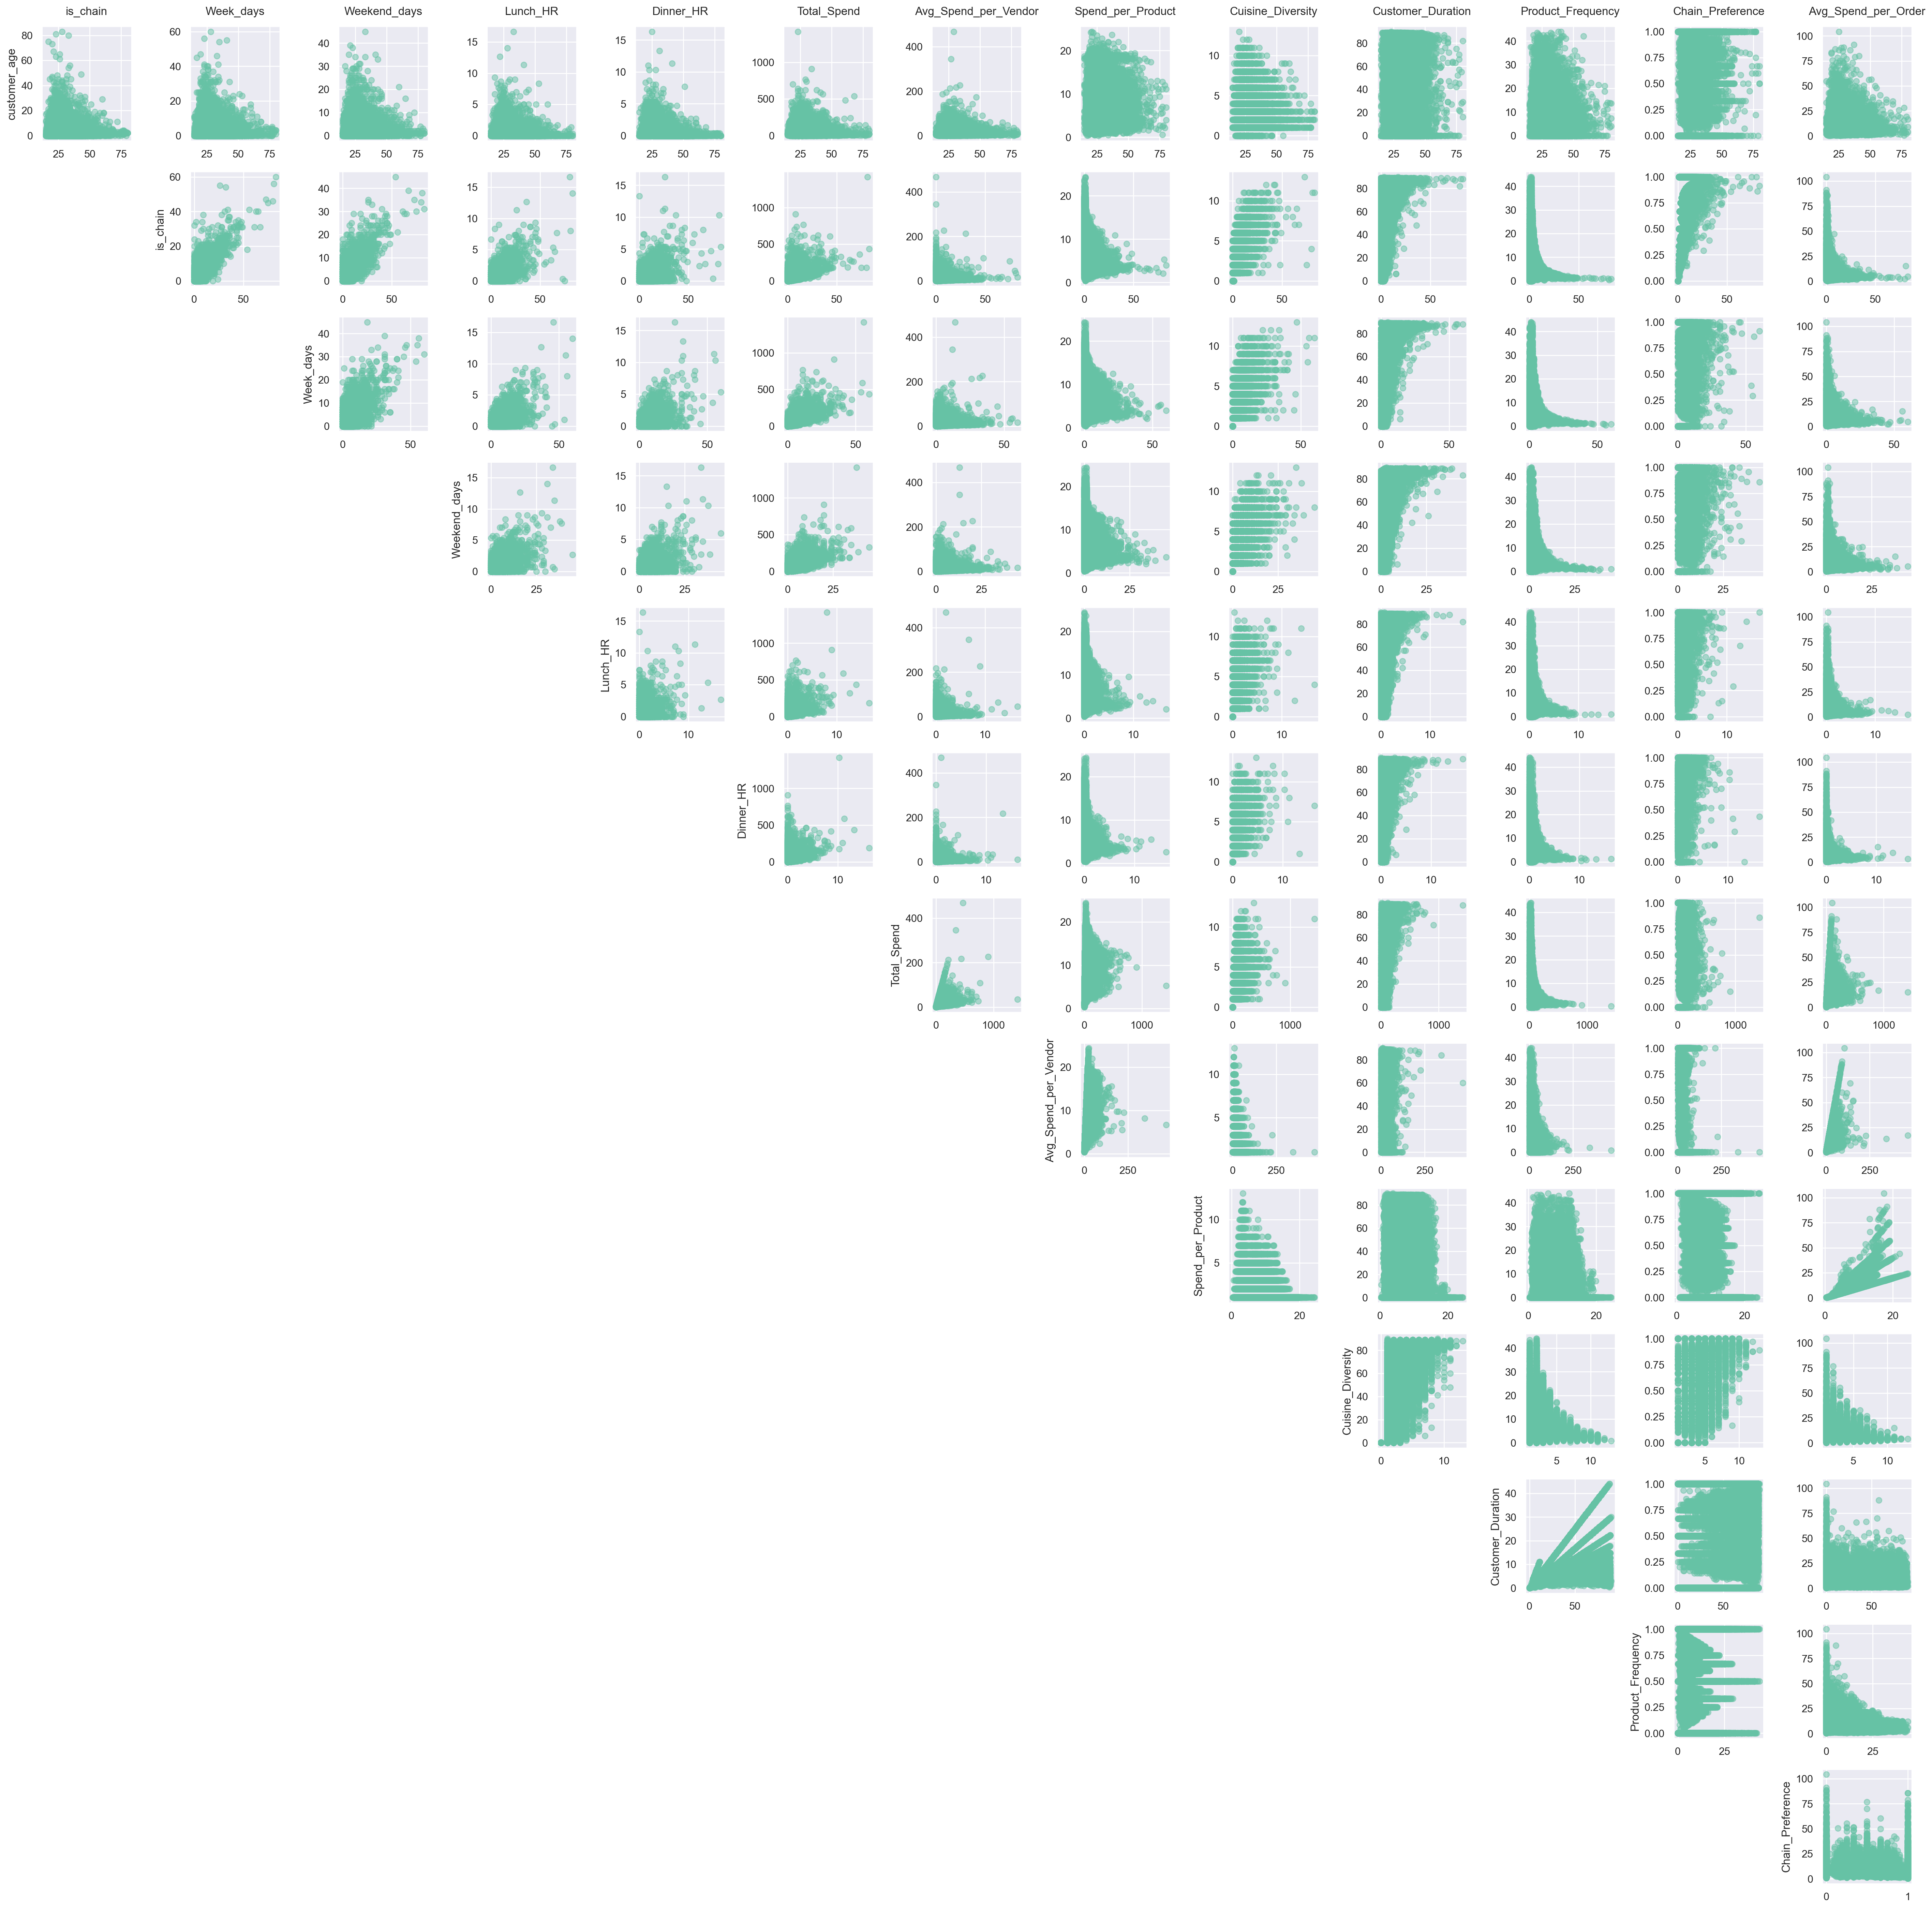

In [62]:
variables = ['customer_age','is_chain','Week_days', 'Weekend_days','Lunch_HR','Dinner_HR', 'Total_Spend','Avg_Spend_per_Vendor',
             'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Product_Frequency','Chain_Preference', 'Avg_Spend_per_Order']

# Figure size
plt.figure(figsize=(30, 30)) 
n = len(variables)

for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(n, n, i * n + j + 1)
        plt.scatter(df[variables[i]], df[variables[j]], alpha=0.5)
        
        # Labelling the margins
        if j == i + 1:  # Only the first graph in each line will have the title
            plt.ylabel(variables[i])
        if i == n - 1:  # Only the last graph in each line will have the title
            plt.xlabel(variables[j])
        
        # Title for each graph
        if i == 0:  # Only the first graph in each column
            plt.title(variables[j], y=1.05)  

plt.tight_layout()
plt.show() 

### Visualize Data Distribution

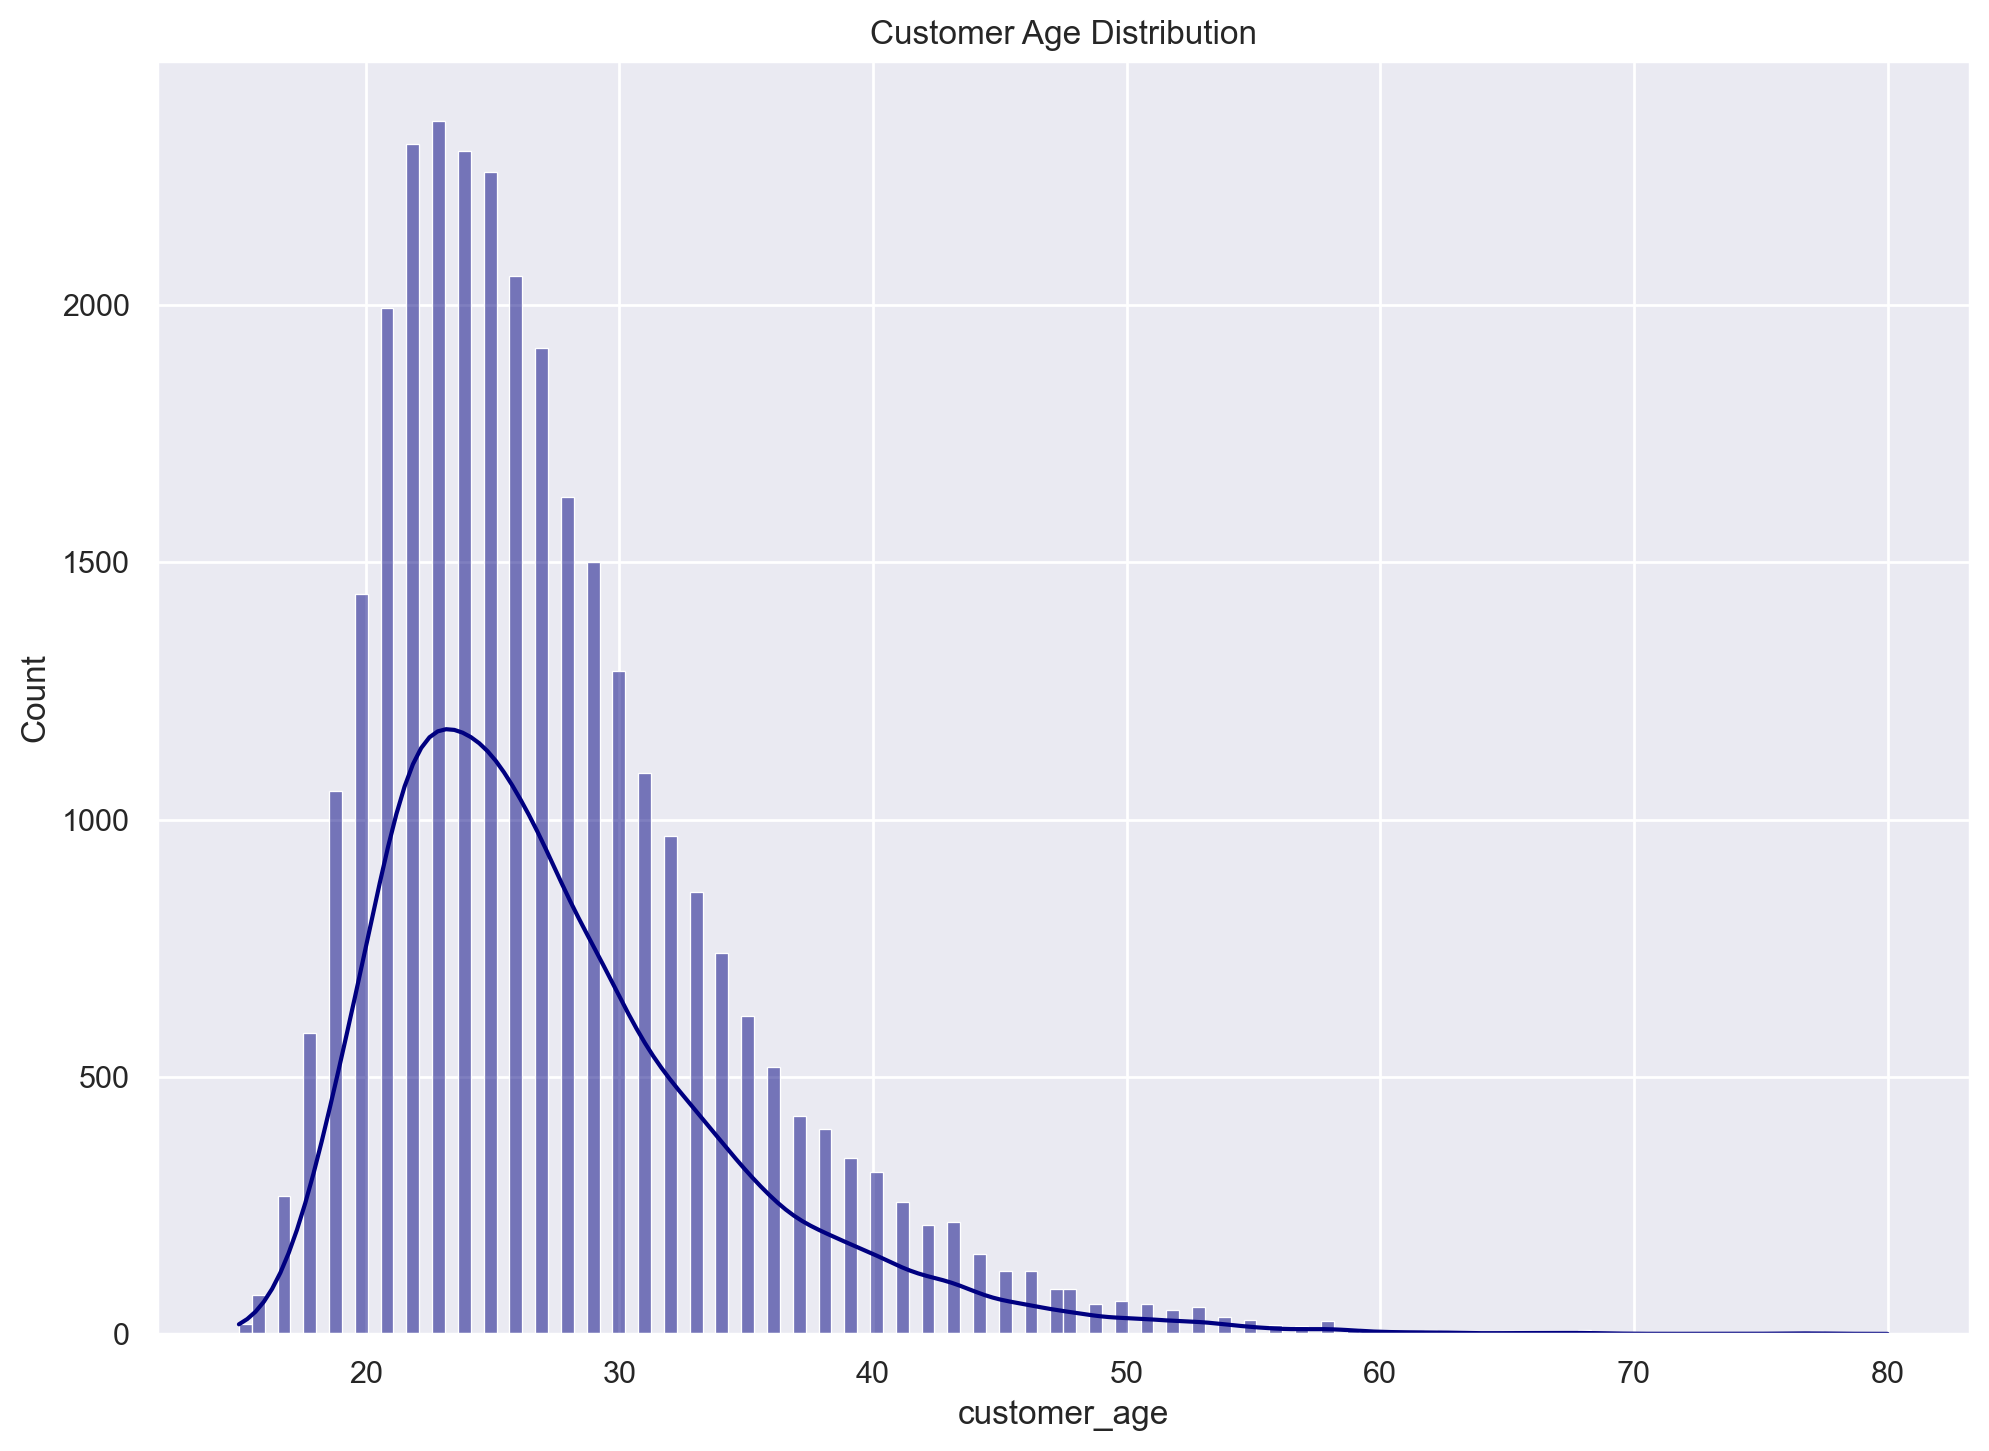

In [63]:
sns.histplot(df['customer_age'], kde=True, color = "#000080")
plt.title('Customer Age Distribution')
plt.show()


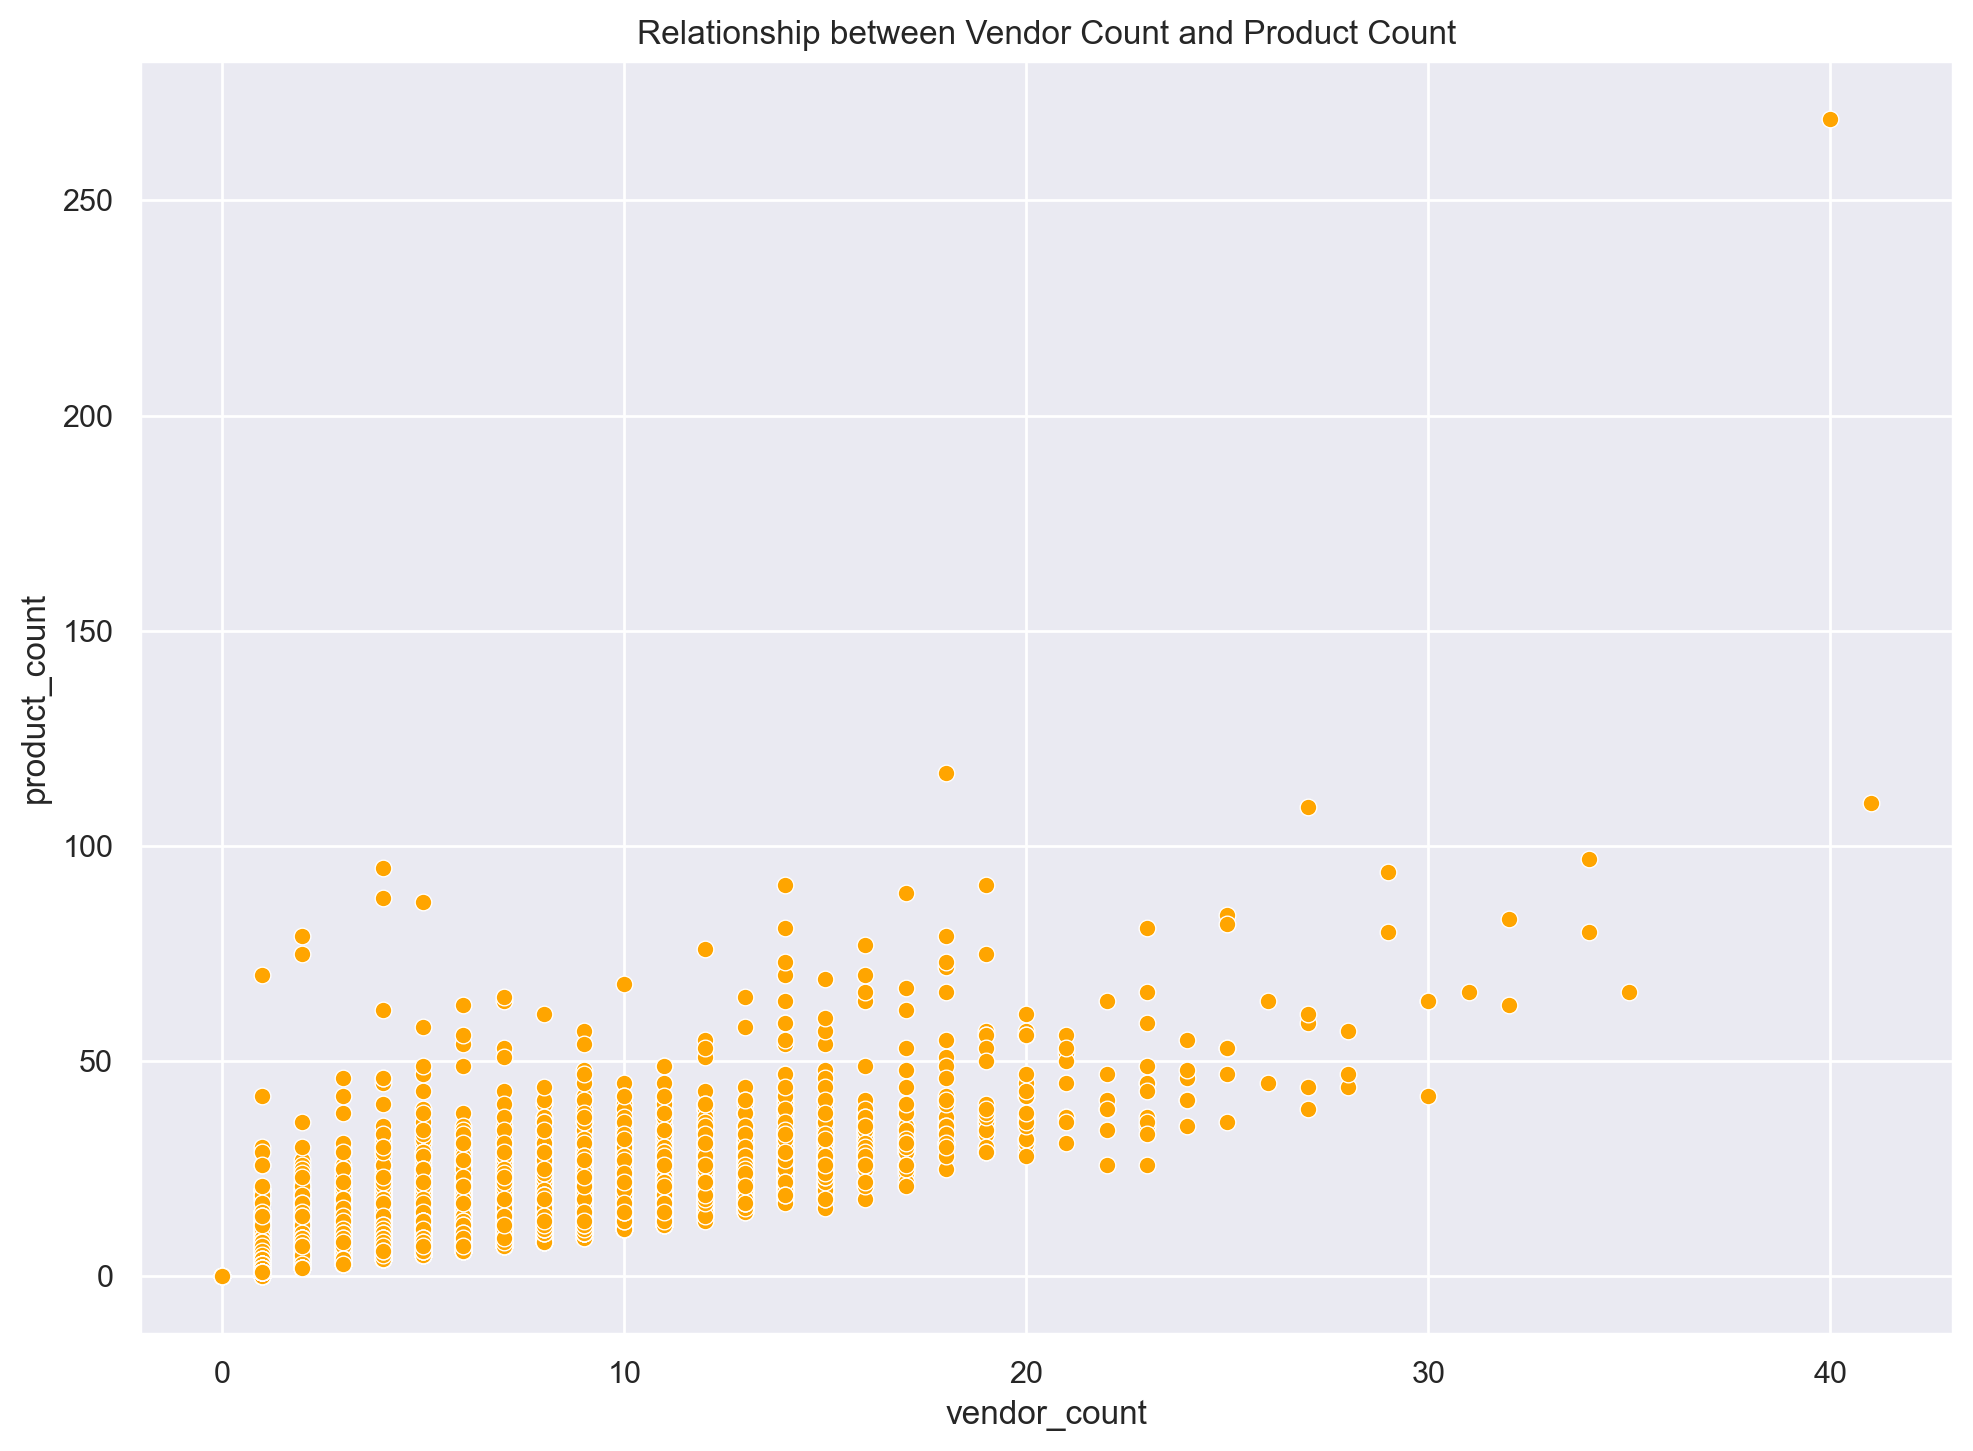

In [64]:
sns.scatterplot(x='vendor_count', y='product_count', data=df, color='orange')
plt.title('Relationship between Vendor Count and Product Count')
plt.show()

### Exploring Day / Hour Order Patterns
* Day of The Week (number of orders per day of the week):

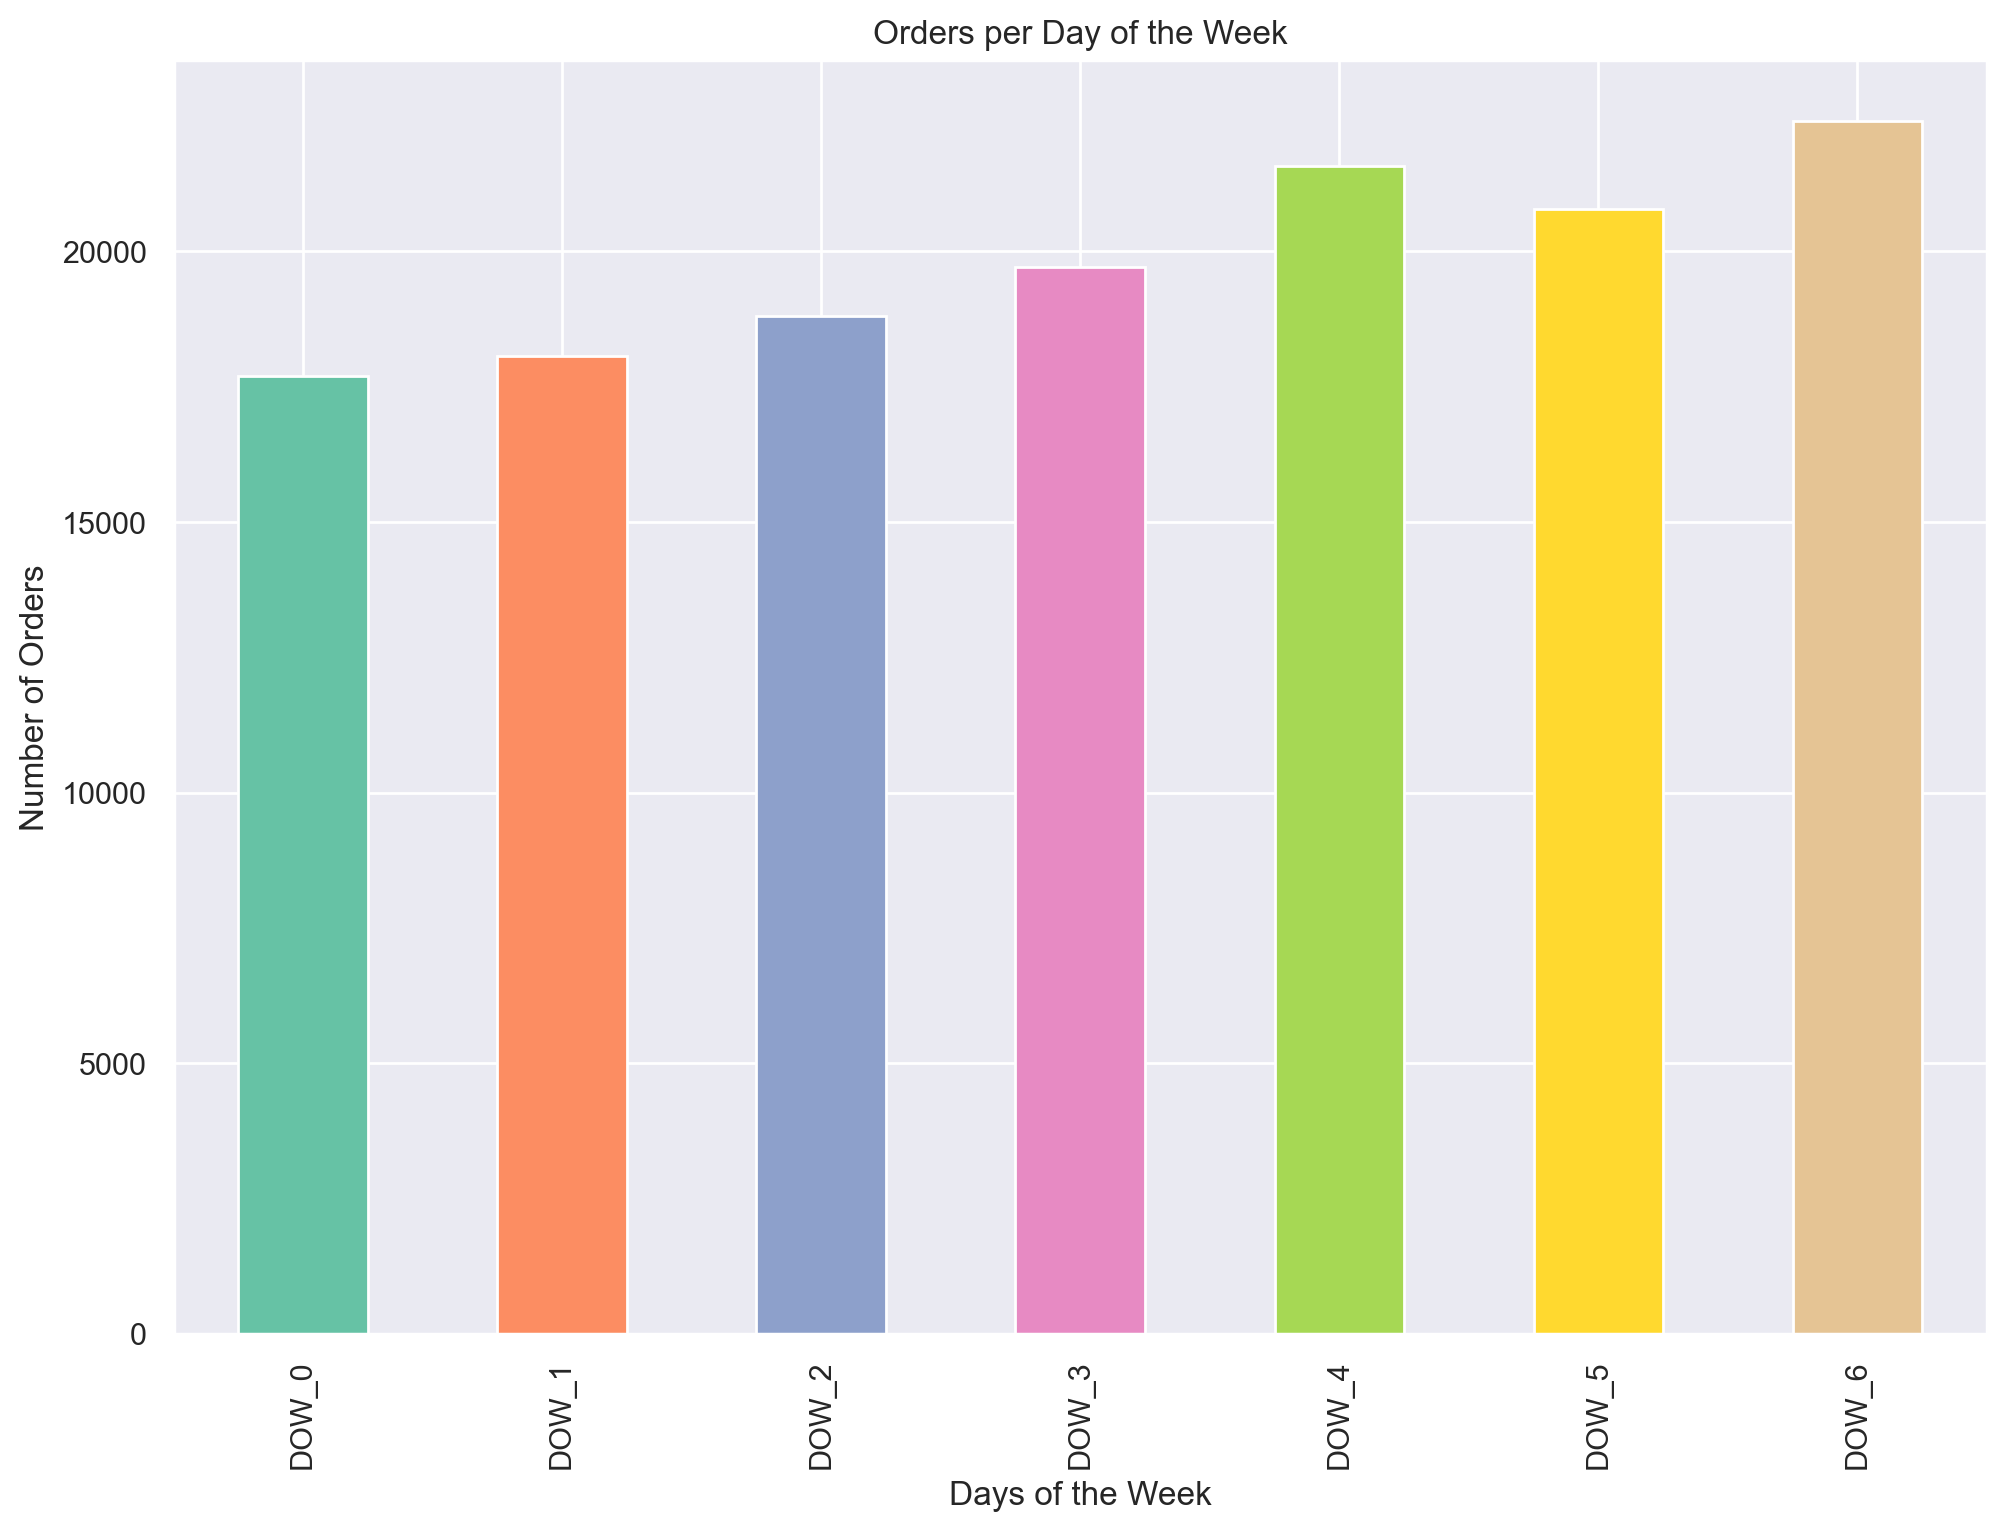

In [65]:
colors = sns.color_palette("Set2", n_colors=len(dow_columns))
df[dow_columns].sum().plot(kind='bar', title='Orders per Day of the Week', color=colors)
plt.xlabel('Days of the Week')  
plt.ylabel('Number of Orders') 
plt.show()

* Hour of The Day Analysis:

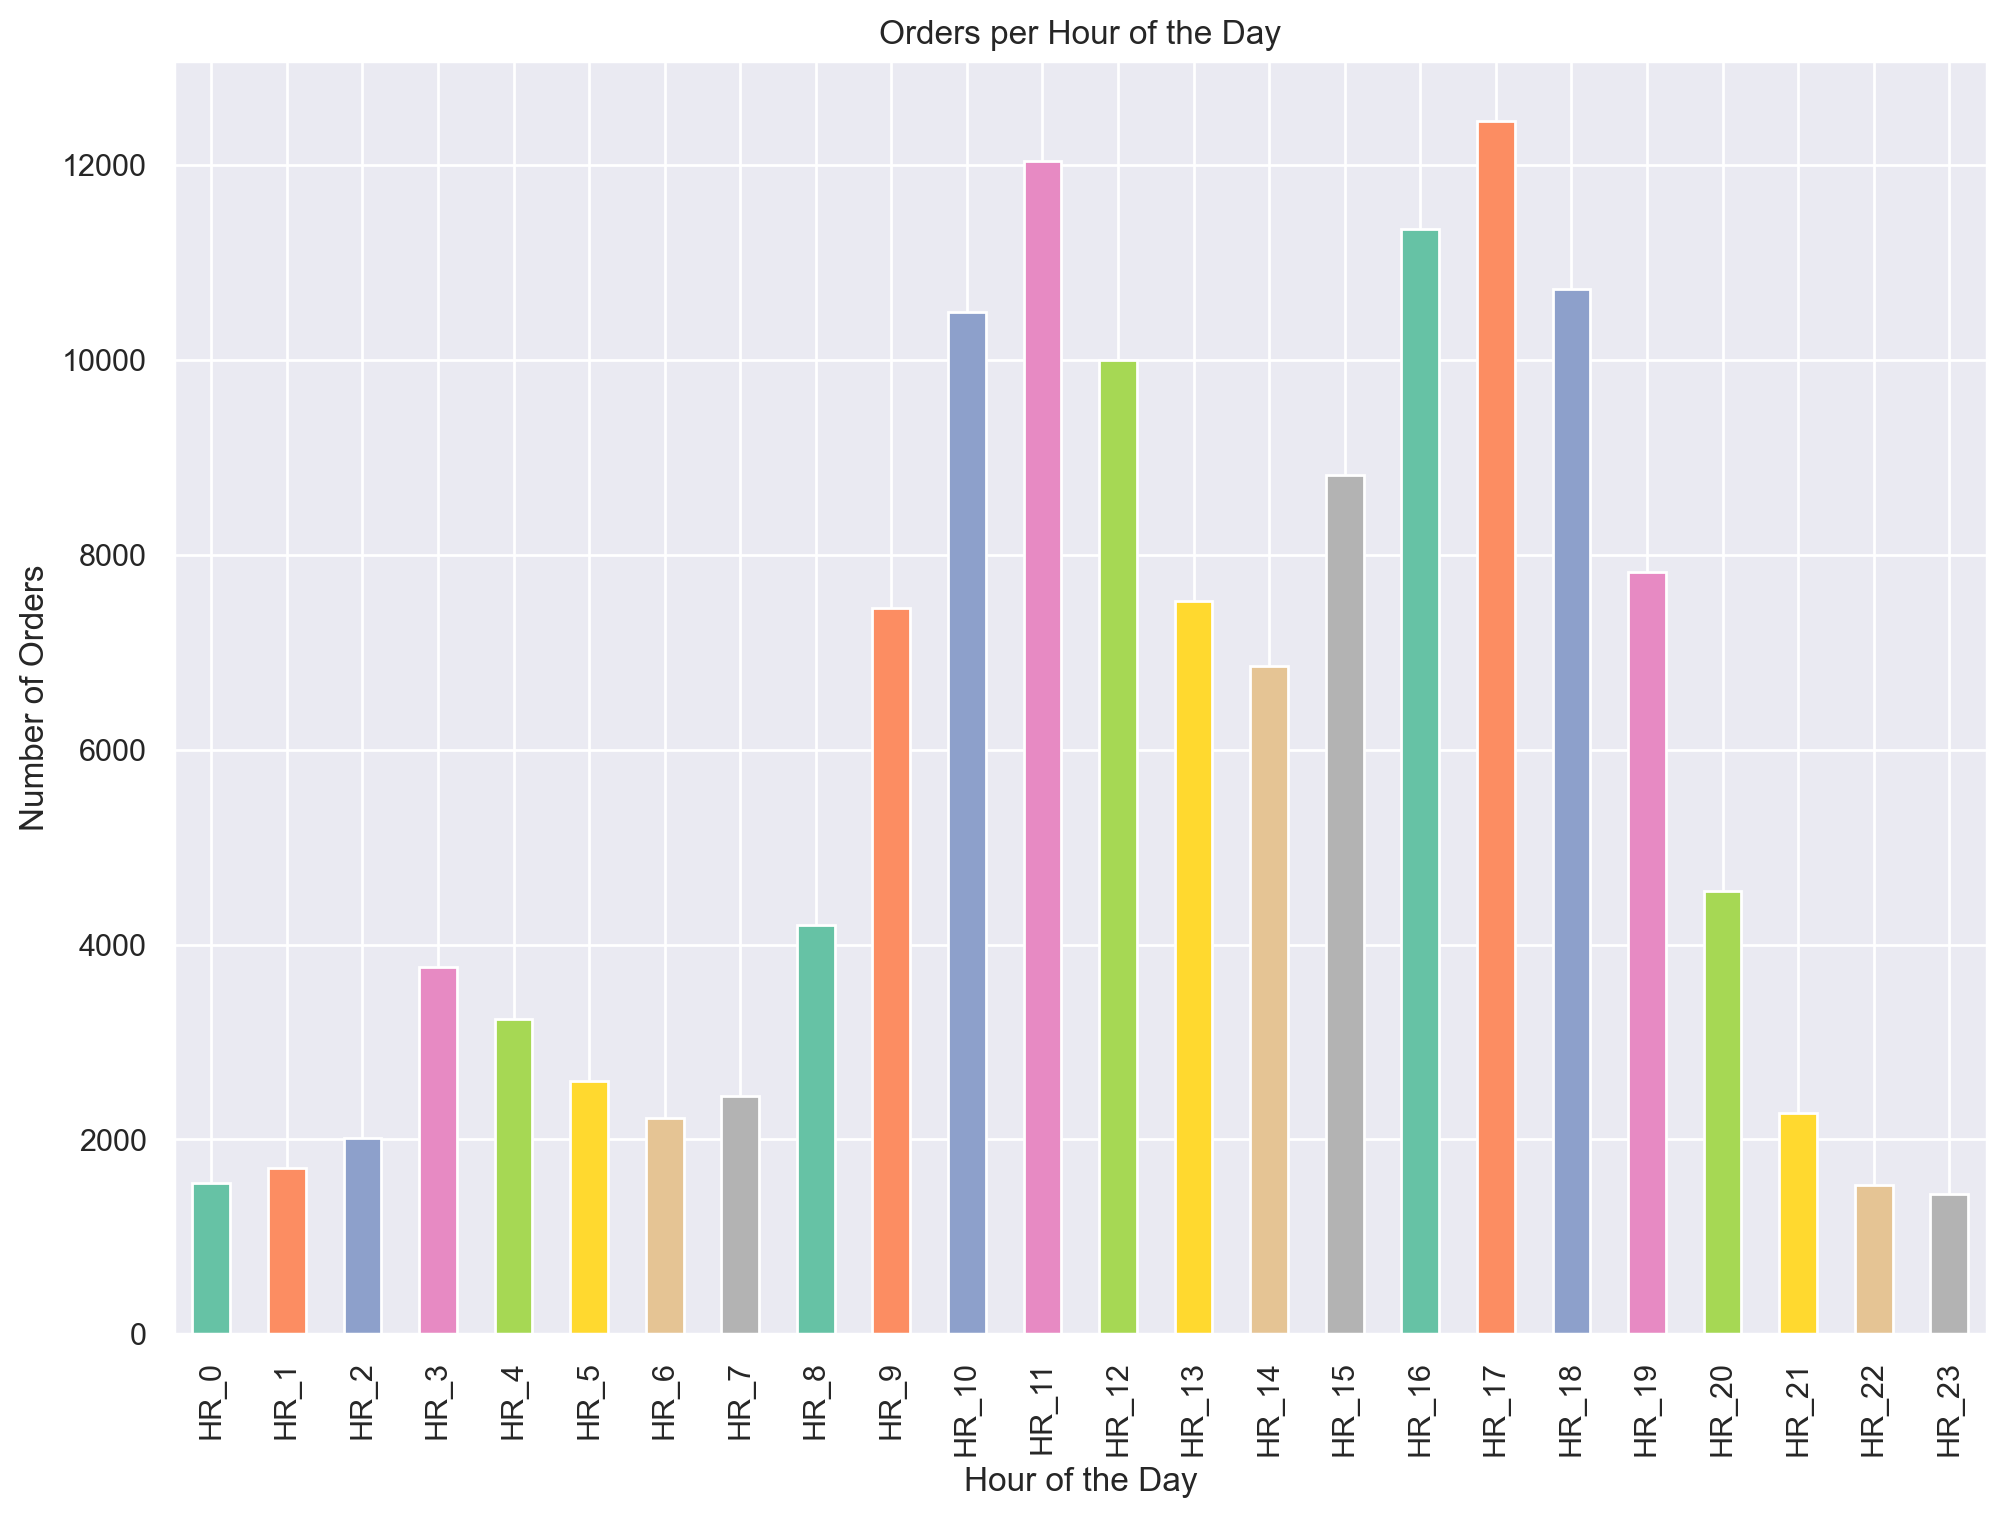

In [66]:
colors = sns.color_palette("Set2", n_colors=len(hr_columns))
df[hr_columns].sum().plot(kind='bar', title='Orders per Hour of the Day', color=colors)
plt.xlabel('Hour of the Day')  
plt.ylabel('Number of Orders')
plt.show()

## Categorical Variables' Absolute Frequencies

* Customer Region

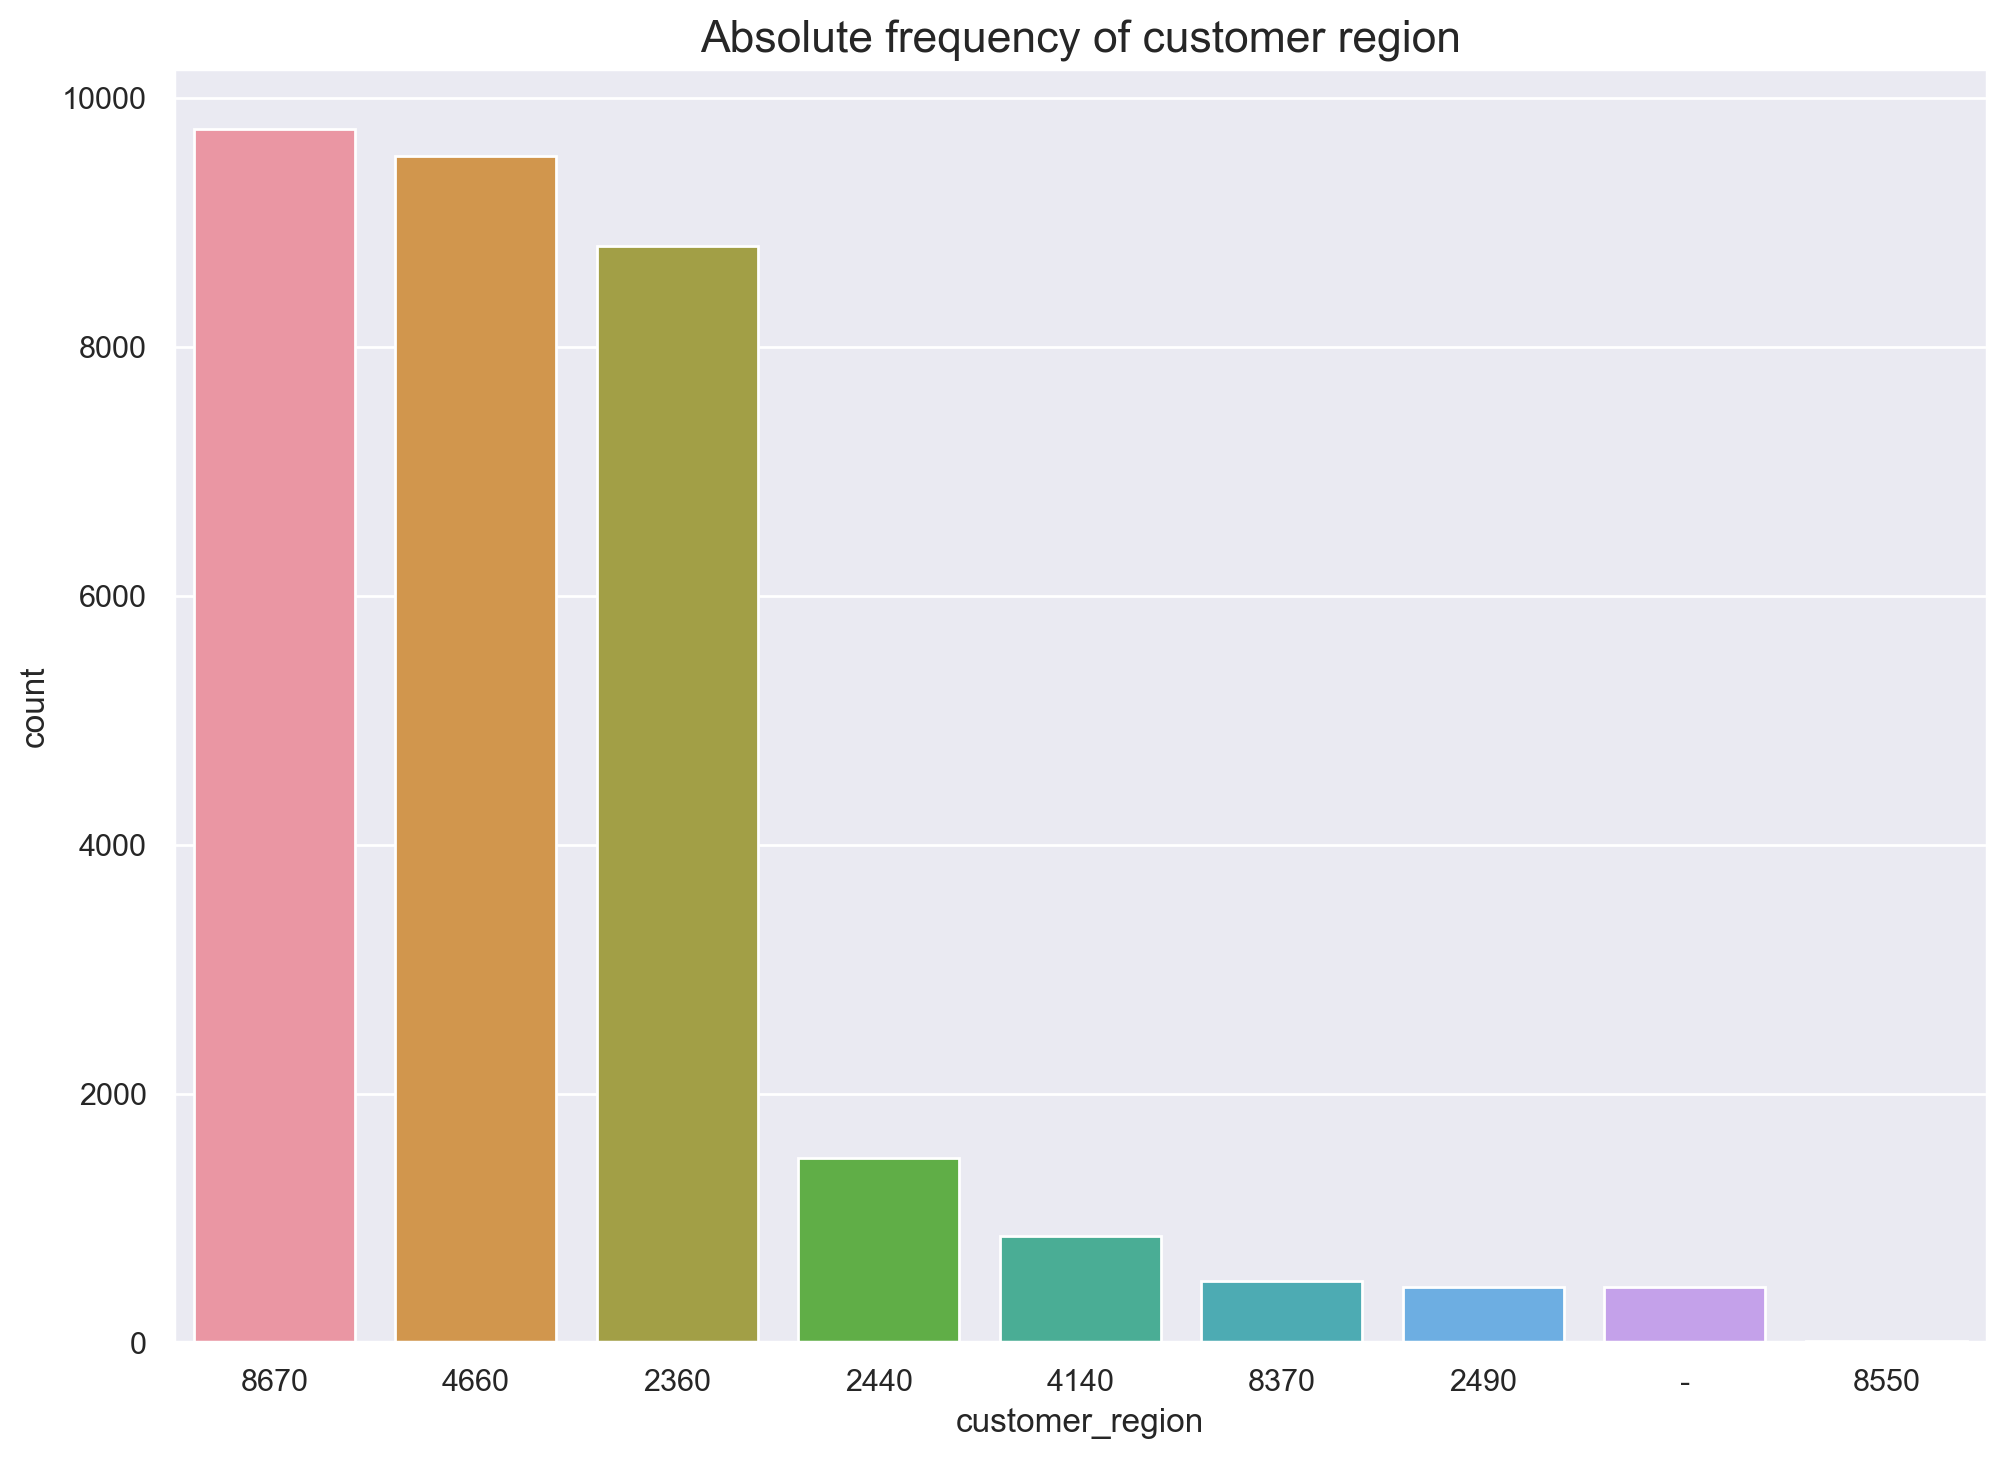

In [67]:
ordering = df["customer_region"].value_counts().index
sns.countplot(x=df["customer_region"], order = ordering)
plt.title("Absolute frequency of customer region", size = 16)
plt.show()

* Last Promotion

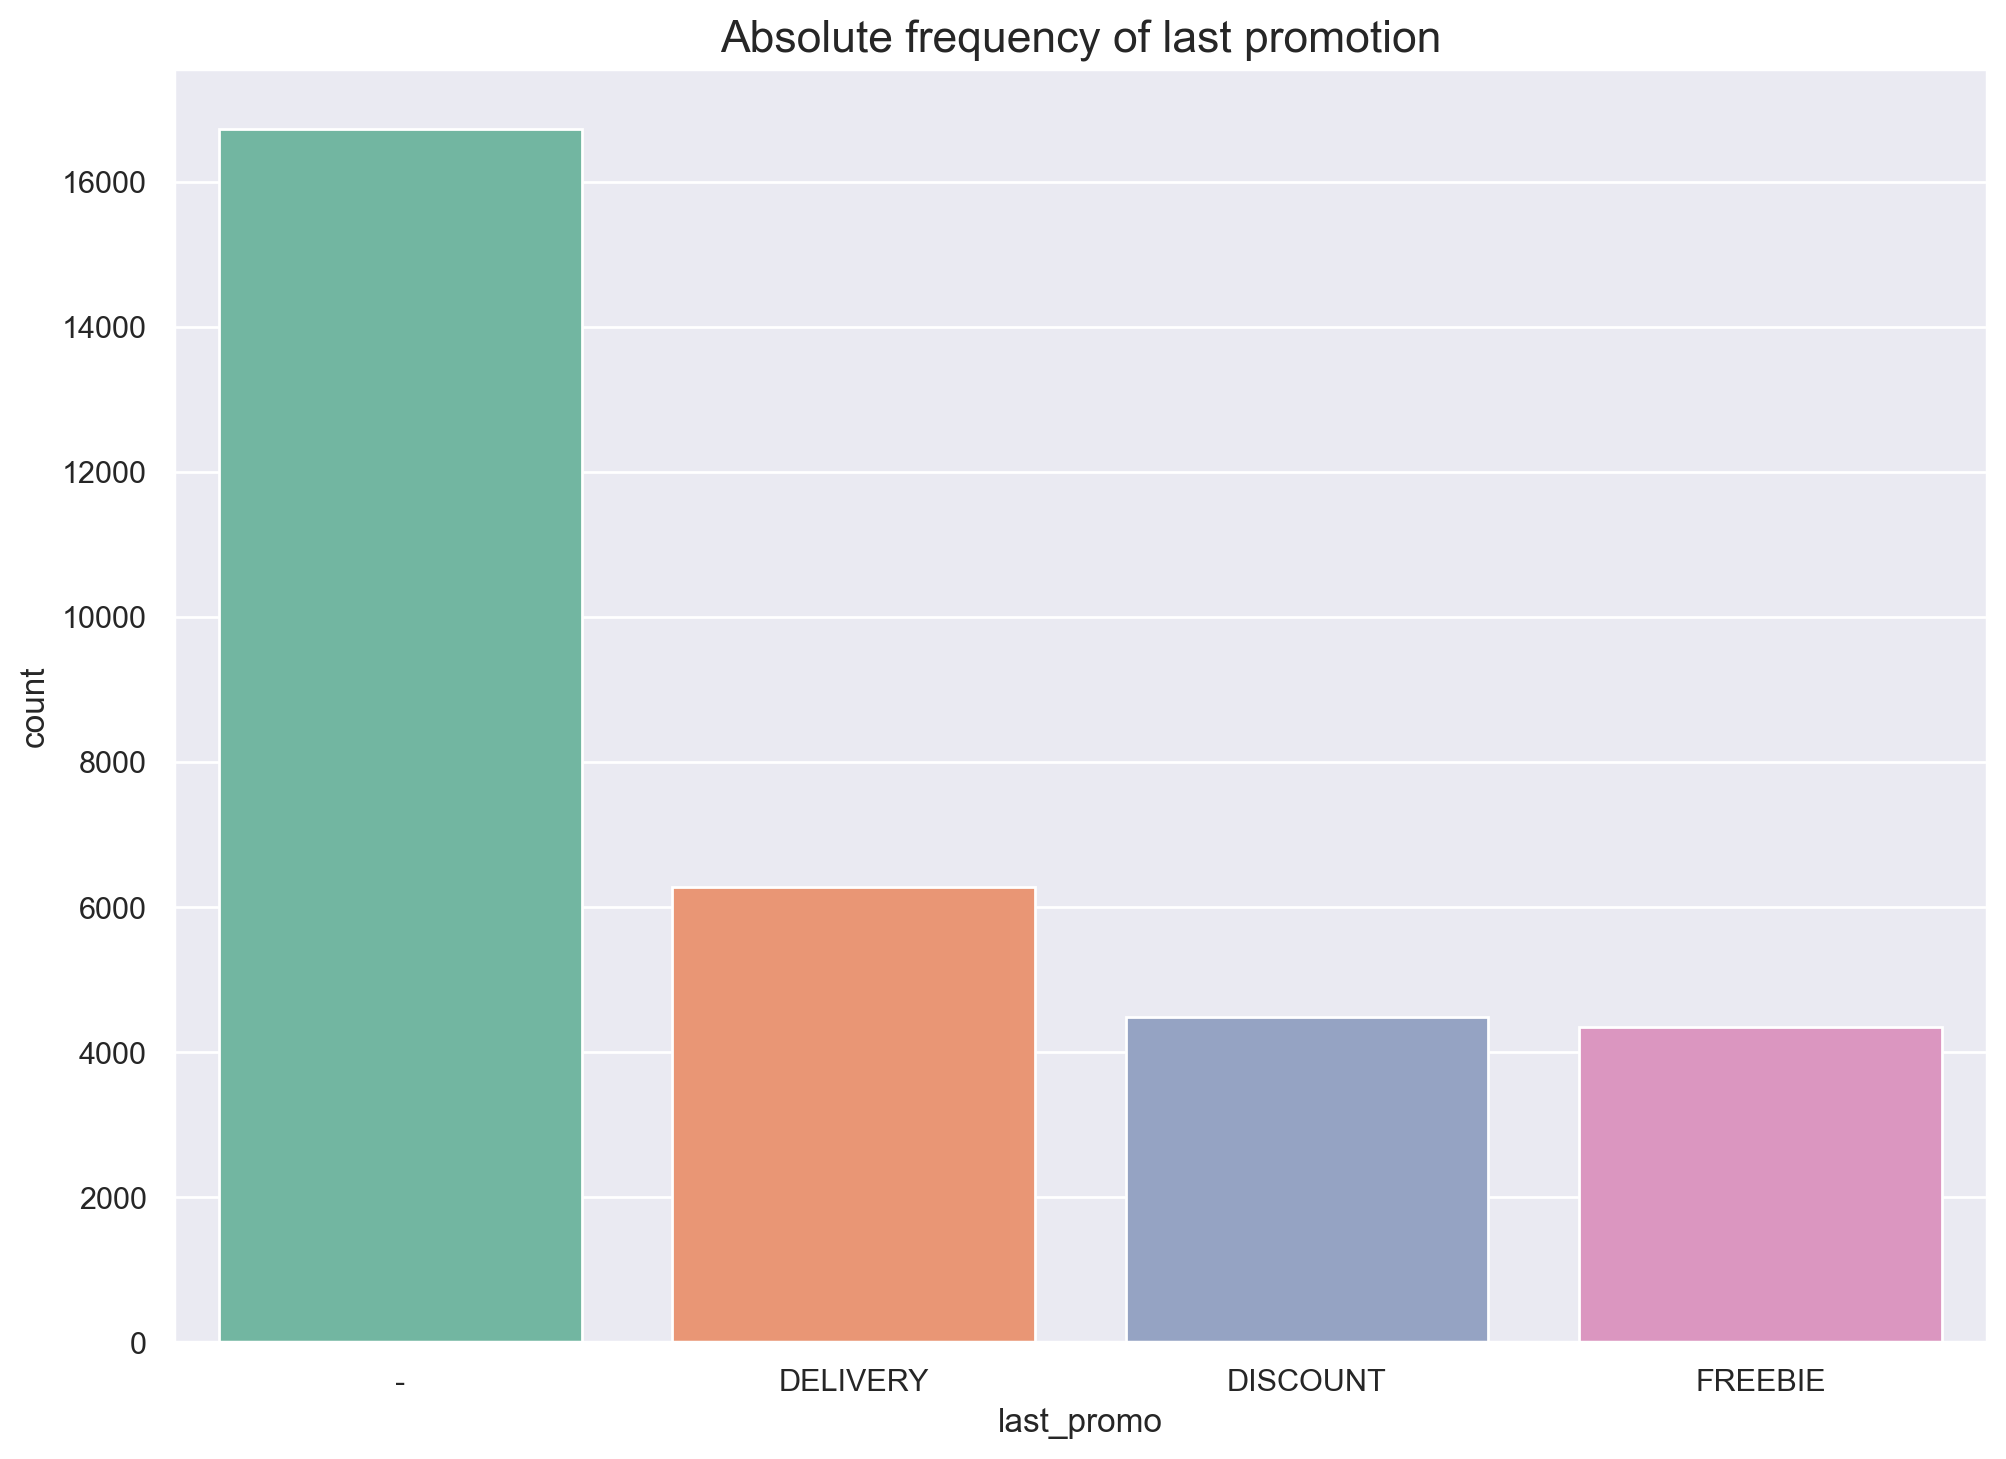

In [68]:
ordering = df["last_promo"].value_counts().index
sns.countplot(x=df["last_promo"], order = ordering)
plt.title("Absolute frequency of last promotion", size = 16)
plt.show()

* Payment method

ordering = df["payment_method"].value_counts().index
sns.countplot(x=df["payment_method"], order = ordering)
plt.title("Absolute frequency of payment method", size = 16)
plt.show()

* Cuisine-related columns, can be analyzed by calculating total spending per cuisine to determine preferences:

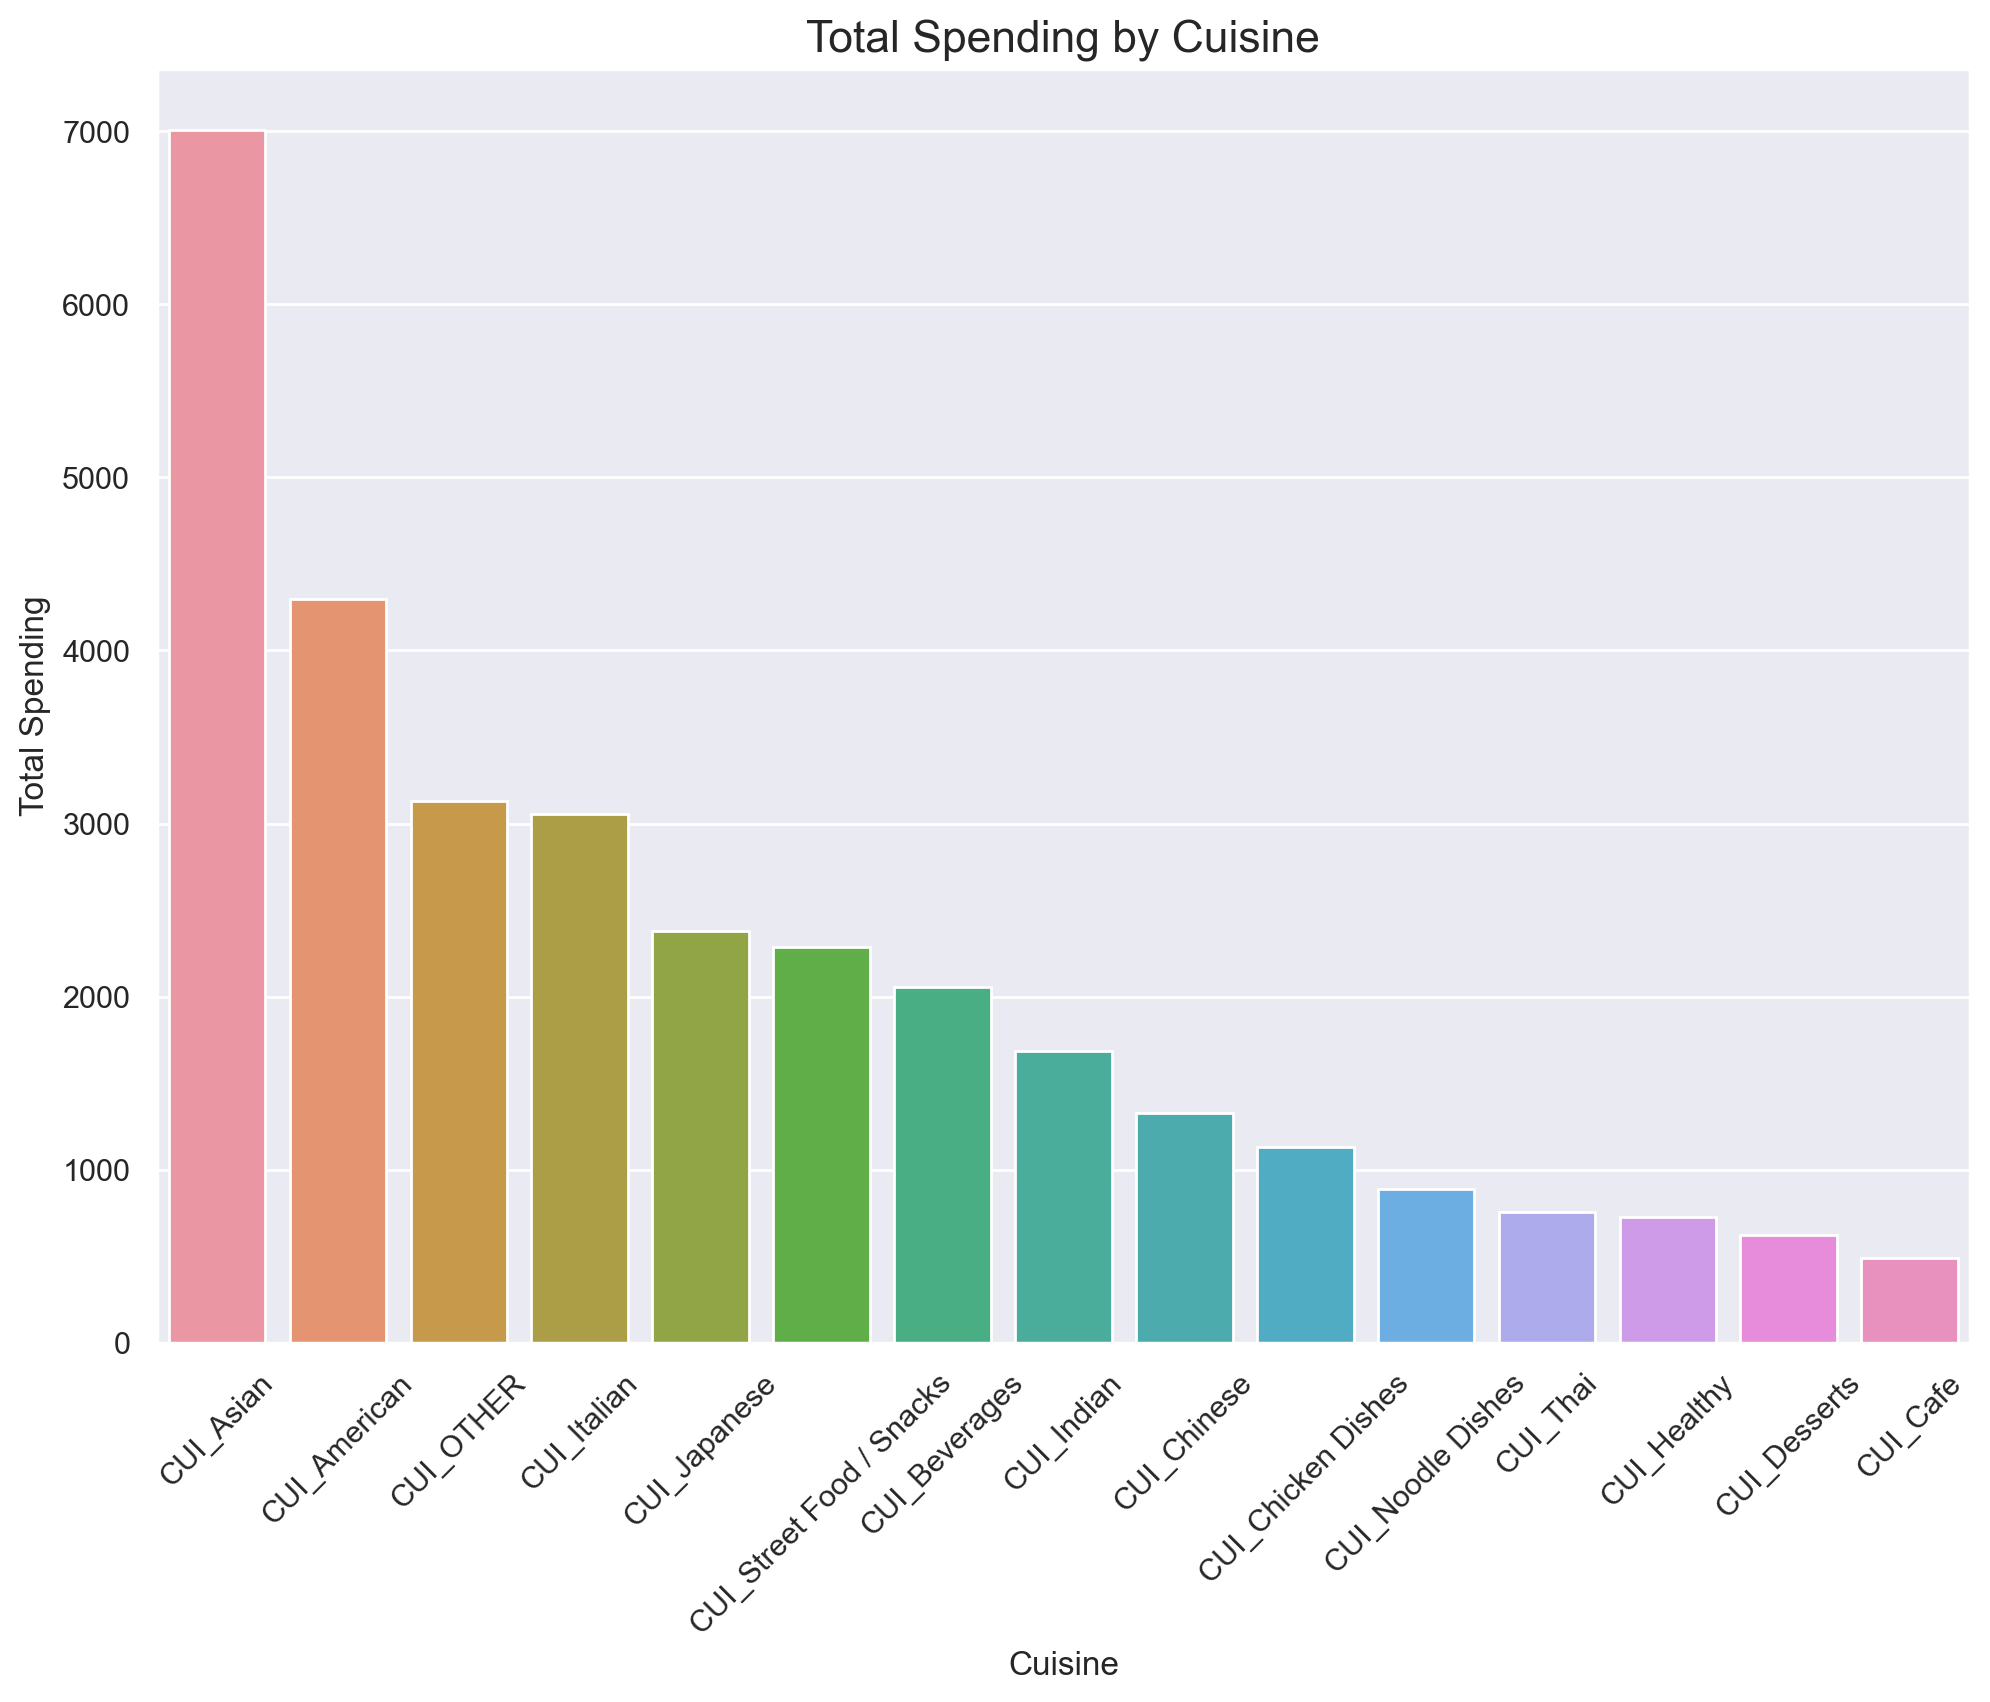

In [69]:
ordering = df["Fav_Cuisine"].value_counts().index
sns.countplot(x=df["Fav_Cuisine"], order = ordering)
plt.xticks(rotation=45)
plt.title("Total Spending by Cuisine", size = 16)
plt.ylabel('Total Spending')
plt.xlabel('Cuisine')
plt.show()

### Correlation Analysis
* Exploring relationship between numerical features:

In [70]:
numeric_df = df.select_dtypes(include=[np.number])

In [71]:
numeric_df.fillna(numeric_df.median(), inplace=True)

#### Metric Variables' Correlation Matrix

In [72]:
metric_features

['customer_age',
 'vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'Week_days',
 'Weekend_days',
 'Week_days_mean',
 'Weekend_days_mean',
 'Morning_HR',
 'Lunch_HR',
 'Afternoon',
 'Dinner_HR',
 'Night_HR',
 'Afternoon_HR',
 'Total_Spend',
 'Avg_Spend_per_Vendor',
 'Spend_per_Product',
 'Cuisine_Diversity',
 'HR_peak',
 'HR_peak_orders',
 'Customer_Duration',
 'Product_Frequency',
 'Fav_Cuisine_Concentratio

In [73]:
variables = ['vendor_count', 'first_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'Week_days', 'Weekend_days', 'Morning_HR', 'Lunch_HR', 'Afternoon', 'Dinner_HR', 'Night_HR', 'Total_Spend', 'Avg_Spend_per_Vendor', 'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Product_Frequency', 'Chain_Preference', 'Avg_Spend_per_Order', 'Fav_Cuisine_Concentration', 'Total_Orders', 'Repeat_Customer']

In [74]:
variables = ['Week_days', 'Weekend_days', 'Morning_HR', 'Lunch_HR', 'Afternoon_HR', 'Dinner_HR', 'Night_HR', 'Avg_Spend_per_Vendor', 'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Fav_Cuisine_Concentration', 'Chain_Preference', 'Order_Frequency', 'Peak_Order_Day', 'Product_Intensity', 'Repeat_Customer', 'Churn_Risk']

In [75]:
cmatrix = df[variables].corr()
cmatrix

Week_days  Weekend_days  Morning_HR  Lunch_HR  \
Week_days                   1.000000      0.585930    0.540960  0.620434   
Weekend_days                0.585930      1.000000    0.441115  0.561615   
Morning_HR                  0.540960      0.441115    1.000000  0.174950   
Lunch_HR                    0.620434      0.561615    0.174950  1.000000   
Afternoon_HR                0.623031      0.633328    0.090999  0.401979   
Dinner_HR                   0.509811      0.529103   -0.009013  0.320605   
Night_HR                    0.282284      0.267741    0.085908  0.112323   
Avg_Spend_per_Vendor        0.105075      0.081273    0.193643  0.007329   
Spend_per_Product          -0.200647     -0.210484    0.100885 -0.217680   
Cuisine_Diversity           0.650635      0.633076    0.338508  0.507059   
Customer_Duration           0.535350      0.524209    0.349021  0.377363   
Fav_Cuisine_Concentration  -0.407838     -0.411895   -0.222991 -0.313335   
Chain_Preference            0.038060      0.031960   -0.058094  0.094773   
Order_Frequency             0.066667      0.046279    0.033368  0.048538   
Peak_Order_Day             -0.234939      0.288311   -0.050524 -0.008550   
Product_Intensity           0.076863      0.060142    0.044509  0.056933   
Repeat_Customer             0.323779      0.325769    0.226116  0.226113   
Churn_Risk                 -0.269304     -0.272071   -0.195066 -0.183855   

                           Afternoon_HR  Dinner_HR  Night_HR  \
Week_days                      0.623031   0.509811  0.282284   
Weekend_days                   0.633328   0.529103  0.267741   
Morning_HR                     0.090999  -0.009013  0.085908   
Lunch_HR                       0.401979   0.320605  0.112323   
Afternoon_HR                   1.000000   0.307220  0.064476   
Dinner_HR                      0.307220   1.000000  0.182354   
Night_HR                       0.064476   0.182354  1.000000   
Avg_Spend_per_Vendor           0.109564  -0.091515 -0.022940   
Spend_per_Product             -0.203120  -0.313167 -0.128857   
Cuisine_Diversity              0.500203   0.481963  0.245636   
Customer_Duration              0.433569   0.316983  0.184793   
Fav_Cuisine_Concentration     -0.327775  -0.296010 -0.149921   
Chain_Preference              -0.008974   0.120229  0.031903   
Order_Frequency                0.034993   0.042231  0.022996   
Peak_Order_Day                 0.024124   0.031158 -0.005052   
Product_Intensity              0.042613   0.045581  0.029630   
Repeat_Customer                0.260064   0.187734  0.118809   
Churn_Risk                    -0.225945  -0.140527 -0.088308   

                           Avg_Spend_per_Vendor  Spend_per_Product  \
Week_days                              0.105075          -0.200647   
Weekend_days                           0.081273          -0.210484   
Morning_HR                             0.193643           0.100885   
Lunch_HR                               0.007329          -0.217680   
Afternoon_HR                           0.109564          -0.203120   
Dinner_HR                             -0.091515          -0.313167   
Night_HR                              -0.022940          -0.128857   
Avg_Spend_per_Vendor                   1.000000           0.547045   
Spend_per_Product                      0.547045           1.000000   
Cuisine_Diversity                     -0.168399          -0.307984   
Customer_Duration                      0.031010          -0.271659   
Fav_Cuisine_Concentration              0.234827           0.303903   
Chain_Preference                      -0.255537          -0.329138   
Order_Frequency                        0.007335           0.016720   
Peak_Order_Day                         0.013457           0.032298   
Product_Intensity                      0.087078           0.062341   
Repeat_Customer                       -0.027391          -0.295719   
Churn_Risk                            -0.038001           0.107405   

                           Cuisine

In [76]:
# Maximum correlation value for each variable
cmatrix.apply(lambda x: x.abs().sort_values(ascending=False)[1]).sort_values(ascending=False)

Product_Intensity            0.948647
Order_Frequency              0.948647
Cuisine_Diversity            0.809761
Fav_Cuisine_Concentration    0.809761
Repeat_Customer              0.801321
Customer_Duration            0.670513
Week_days                    0.650635
Weekend_days                 0.633328
Afternoon_HR                 0.633328
Lunch_HR                     0.620434
Avg_Spend_per_Vendor         0.547045
Spend_per_Product            0.547045
Morning_HR                   0.540960
Dinner_HR                    0.529103
Churn_Risk                   0.523143
Chain_Preference             0.329138
Peak_Order_Day               0.288311
Night_HR                     0.282284
dtype: float64

We can calculate last order based Days since last order and vice versa knowing the max value of last order so correlation is 1. Also we can exclude the age because correlations are very low.

In [77]:
'''
# remove Days_Since_Last_Order and customer_age columns from cmatrix on both axis
cmatrix = cmatrix.drop(['Days_Since_Last_Order', 'customer_age'], axis=0)
cmatrix = cmatrix.drop(['Days_Since_Last_Order', 'customer_age'], axis=1)
'''

"\n# remove Days_Since_Last_Order and customer_age columns from cmatrix on both axis\ncmatrix = cmatrix.drop(['Days_Since_Last_Order', 'customer_age'], axis=0)\ncmatrix = cmatrix.drop(['Days_Since_Last_Order', 'customer_age'], axis=1)\n"

In [78]:
'''
n = 10

top_n_variables = cmatrix.apply(lambda x: x.abs().sort_values(ascending=False)[1]).sort_values(ascending=False).iloc[0:n].index.tolist()
'''

'\nn = 10\n\ntop_n_variables = cmatrix.apply(lambda x: x.abs().sort_values(ascending=False)[1]).sort_values(ascending=False).iloc[0:n].index.tolist()\n'

In [79]:
'''
cor = df[top_n_variables].corr()
cor
'''

'\ncor = df[top_n_variables].corr()\ncor\n'

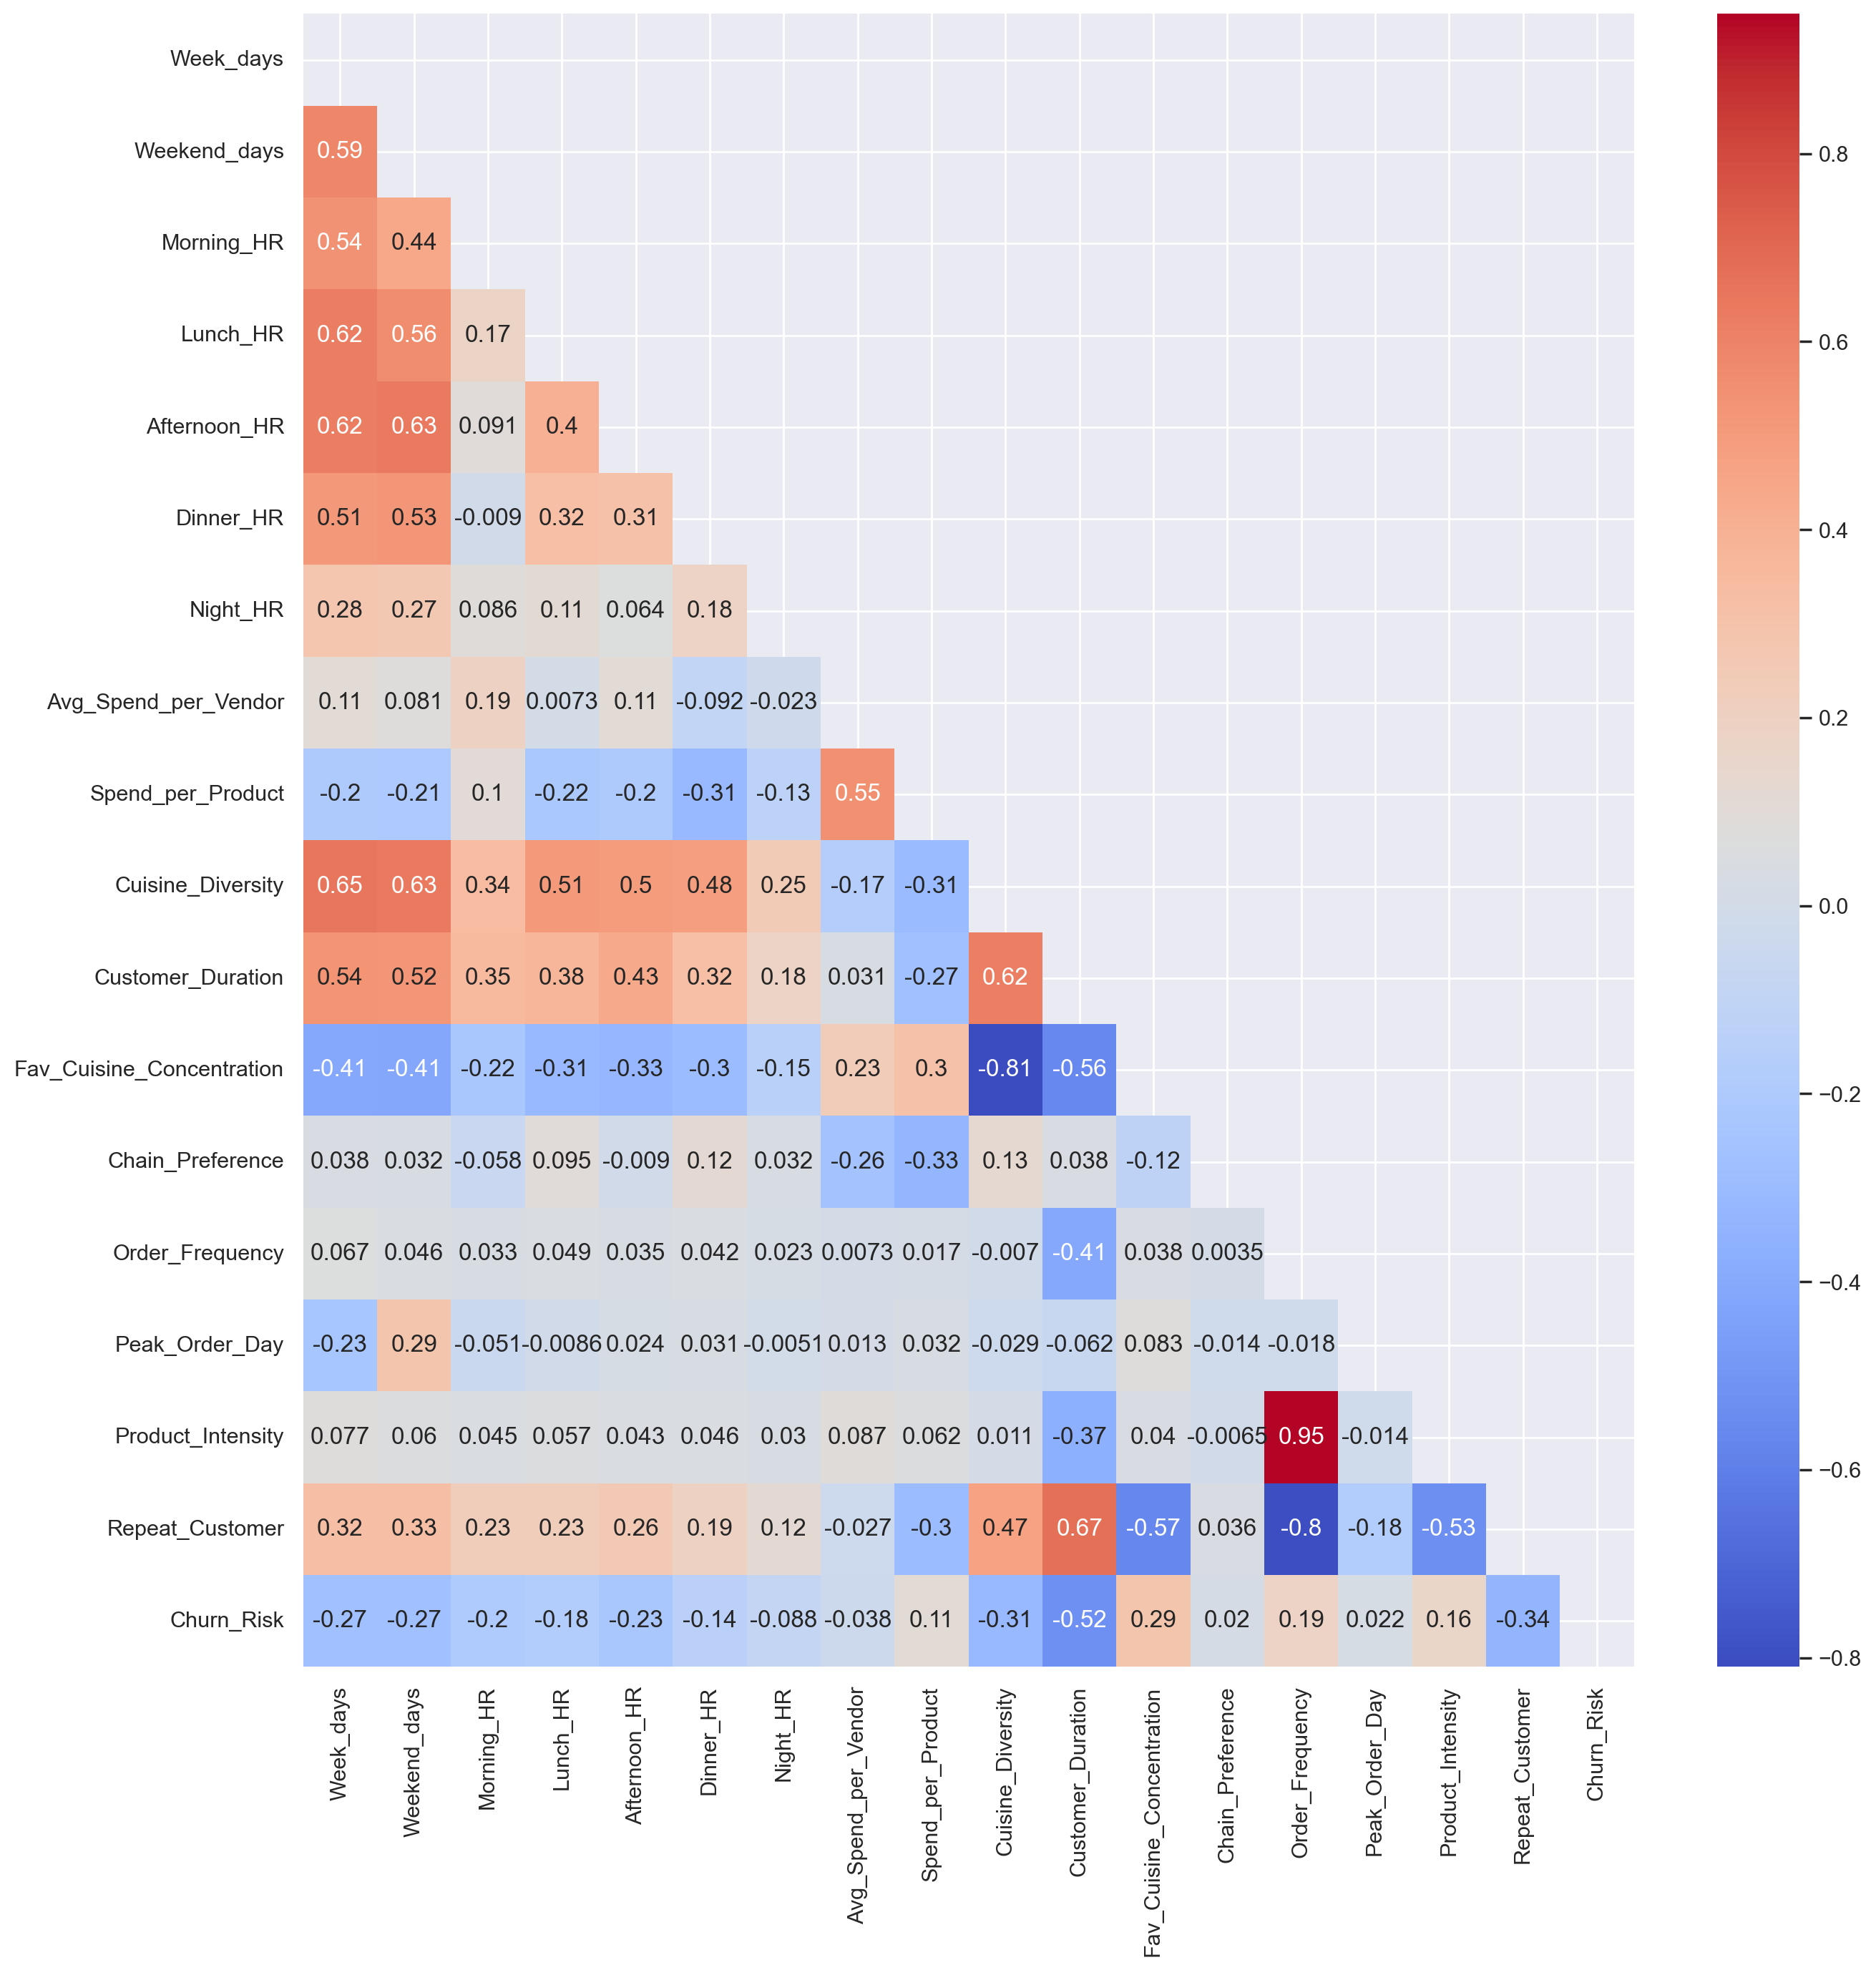

In [80]:
# heatmap with n top correlations

plt.figure(figsize=(15, 15))
sns.heatmap(cmatrix, annot=True, cmap='coolwarm', mask=np.triu(cmatrix))
plt.show()

### Comparing two categorical variables

<Axes: xlabel='customer_region'>

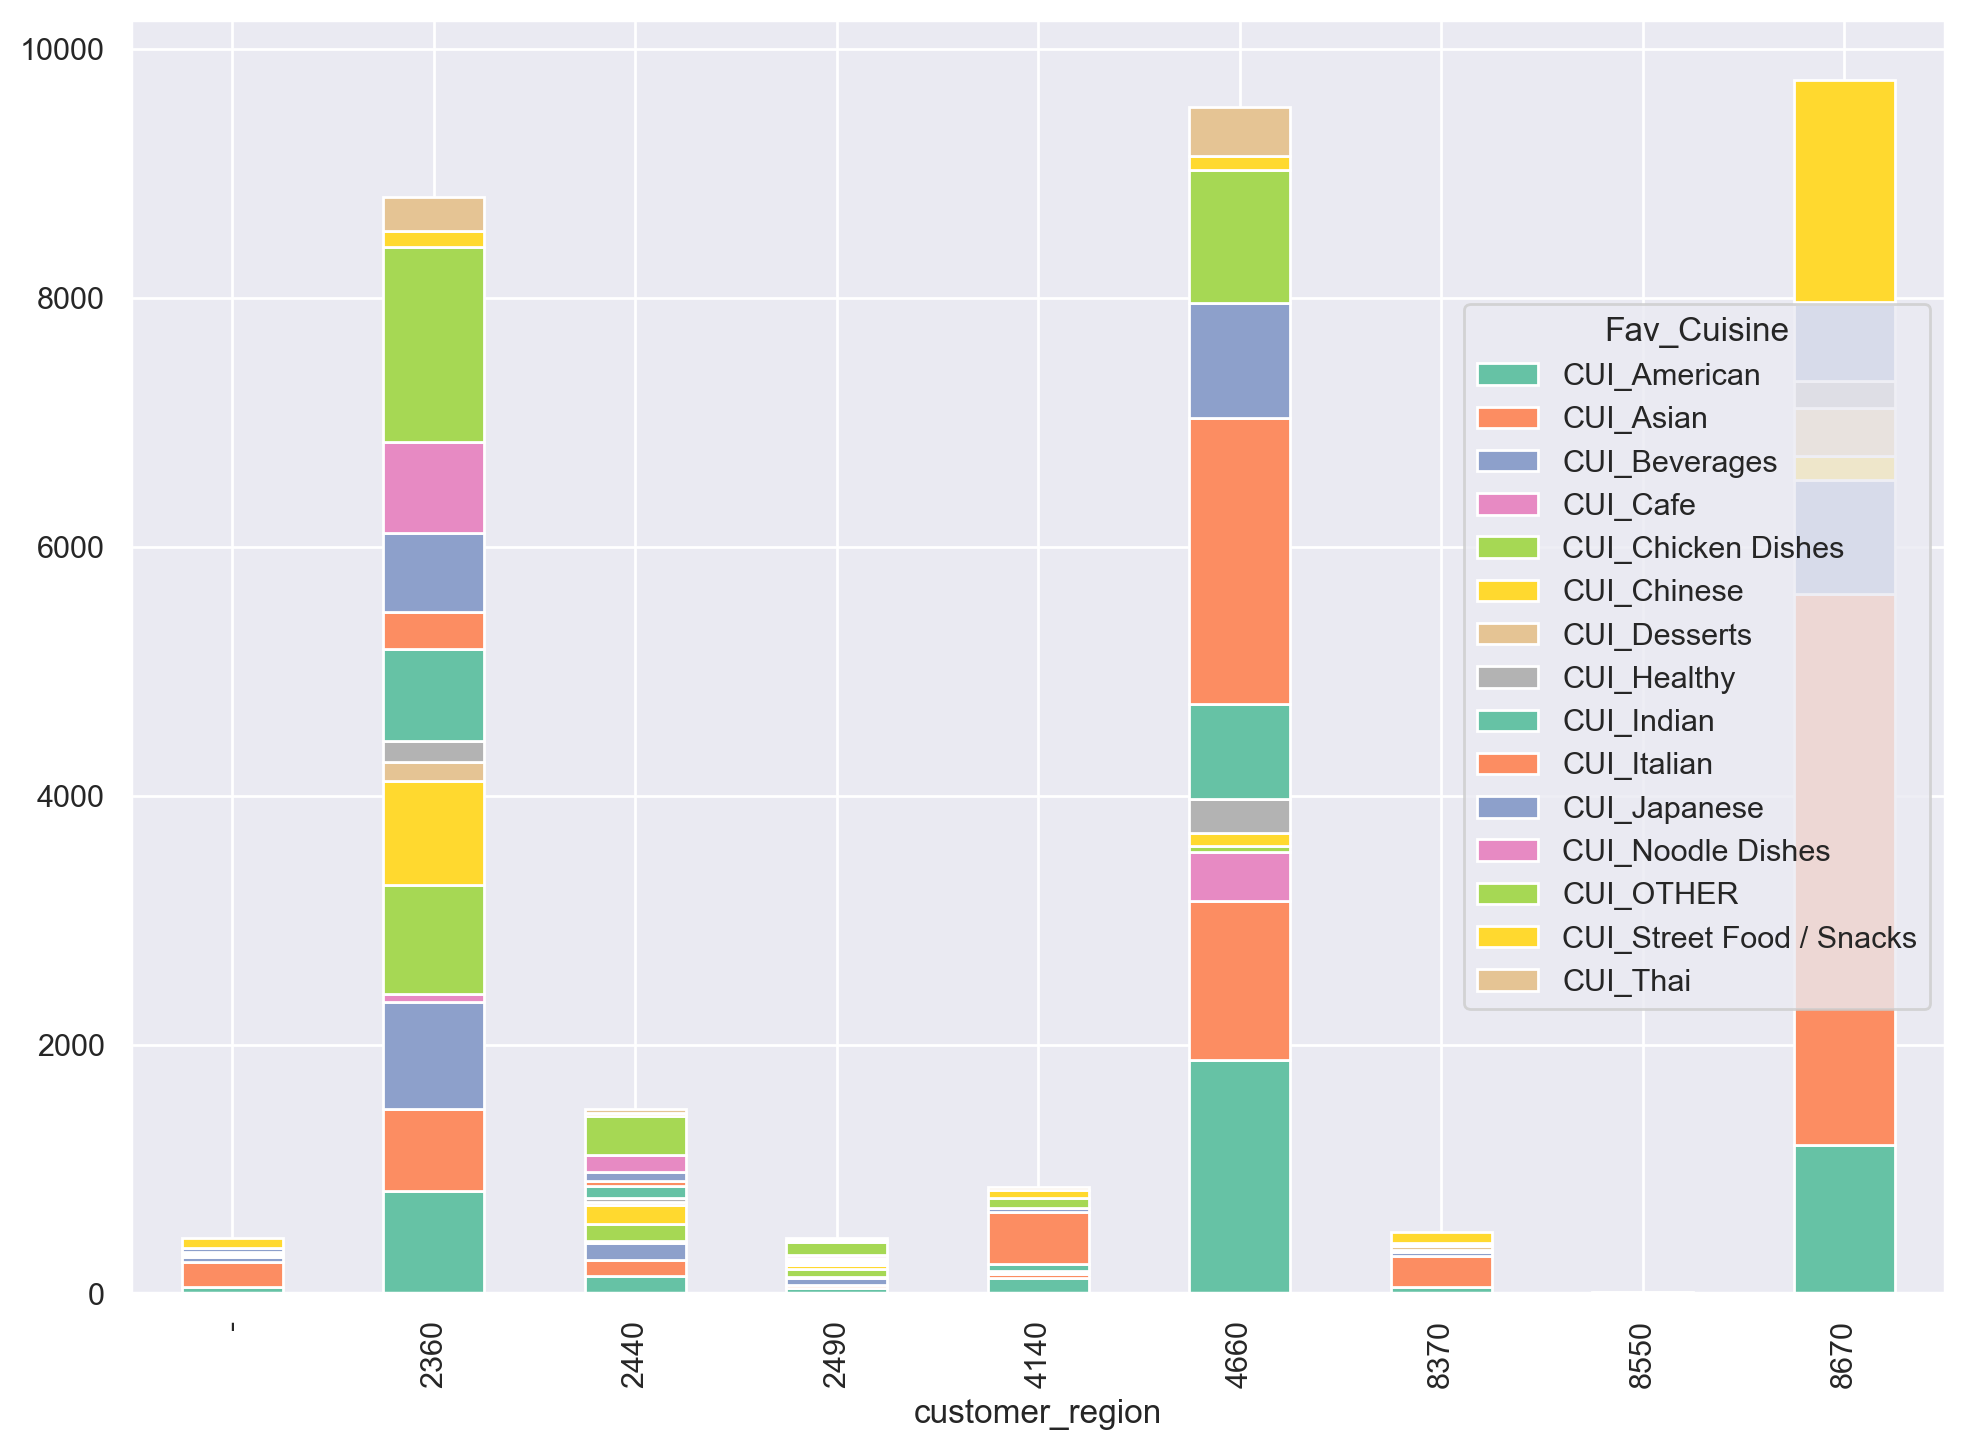

In [81]:
# see the most popular cuisine per region
df.groupby('customer_region')['Fav_Cuisine'].value_counts().unstack().plot(kind='bar', stacked=True)

### Comparing a categorical variable to a numeric one

In [82]:
variables = ['customer_age','is_chain','Week_days', 'Weekend_days','Lunch_HR','Dinner_HR', 'Total_Spend','Avg_Spend_per_Vendor',
             'Spend_per_Product', 'Cuisine_Diversity', 'Customer_Duration', 'Product_Frequency','Chain_Preference', 'Avg_Spend_per_Order']
variables

['customer_age',
 'is_chain',
 'Week_days',
 'Weekend_days',
 'Lunch_HR',
 'Dinner_HR',
 'Total_Spend',
 'Avg_Spend_per_Vendor',
 'Spend_per_Product',
 'Cuisine_Diversity',
 'Customer_Duration',
 'Product_Frequency',
 'Chain_Preference',
 'Avg_Spend_per_Order']

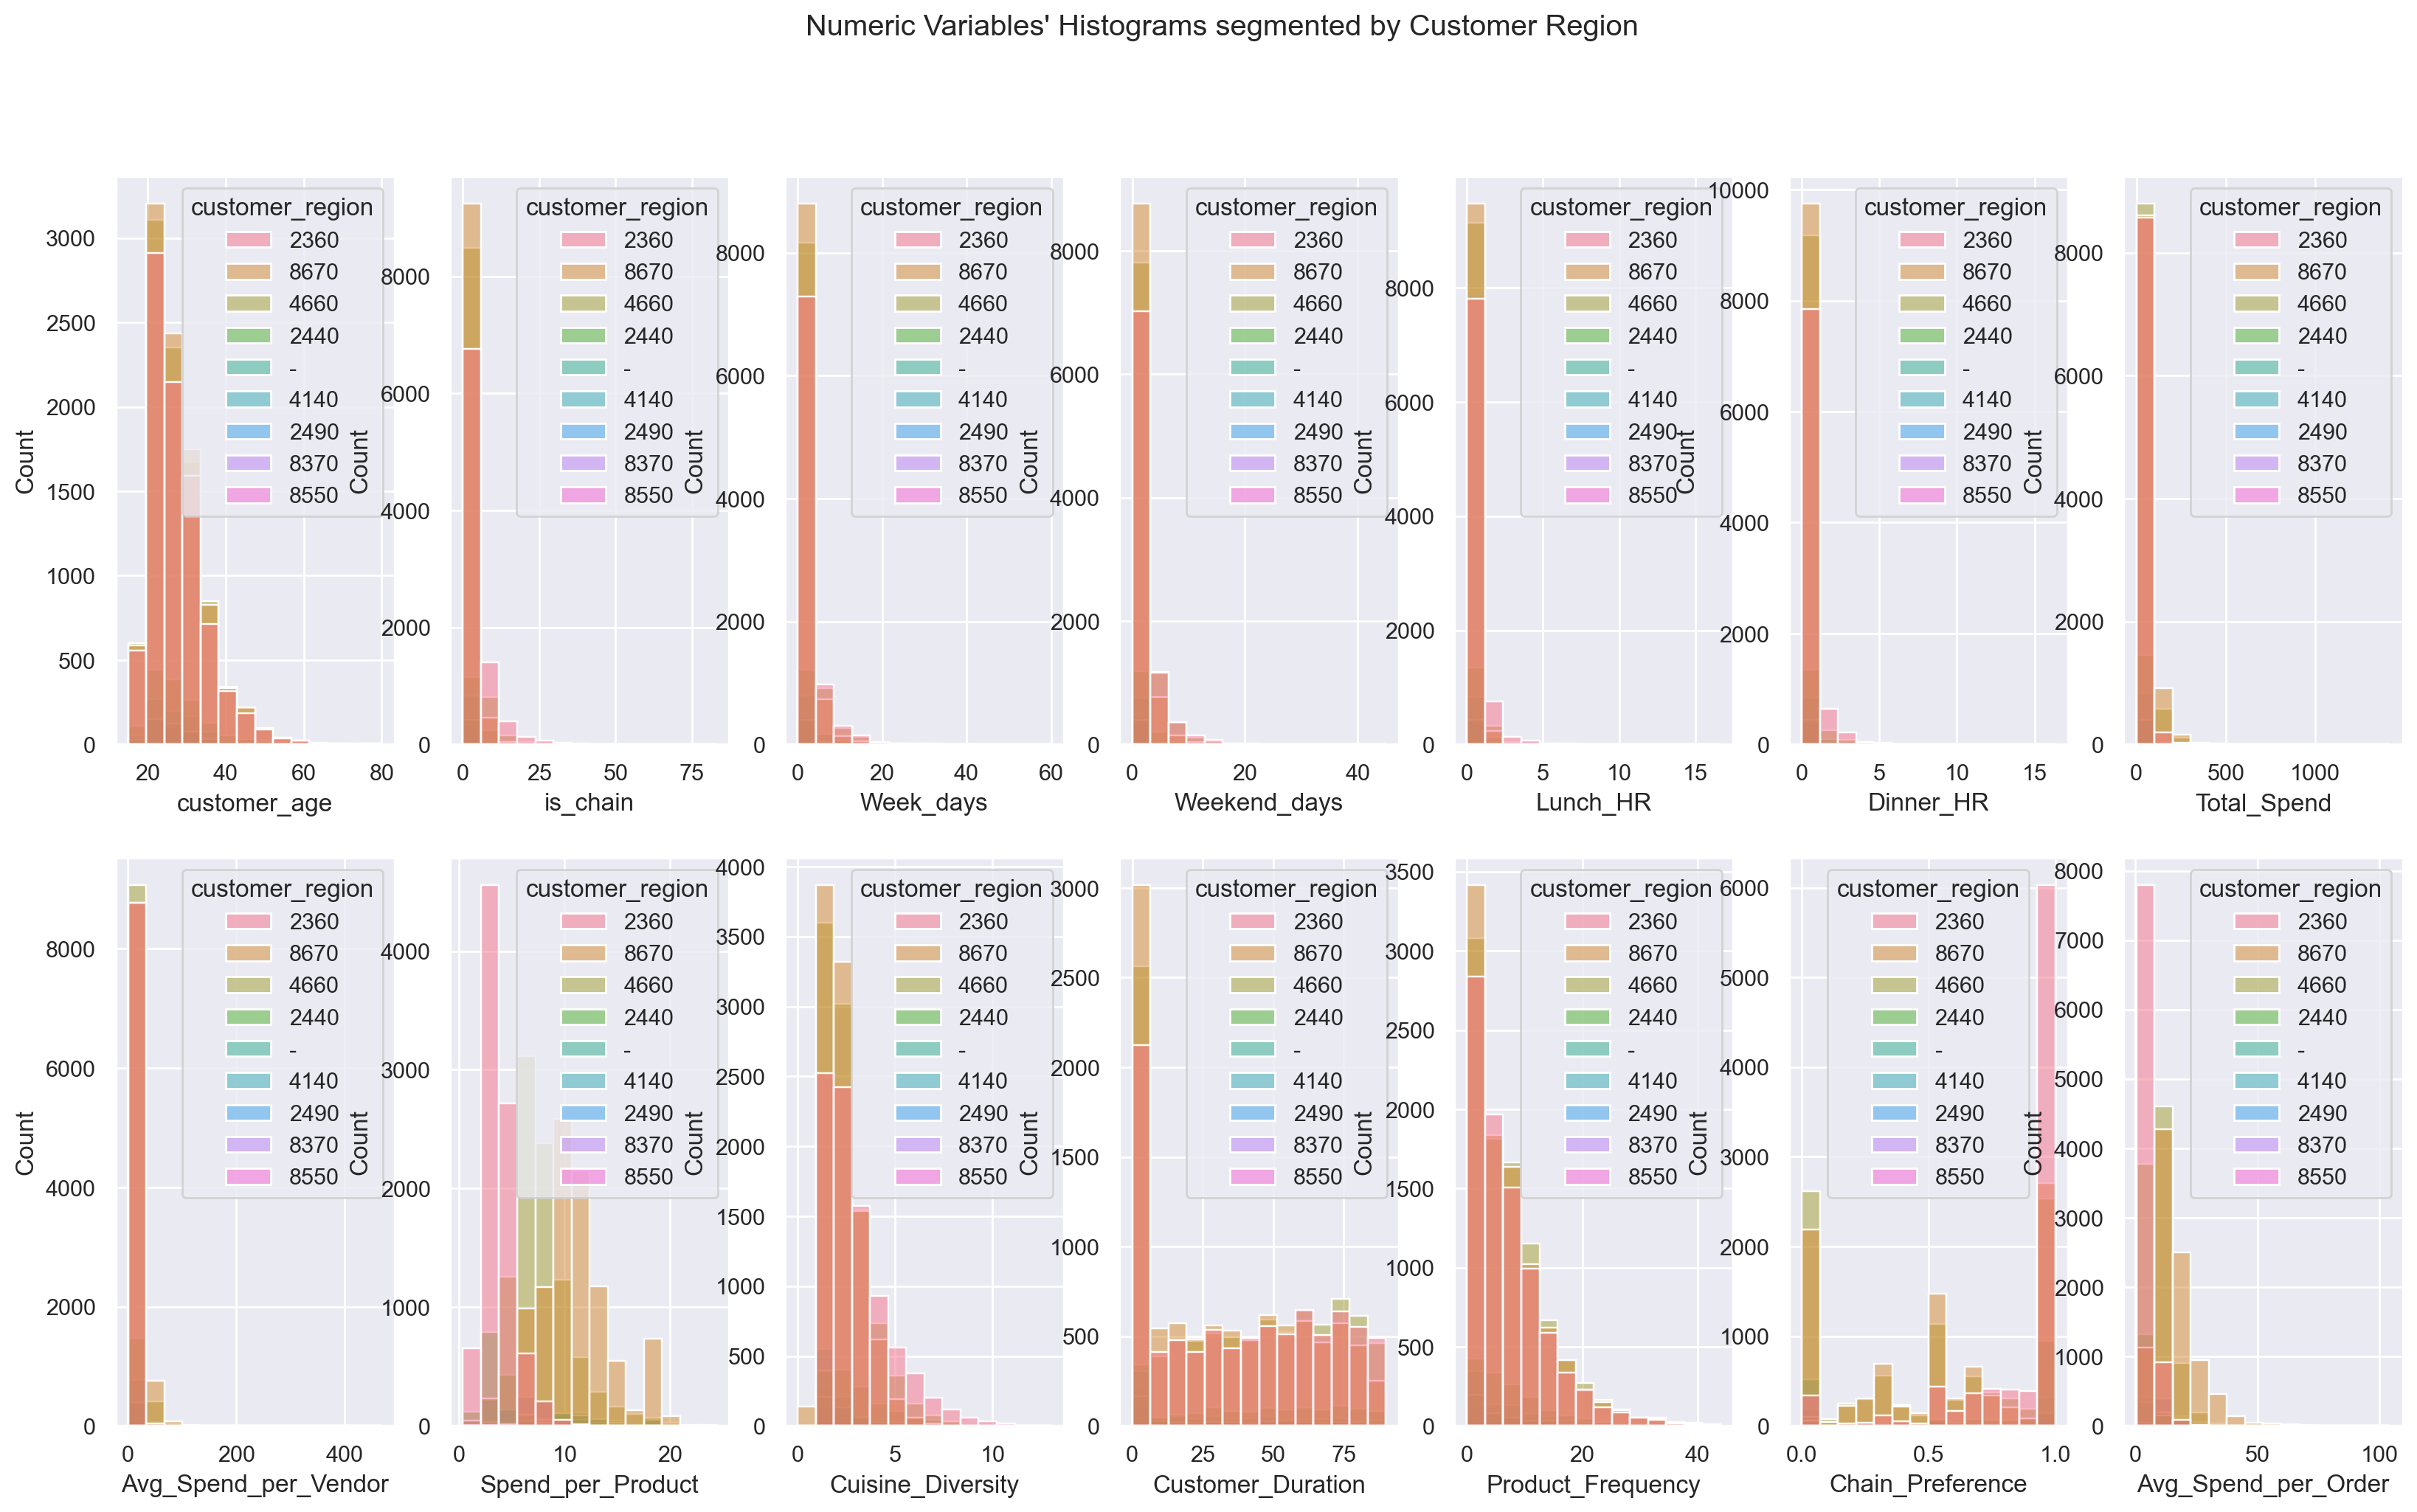

In [83]:
sp_rows = 2
sp_cols = 7


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), variables): 
    sns.histplot(df, x=feat, ax=ax, bins=14, hue='customer_region')
    
# Layout
title = "Numeric Variables' Histograms segmented by Customer Region"

plt.suptitle(title)

plt.show()

On the figure above, it's specially interisting to analyse the 1st (age) and the 9th (spend per product) graphs. A majority of our customer base is from the same region and the amount of money people spend per product also depends a lot on their region

(0.0, 500.0)

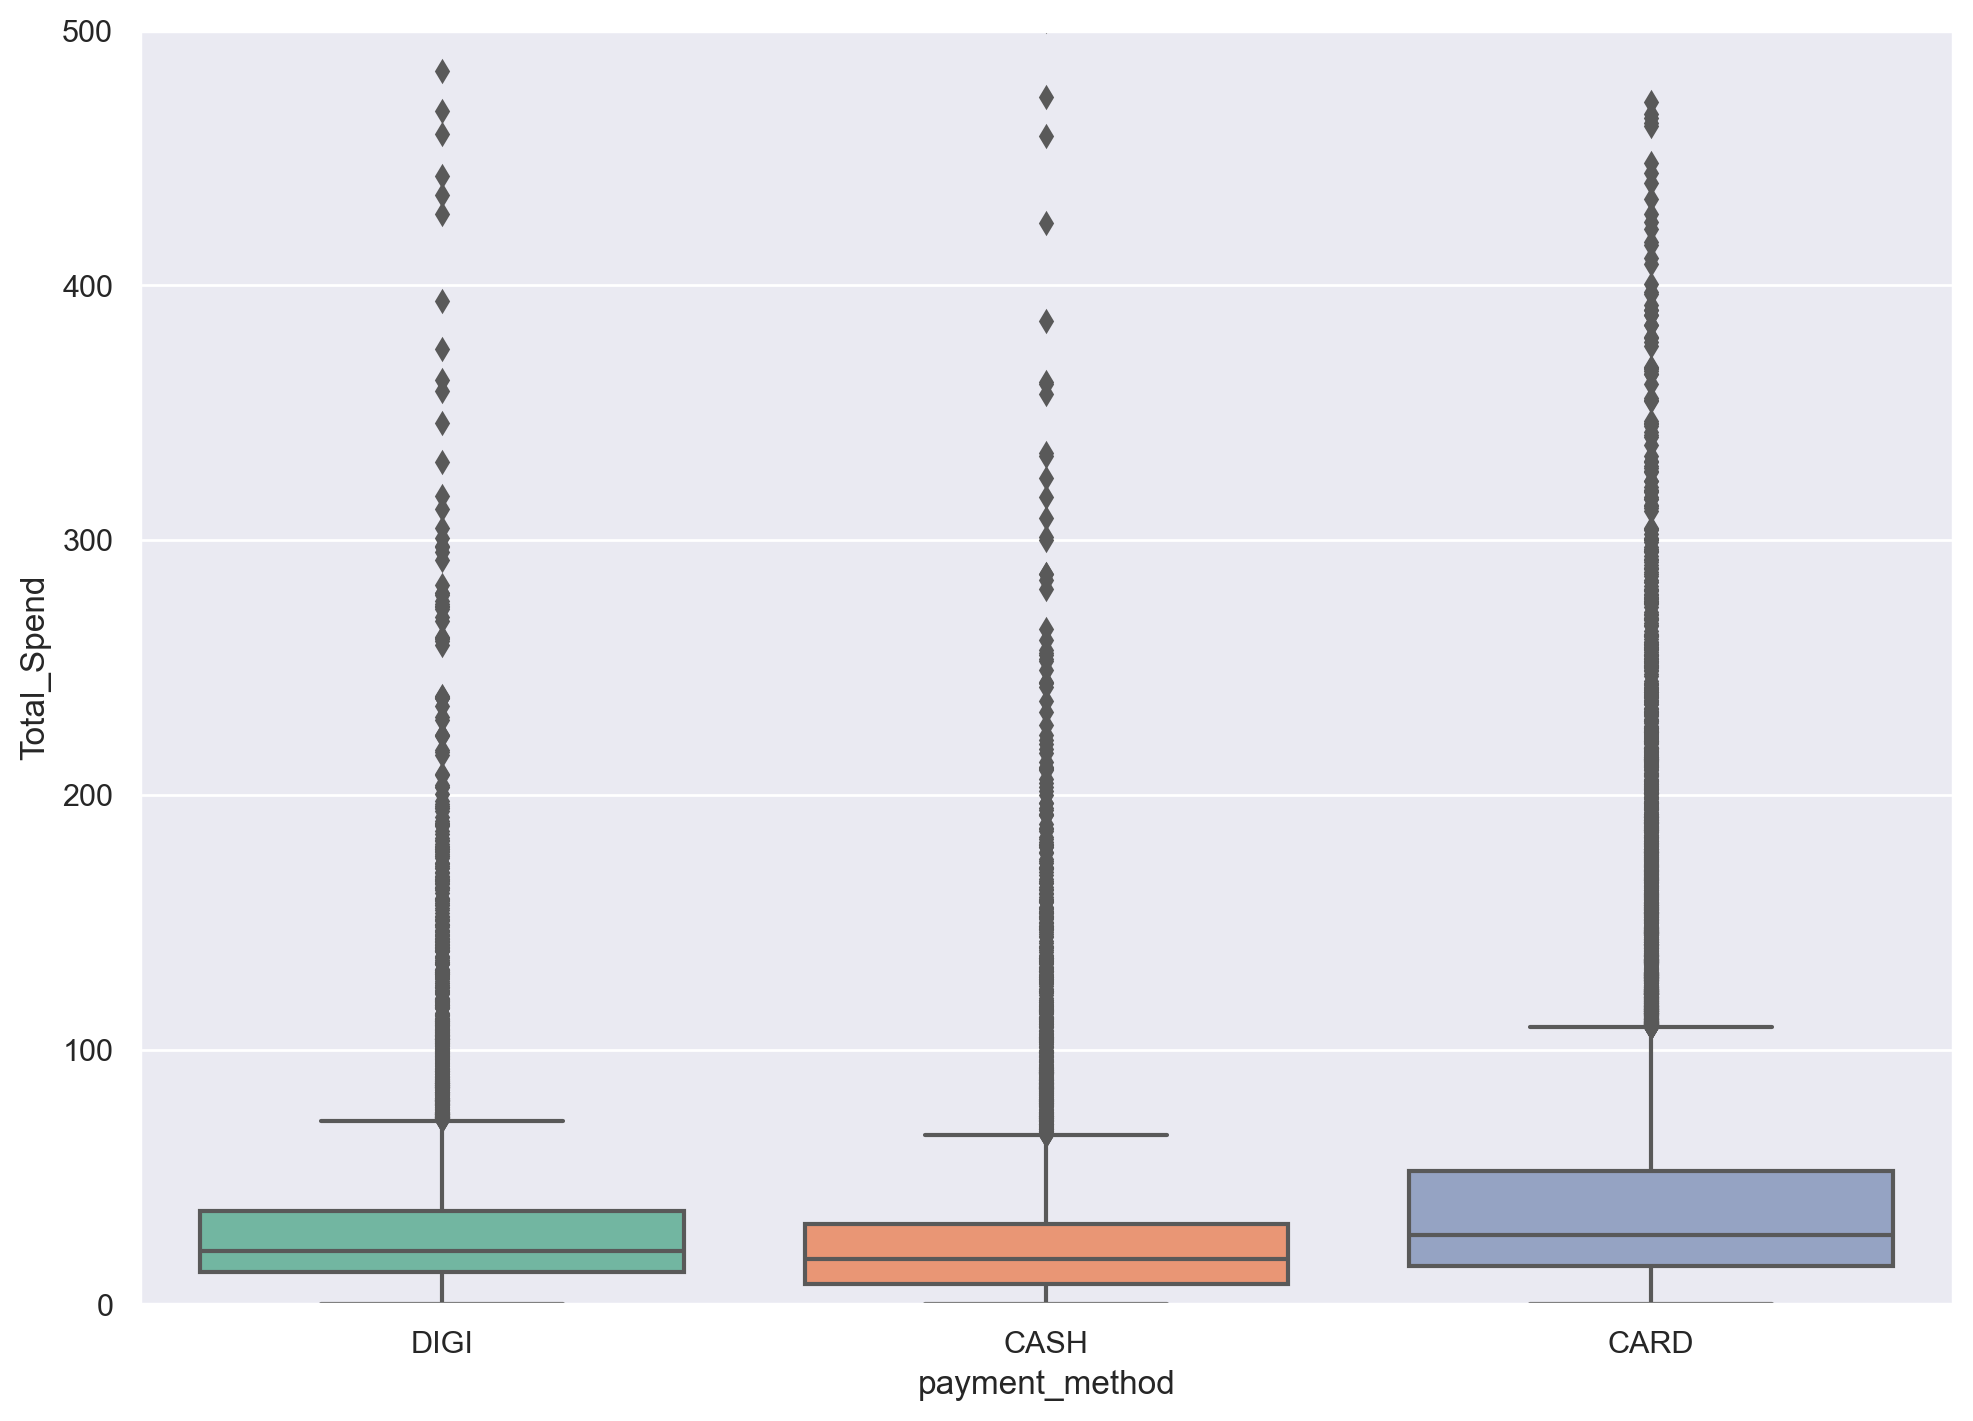

In [84]:
# seing if payment method affects total spend
sns.boxplot(x='payment_method', y='Total_Spend', data=df)
plt.ylim(0, 500)